# Исследование объявлений о продаже квартир

Исходные данные — архив объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Часть данных сформированы пользователемя, другая часть — получены автоматически на основе картографических данных.

**Задача**

Установить параметры для определения рыночной стоимости объектов недвижимости.

## Изучение общей информации.

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# чтение данных
data = pd.read_csv("datasets/real_estate_data.csv", sep= '\t')


'Информация о данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

'\n'

'Статистические показатели данных:'

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


'\n'

'Все столбцы данных:'

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


'\n'

Дубликатов не найдено.


'Гистограмма данных:'

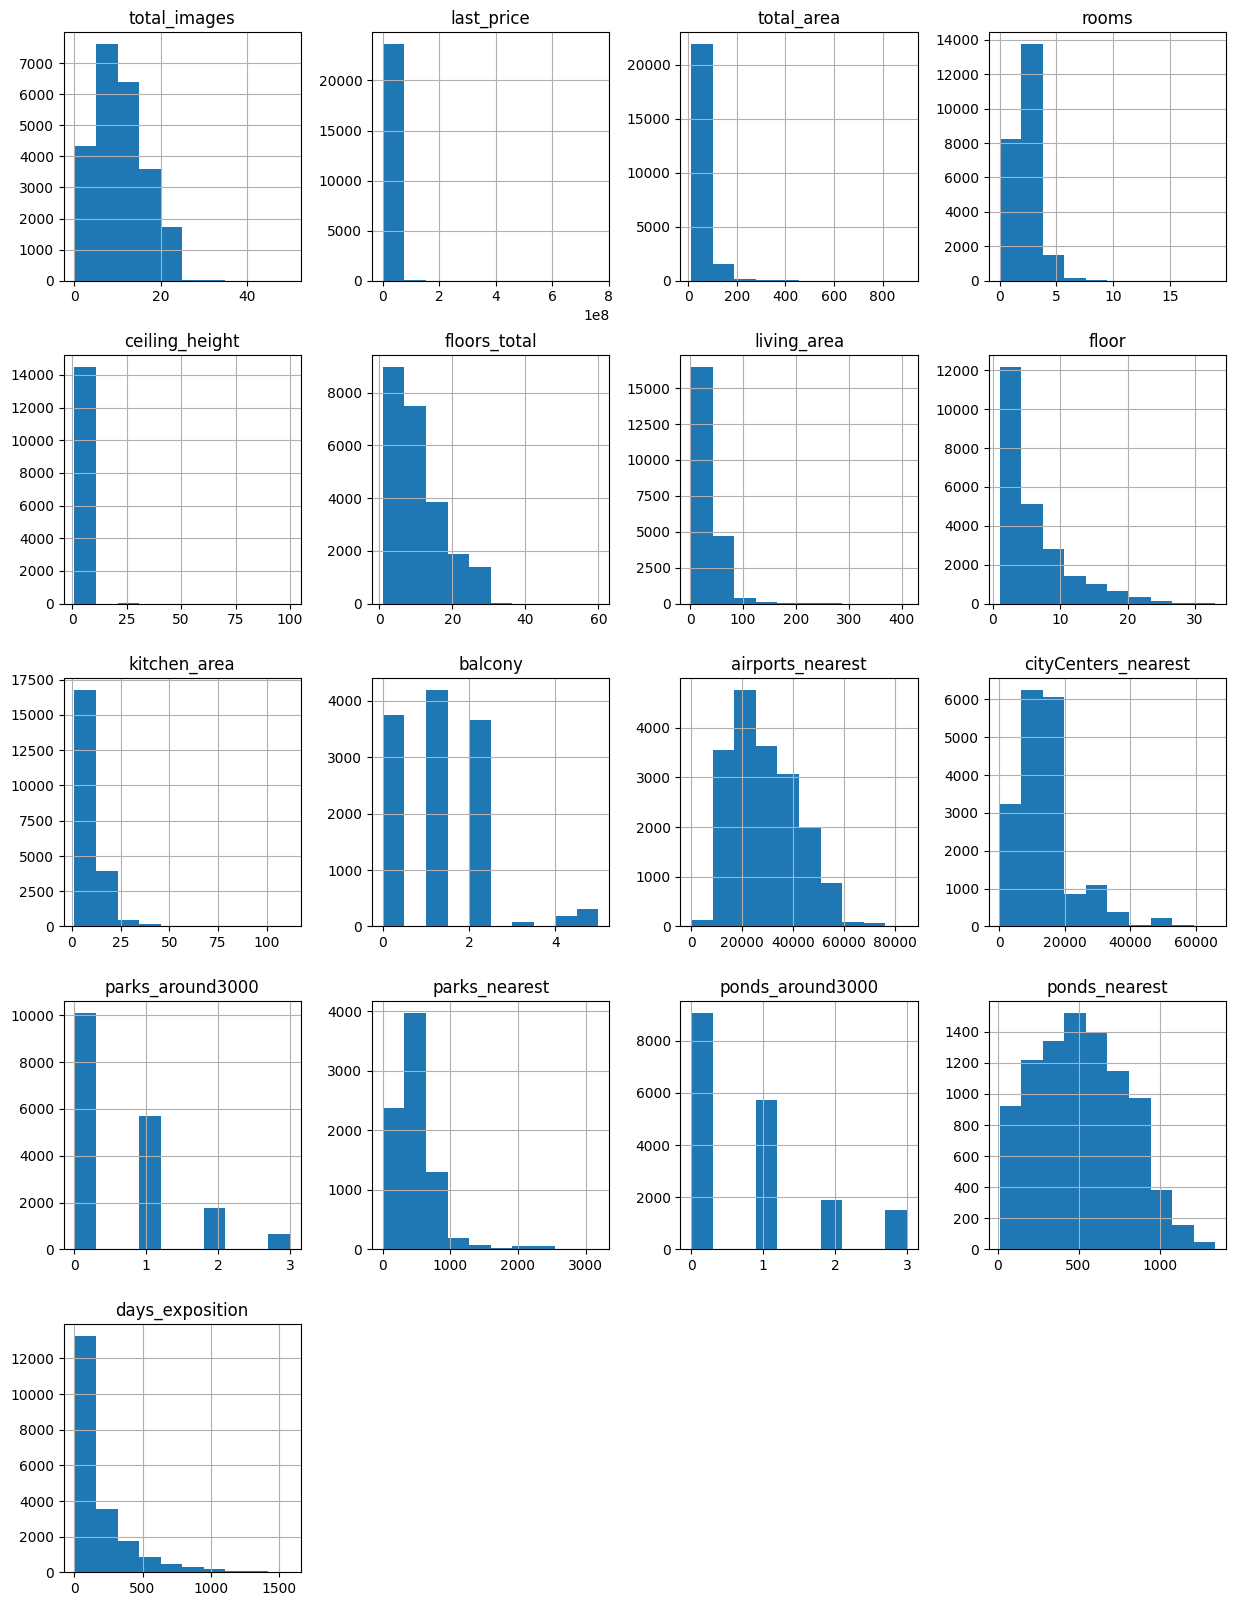

In [4]:
def data_analysis(data):
    """
    Функция для вывода первичной информации

    Параметры:
    data (DataFrame): DataFrame, который требуется проанализировать.

    Возвращает:
    None
    """
    # Вывод основной информации о данных
    display("Информация о данных:")
    display(data.info())
    display("\n")
    
    # Вывод основных статистических показателей данных
    display("Статистические показатели данных:")
    display(data.describe())
    display("\n")
    
    # Вывод всех столбцов
    display("Все столбцы данных:")
    display(data)
    display("\n")
    
    # Поиск и вывод дубликатов
    duplicated_rows = data[data.duplicated()]
    if not duplicated_rows.empty:
        print("Найдены дубликаты:")
        print(duplicated_rows)
        print("\n")
    else:
        print("Дубликатов не найдено.")

    # Вывод гистограммы для всех столбцов
    display("Гистограмма данных:")
    data.hist(figsize=(15, 20))
        
data_analysis(data)


**Вывод**

 - Файл с данными содержит 22 столбца (2 булевых, 3 целочисленных, 14 столбцов с плавающей точкой и 3 столбца с объектами) и 23699 записей;
 - Большинство названий столбцов выглядят адекватно и не содержат изъянов, но столбцы cityCenters_nearest, parks_around3000, ponds_around3000 и is_apartment имеют названия, несколько выбивающиеся из стандартного стиля;
 - В 14 из 22 столбцов есть пропущенные значения;
 - В столбцах last_price, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest и days_exposition, судя по данным, все значения являются целыми числами. Эту гипотезу будет необходимо проверить на следующем шаге;
 - Столбец first_day_exposition содержит даты. На следующем шаге необходимо будет перевести его к типу datetime;
 - В столбце floors_total, судя по данным и логике (в здании не может быть дробного значения количества этажей), все значения должны быть целыми числами. На следующем шаге столбец нужно будет привести к типу int;
 - В столбце balcony, судя по данным и логике (в квартире не может быть дробного значения количества балконов), все значения должны быть целыми числами. На следующем шаге столбец нужно будет привести к типу int;
 - В столбце airports_nearest, судя по данным, все значения являются целыми числами. Эту гипотезу будет необходимо проверить на следующем шаге;
 - В столбце rooms минимальным значением является 0 комнат. Данное значение не является возможным. Данную аномалию необходимо проверить на следующем шаге;
 - В столбце ceiling_height максимальным значением является 100 м, минимальным 0 м. Это неестественные значения для данного показателя. Данные аномалии необходимо проверить на следующем шаге;
 - В столбце airports_nearest минимальным значением является 0 м. Это достаточно странно, так как получается, что продается квартира на территории аэропорта. Данную аномалию необходимо проверить на следующем шаге.

## Предобработка данных

### Переименование столбцов

In [5]:
# Вывод списка столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
# Переименование столбцов
data = data.rename(columns={
    "cityCenters_nearest": "city_сenters_nearest",
    "parks_around3000": "parks_around_3000",
    "ponds_around3000": "ponds_around_3000",
    "is_apartment": "apartment", "floor": "floor_"
})

In [7]:
# Проверка результатов переименования
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor_',
       'apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Проверка на пропуски и аномалии, изменение типов данных

#### Проверка столбца total_images

In [8]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

#### Изменение типа столбца last_price

In [9]:
# Проверка наличия дробных частей цены
len(data.query('last_price % 1 != 0'))

0

In [10]:
# Приведение к целочисленному типу
data['last_price'] = data['last_price'].astype('int')

# Проверка результатов приведения
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

#### Удаление аномалий в столбце total_area

In [11]:
# Вывод основных статистических показателей столбца
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [12]:
# Проверка наличия дробных значений с коррекцией двоичного представления чисел
len(data.query('total_area % 1 > 1e-10'))

11249

<Axes: >

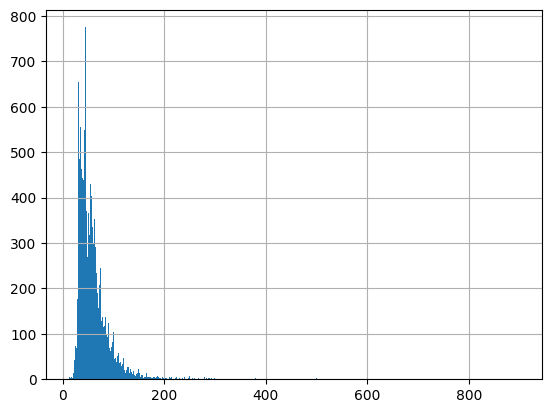

In [13]:
# Визуальная оценка распределения данных
data['total_area'].hist(bins=900)

<Axes: >

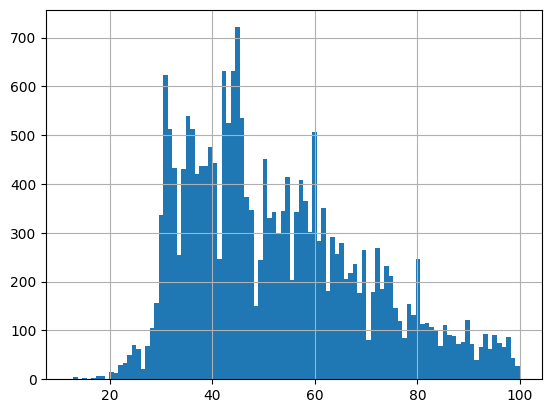

In [14]:
# Визуальная оценка распределения основной части данных
data.query('total_area < 100')['total_area'].hist(bins=100)

In [15]:
# Подсчет количества квартир с площадью менее 28 м^2
len(data.query('total_area < 28'))

392

In [16]:
# Удаление квартир с площадью менее 28 м^2 и более 200 м^2
data = data.query('28 <= total_area <= 200').reset_index(drop=True)

# Проверка результатов удаления
print(len(data.query('total_area < 28')))
print(len(data.query('total_area > 200')))

0
0


#### Изменение типа столбца first_day_exposition

In [17]:
# Оценка содержания данных
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [18]:
# Приведение данных к типу datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Проверка результатов
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23075   2017-03-21
23076   2018-01-15
23077   2018-02-11
23078   2017-03-28
23079   2017-07-21
Name: first_day_exposition, Length: 23080, dtype: datetime64[ns]

#### Удаление аномалий в столбце rooms

In [19]:
# Проверка значений столбца
data['rooms'].value_counts()

rooms
2     7936
1     7790
3     5799
4     1140
5      265
0       64
6       62
7       20
11       2
8        2
Name: count, dtype: int64

<Axes: >

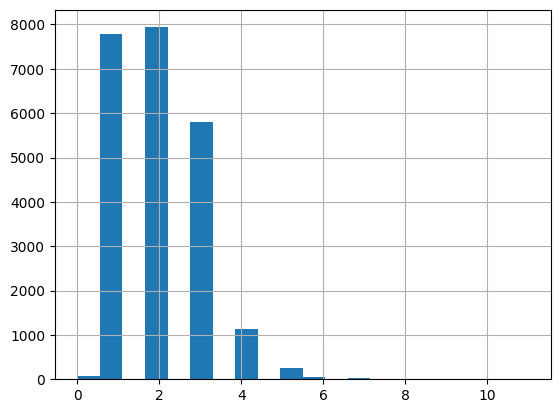

In [20]:
# Визуальная оценка распределения данных
data['rooms'].hist(bins=20)

In [21]:
# Подсчет количества квартир с 0 комантами
len(data[data['rooms'] == 0])

64

<Axes: >

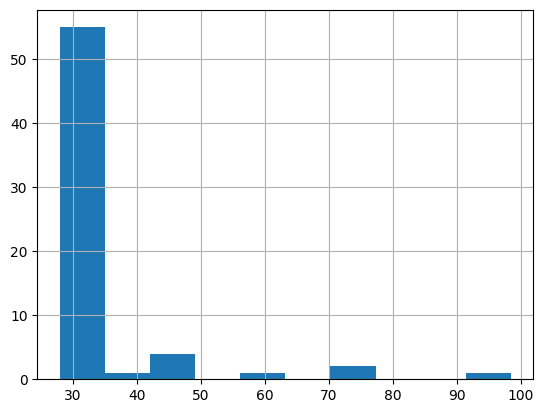

In [22]:
# Оценка площади квартир с 0 комнат
data.query('rooms == 0')['total_area'].hist()

In [23]:
# Замена количества комнат с 0 на 1
data.loc[data['rooms'] == 0, 'rooms'] = 1

In [24]:
# Проверка результатов замены
data['rooms'].value_counts()

rooms
2     7936
1     7854
3     5799
4     1140
5      265
6       62
7       20
11       2
8        2
Name: count, dtype: int64

#### Удаление и исправление аномалий в столбце ceiling_height

In [25]:
# Функция для вывода доли пропущенных значений в столбце
# column_name - (string) Название столбца
def get_missing_values_proportion(column_name):
    length = len(data.query(column_name + '.isnull()'))

    print('Пропущенных значений - {} ({:.2%})'.format(length, length / len(data)), sep='')

In [26]:
# Оценка количества пропущенных значений
get_missing_values_proportion('ceiling_height')

Пропущенных значений - 8879 (38.47%)


In [27]:
# Вывод основных статистических показателей столбца
data['ceiling_height'].describe()

count    14201.000000
mean         2.756819
std          0.953399
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

<Axes: >

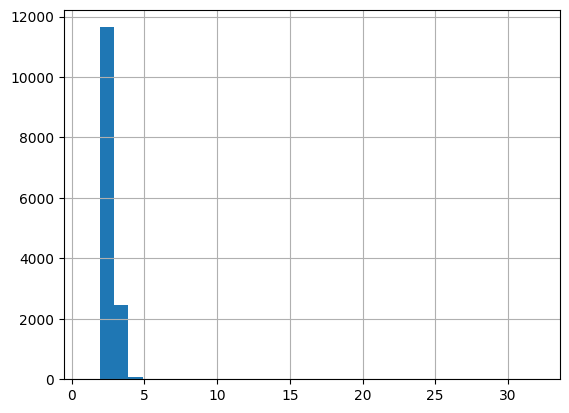

In [28]:
# Визуальная оценка распределения данных
data['ceiling_height'].hist(bins=32)

<Axes: >

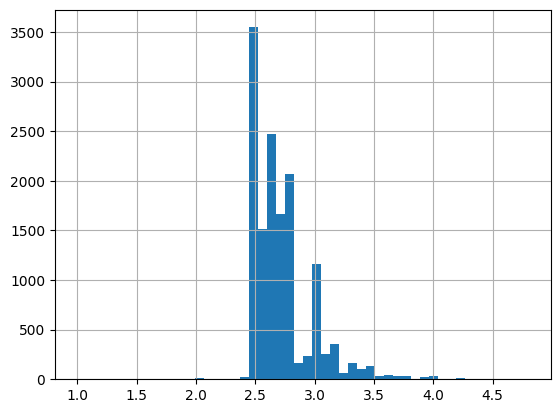

In [29]:
# Визуальная оценка распределения основной части данных
data.query('ceiling_height < 5')['ceiling_height'].hist(bins=50)

<Axes: >

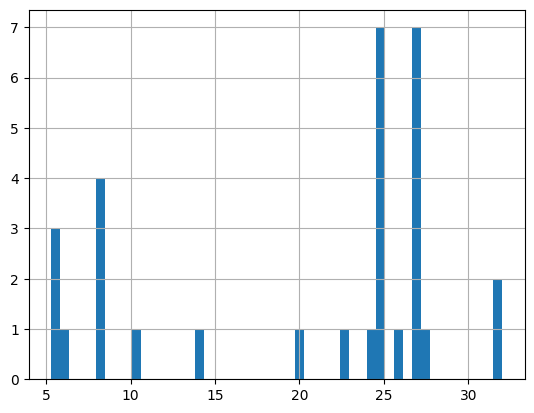

In [30]:
# Визуальная оценка распределения данных с аномально большими значениями
data.query('ceiling_height > 5')['ceiling_height'].hist(bins=50)

In [31]:
# Подсчет количества квартир с аномальными значениями высоты потолка
len(data.query('ceiling_height < 2.5 or ceiling_height > 5'))

102

In [32]:
# Исправление значений у квартир с выстой потолка более и равной 25 м
data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] /= 10

<Axes: >

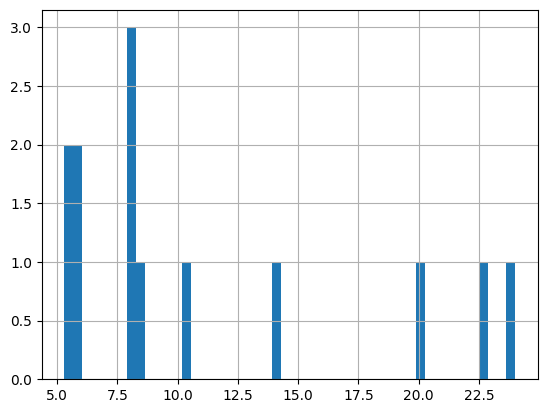

In [33]:
# Проверка результатов исправления
data.query('5 < ceiling_height < 40')['ceiling_height'].hist(bins=50)

<Axes: >

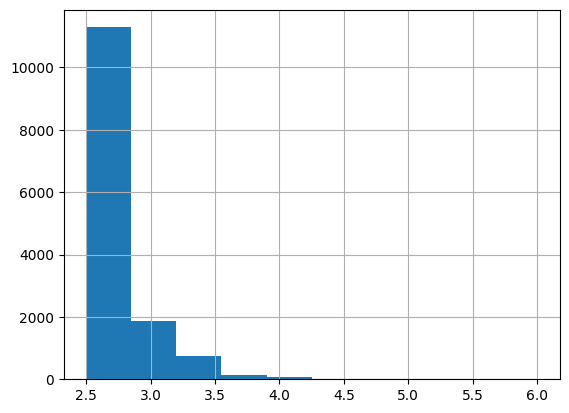

In [34]:
# Удаление аномальных значений
data = data.query('2.5 <= ceiling_height < 7.5 or ceiling_height.isnull()').reset_index(drop=True)

# Проверка результатов удаления
data['ceiling_height'].hist()

In [35]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('ceiling_height')

Пропущенных значений - 8879 (38.60%)


#### Удаление пропусков и изменение типа столбца floors_total

In [36]:
# Проверка значений столбца
data['floors_total'].value_counts()

floors_total
5.0     5648
9.0     3717
16.0    1341
12.0    1334
4.0     1160
10.0    1159
25.0    1031
6.0      855
17.0     808
3.0      642
7.0      567
14.0     537
18.0     479
24.0     439
8.0      368
2.0      361
15.0     354
23.0     341
19.0     314
22.0     274
20.0     266
13.0     228
11.0     199
27.0     158
21.0     146
26.0     124
1.0       23
35.0      22
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
Name: count, dtype: int64

In [37]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('floors_total')

Пропущенных значений - 76 (0.33%)


In [38]:
# Проверка гипотезы о том, что количество этажей не указано, когда в доме 1 этаж
data.query('floors_total.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
183,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
232,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
449,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
652,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1697,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21875,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
21984,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22133,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
22893,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [39]:
# Удаление записей с пропущенными значениями
data.dropna(subset=['floors_total'], inplace=True)
data = data.reset_index(drop=True)

# Проверка результатов удаления
get_missing_values_proportion('floors_total')

Пропущенных значений - 0 (0.00%)


In [40]:
# Приведение к целочисленному типу
data['floors_total'] = data['floors_total'].astype('int')

# Проверка результатов приведения
data['floors_total']

0        16
1        11
2         5
3        14
4        14
         ..
22919     5
22920     5
22921     3
22922    17
22923     5
Name: floors_total, Length: 22924, dtype: int64

#### Заполнение пропусков и смена типа столбца apartment

In [41]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('apartment')

# Оценка распределения значений
data['apartment'].value_counts()

Пропущенных значений - 20224 (88.22%)


apartment
False    2655
True       45
Name: count, dtype: int64

In [42]:
# Замена пропущенных значений
data['apartment'] = data['apartment'].fillna(False)

# Проверка результатов замены
data['apartment'].value_counts()

C:\Users\alexei_marganov\AppData\Local\Temp\ipykernel_13376\3475156095.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['apartment'] = data['apartment'].fillna(False)


apartment
False    22879
True        45
Name: count, dtype: int64

In [43]:
# Приведение к булевому типу
data['apartment'] = data['apartment'].astype('bool')

# Проверка результатов приведения
data['apartment']

0        False
1        False
2        False
3        False
4        False
         ...  
22919    False
22920    False
22921    False
22922    False
22923    False
Name: apartment, Length: 22924, dtype: bool

#### Проверка столбца studio

In [44]:
data['studio'].value_counts()

studio
False    22875
True        49
Name: count, dtype: int64

#### Проверка столбца open_plan

In [45]:
data['open_plan'].value_counts()

open_plan
False    22897
True        27
Name: count, dtype: int64

#### Удаление пропусков в столбце locality_name, создание столбца clean_locality_name без дубликатов, категоризация типов населенных пунктов, создание цифровых представлений названий и типов населенных пунктов

In [46]:
# Проверка значений столбца
data['locality_name'].value_counts()

locality_name
Санкт-Петербург         15208
посёлок Мурино            463
посёлок Шушары            431
Всеволожск                389
Пушкин                    360
                        ...  
поселок Сумино              1
поселок Кирпичное           1
деревня Раздолье            1
деревня Терпилицы           1
посёлок Дзержинского        1
Name: count, Length: 359, dtype: int64

In [47]:
# Подсчет количества пустых значений
get_missing_values_proportion('locality_name')

Пропущенных значений - 48 (0.21%)


In [48]:
# Удаление пусты значений
data.dropna(subset=['locality_name'], inplace=True)
data = data.reset_index(drop=True)

# Проверка результатов удаления
get_missing_values_proportion('locality_name')

Пропущенных значений - 0 (0.00%)


In [49]:
# Подсчет уникальных населенных пунктов
len(data['locality_name'].unique())

359

In [50]:
import re

# Определяем словарь типов населенных пунктов
locality_type_mapping = {
    'городской поселок': 'поселок городского типа',
    'железнодорожная станция': 'поселок при железнодорожной станции',
    'коттеджный поселок': 'коттеджный поселок',
    'поселок': 'поселок',
    'деревня': 'деревня',
    'садовое товарищество': 'садовое товарищество',
    'село': 'село',
}

# Функция для очистки названий населенных пунктов и удаления дубликатов
def get_clean_locality_name_optimized(name):
    # Применяем регулярное выражение для разделения на тип и название
    match = re.match(r"^(.*?)([А-ЯЁ].*)$", name.strip())
    if match:
        locality_type, locality_name = match.groups()
        locality_type = locality_type.lower().strip()
        locality_name = locality_name.strip()

        # Определяем тип населенного пункта на основе словаря
        for key in locality_type_mapping.keys():
            if key in locality_type:
                return locality_type_mapping[key] + ' ' + locality_name

    # Если тип не определен, возвращаем название без изменений
    return name.strip()

# Создание столбца clean_locality_name с очищенными названиями населенных пунктов
data['clean_locality_name'] = data['locality_name'].apply(get_clean_locality_name_optimized)


In [51]:
# Определяем отображение шаблонов в стандартные типы
locality_type_map = {
    'поселок городского типа': ['поселок городского типа', 'пгт'],
    'поселок': ['поселок', 'пос.', 'поселение', 'посёлок'],
    'деревня': ['деревня', 'дер.', 'д.'],
    'садовое товарищество': ['садовое товарищество', 'с/т', 'садоводческое товарищество'],
    'село': ['село', 'сел.', 'с/п'],
    'город': ['город', 'г.', 'г']
}

# Создаем обратное отображение для быстрого замещения
type_pattern = {pattern: key for key, patterns in locality_type_map.items() for pattern in patterns}

# Функция для очистки названий населенных пунктов
def clean_locality_type(name):
    for pattern, locality_type in type_pattern.items():
        if re.search(rf'\b{pattern}\b', name, re.IGNORECASE):
            return locality_type
    return 'undefined'

# Применяем векторизованную функцию для создания нового столбца с типами населенных пунктов
data['clean_locality_type'] = data['locality_name'].apply(clean_locality_type)

# Выводим уникальные типы после очистки
print(data['clean_locality_type'].unique())



['undefined' 'поселок' 'деревня' 'поселок городского типа'
 'садовое товарищество' 'село']


In [52]:
# Определение уникальных типов населенных пунктов
unique_types = list(data['clean_locality_type'].unique())

# Функция для получения цифрового представления типа населенного пункта
# type - (string) Тип населенного пункта
# возвращает - (string) Цифровое представления типа населенного пункта
def get_clean_locality_type_number(type):
    return unique_types.index(type)

In [53]:
# Создание столбца с цифровым представлением типа населенного пункта
data['clean_locality_type_number'] = data['clean_locality_type'].apply(get_clean_locality_type_number)

# Проверка результатов создания
data.groupby('clean_locality_type')['clean_locality_type_number'].value_counts()

clean_locality_type      clean_locality_type_number
undefined                0                             19228
деревня                  2                               901
поселок                  1                              2369
поселок городского типа  3                               172
садовое товарищество     4                                 4
село                     5                               202
Name: count, dtype: int64

In [54]:
# Определение уникальных названий населенных пунктов
unique_names = list(data['clean_locality_name'].unique())

# Функция для получения цифрового представления названия населенного пункта
# name - (string) Название населенного пункта
# возвращает - (string) Цифровое представления названия населенного пункта
def get_clean_locality_name_number(name):
    return unique_names.index(name)

In [55]:
# Создание столбца с цифровым представлением названия населенного пункта
data['clean_locality_name_number'] = data['clean_locality_name'].apply(get_clean_locality_name_number)

# Проверка результатов создания
data.groupby('clean_locality_name')['clean_locality_name_number'].value_counts()

clean_locality_name   clean_locality_name_number
Бокситогорск          77                             16
Волосово              63                             36
Волхов                29                            110
Всеволожск            28                            389
Выборг                16                            229
                                                   ... 
село Путилово         46                              2
село Рождествено      227                             3
село Русско-Высоцкое  201                             9
село Старая Ладога    205                             2
село Шум              305                             1
Name: count, Length: 358, dtype: int64

#### Удаление аномальных значений в столбце living_area

In [56]:
# Вывод основных статистических параметров столбца
data['living_area'].describe()

count    21097.000000
mean        33.523838
std         17.385329
min          2.000000
25%         18.840000
50%         30.000000
75%         42.100000
max        164.700000
Name: living_area, dtype: float64

<Axes: >

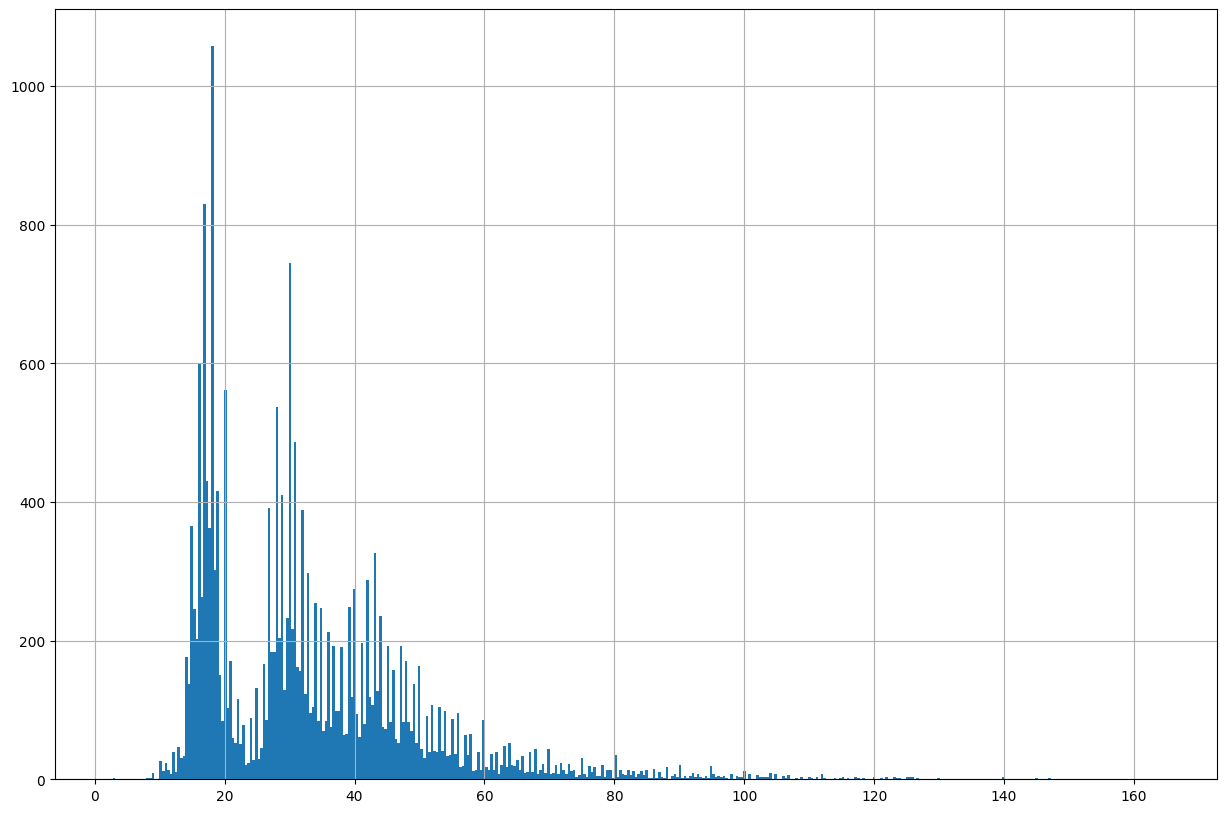

In [57]:
# Визуальная оценка расперделения значений
data['living_area'].hist(bins=409, figsize=(15, 10))

<Axes: >

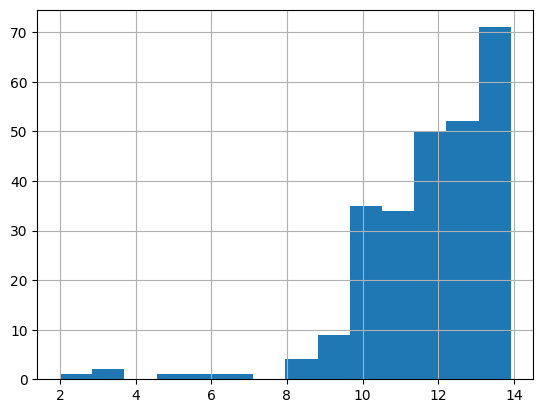

In [58]:
# Визуальная оценка распределения значений, меньших 14 м
data.query('living_area < 14')['living_area'].hist(bins=14)

In [59]:
# Подсчет количества квартир с жилой площадью менее 14 м
len(data.query('living_area < 14'))

261

In [60]:
# Удаление записей с жилой площадью менее 14 м
data = data.query('living_area >= 14 or living_area.isnull()').reset_index(drop=True)

# Проверка результатов удаления
len(data.query('living_area < 14'))

0

In [61]:
# Подсчет колисества пропущенных значений
get_missing_values_proportion('living_area')

Пропущенных значений - 1779 (7.87%)


In [62]:
# Проверка наличия квартир со значением жилой площади, большим, чем значение общей площади
len(data.query('living_area >= total_area'))

0

#### Проверка столбца floor

In [63]:
# Вывод основных статистических параметров столбца
data['floor_'].describe()

count    22615.000000
mean         5.838072
std          4.829145
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor_, dtype: float64

In [64]:
# Проверка наличия квартир со этажом, большим, чем общее количество этажей в здании
len(data.query('floor_ > floors_total'))

0

#### Проверка столбца kitchen_area

In [65]:
# Вывод основных статистических параметров столбца
data['kitchen_area'].describe()

count    20732.000000
mean        10.363143
std          5.346020
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max         93.200000
Name: kitchen_area, dtype: float64

<Axes: >

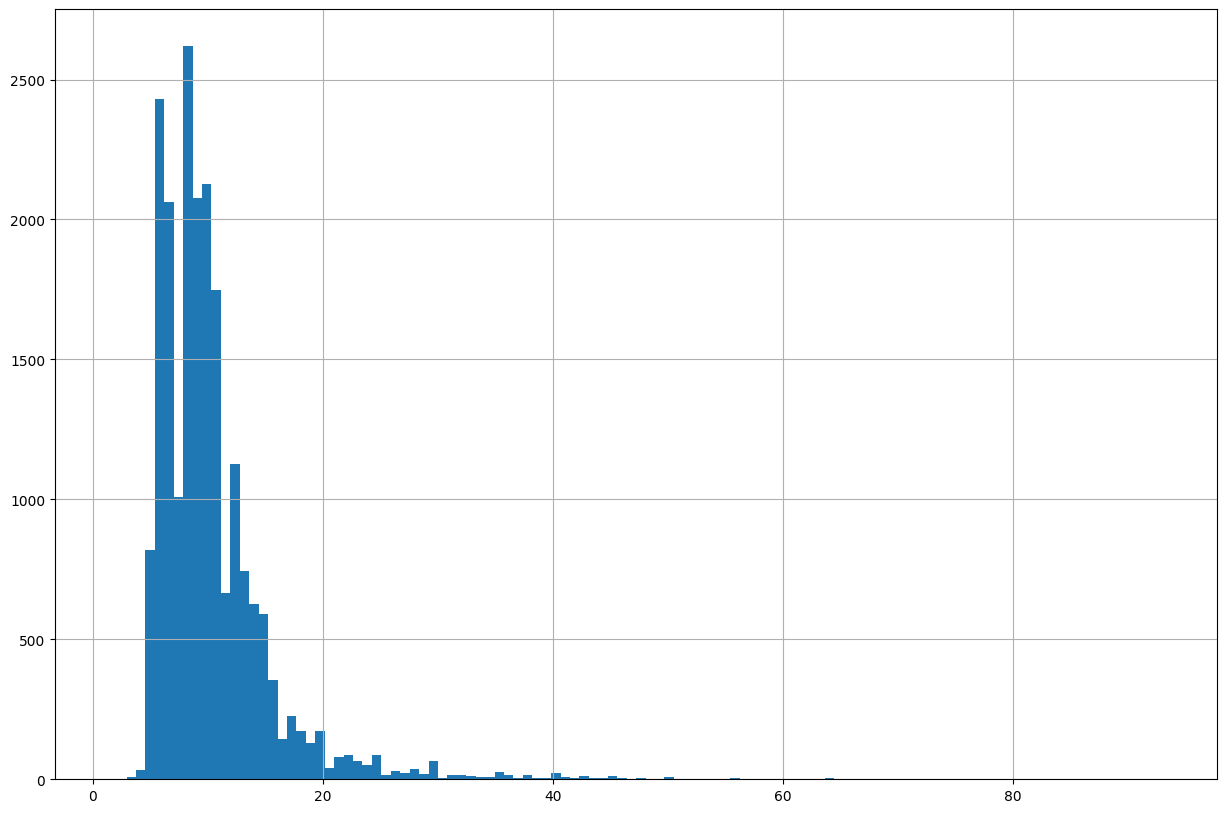

In [66]:
# Визуальная оценка расперделения значений
data['kitchen_area'].hist(bins=112, figsize=(15, 10))

In [67]:
# Проверка наличия квартир со значением площади кухни, большим, чем значение общей площади
len(data.query('kitchen_area >= total_area'))

0

In [68]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('kitchen_area')

Пропущенных значений - 1883 (8.33%)


#### Заполнение пропусков и приведение к целочисленному типу столбца balcony

In [69]:
# Вывод основных статистических параметров столбца
data['balcony'].describe()

count    11610.000000
mean         1.160465
std          1.074134
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [70]:
# Оценка значений столбца
data['balcony'].value_counts()

balcony
1.0    4040
0.0    3517
2.0    3500
5.0     297
4.0     180
3.0      76
Name: count, dtype: int64

In [71]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('balcony')

Пропущенных значений - 11005 (48.66%)


In [72]:
# Замена пропущенных значений на 0
data['balcony'] = data['balcony'].fillna(0)

# Проверка результатов замены
get_missing_values_proportion('balcony')

Пропущенных значений - 0 (0.00%)


In [73]:
# Приведение столбца к целочисленному типу
data['balcony'] = data['balcony'].astype('int')

# Проверка результатов приведения
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
22610    0
22611    0
22612    0
22613    0
22614    2
Name: balcony, Length: 22615, dtype: int64

#### Заполнение пропусков в столбце airports_nearest

In [74]:
# Вывод основных статистических параметров столбца
data['airports_nearest'].describe()

count    17379.000000
mean     28855.092986
std      12649.820208
min          0.000000
25%      18539.000000
50%      26885.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<Axes: >

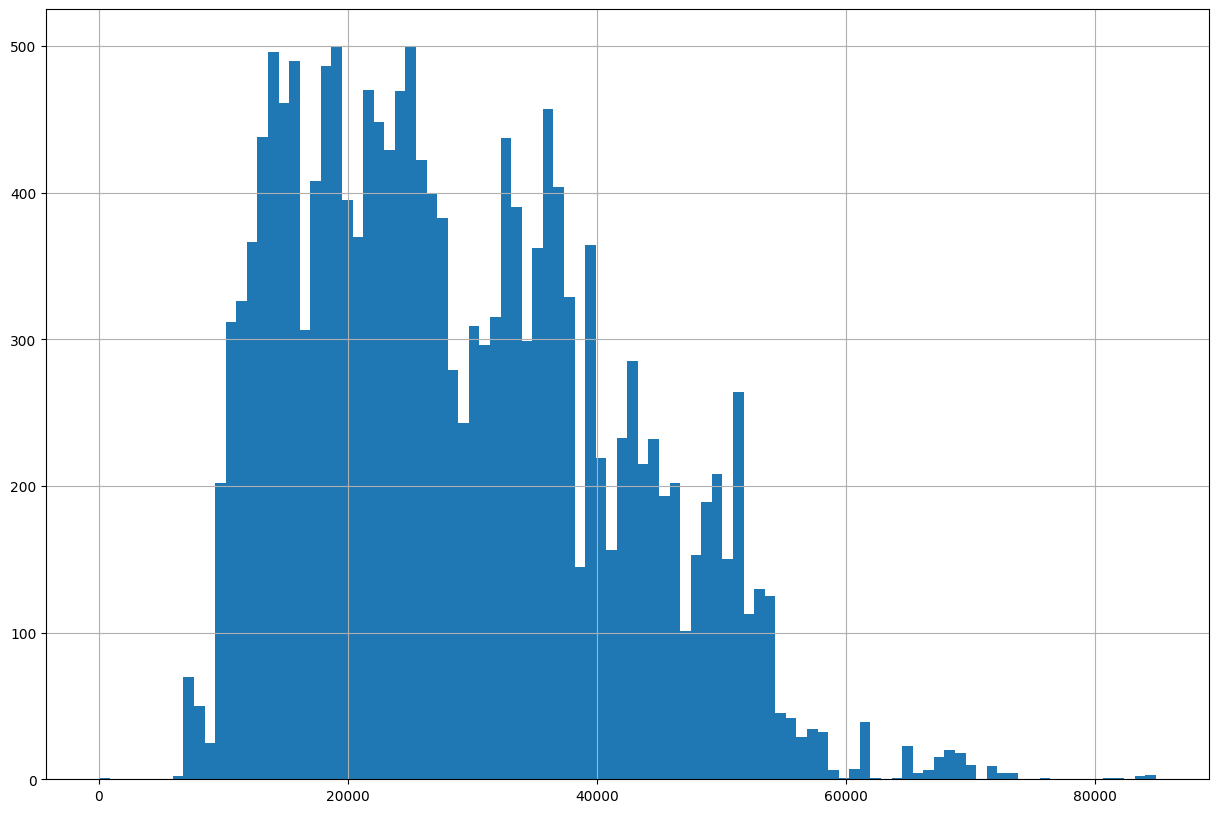

In [75]:
# Визуальная оценка распределения данных
data['airports_nearest'].hist(bins=100, figsize=(15, 10))

In [76]:
# Оценка квартир с аномальным значением расстояния до аэропорта (0) и их количества
data.query('airports_nearest < 4000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clean_locality_name,clean_locality_type,clean_locality_type_number,clean_locality_name_number
20133,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,Санкт-Петербург,undefined,0,0


In [77]:
# Подсчет количества квартир с указанной информацией о расстоянии до ближайшего аэропорта для каждого населенного пункта
airports_nearest_stat = data.pivot_table(index='clean_locality_name', values='airports_nearest', aggfunc='count')

# Подсчет и анализ населенных пунктов, где нет квартир с указанным до аэропорта расстоянием
len(airports_nearest_stat.query('airports_nearest == 0'))

332

In [78]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('airports_nearest')

Пропущенных значений - 5236 (23.15%)


<Axes: xlabel='airports_nearest', ylabel='clean_locality_name_number'>

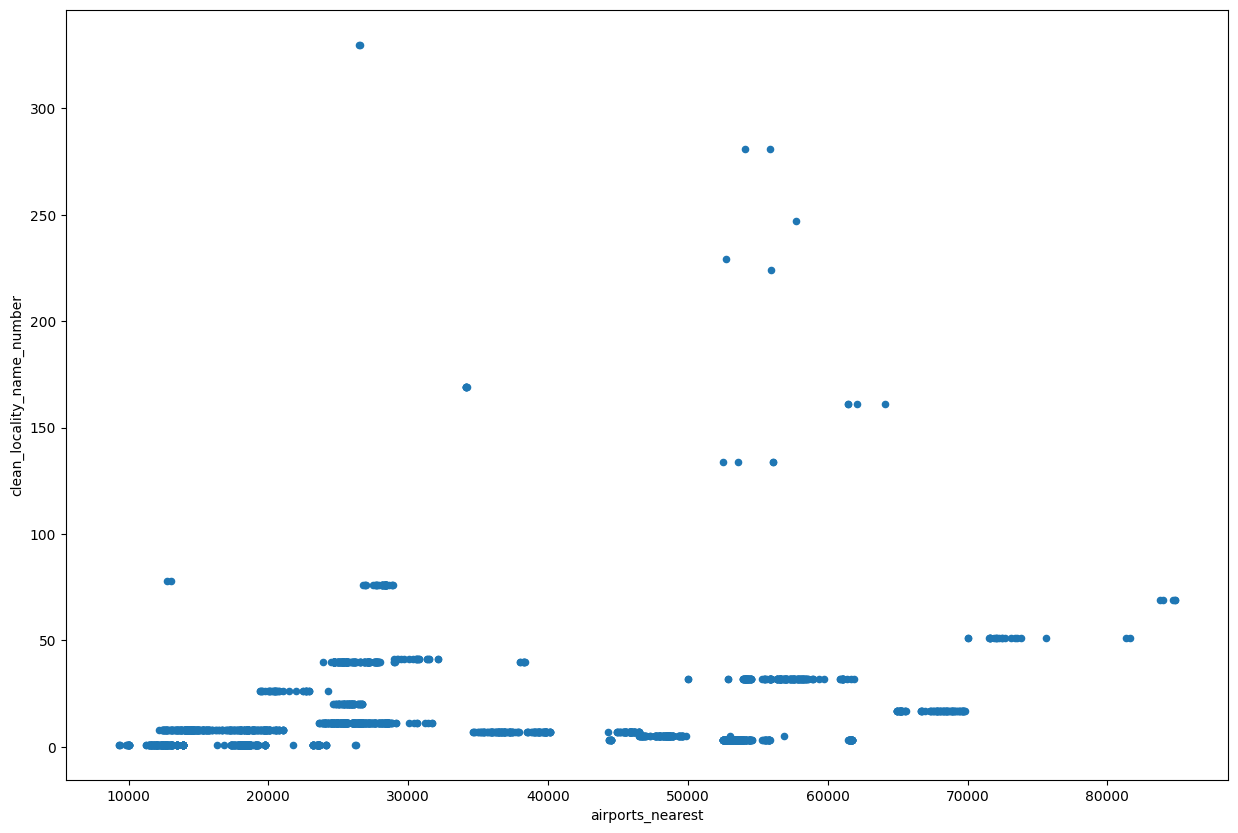

In [79]:
# Проверка гипотезы, что расстояние до аэропорта в одном населенном пункте будет схожим
(
    data
    .query('clean_locality_name != "Санкт-Петербург"')
    .plot(x='airports_nearest', y='clean_locality_name_number', kind='scatter', figsize=(15, 10))
)

<Axes: >

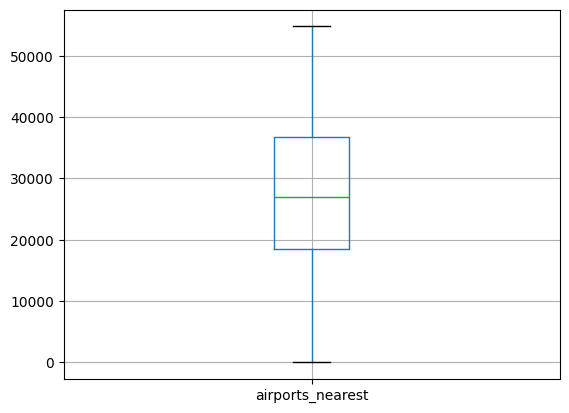

In [80]:
# Проверка гипотезы, что расстояние до аэропорта внутри Санкт-Петербурга будет иметь значительный размах
(
    data
    .query('clean_locality_name == "Санкт-Петербург"')
    .boxplot(column='airports_nearest')
)

In [81]:
# Подсчет пропусков в Санкт-Петербурге
len(data.query('clean_locality_name == "Санкт-Петербург" and airports_nearest.isnull()'))

76

In [82]:
# Функция для расчета медианного значения расстояния до ближайшего аэропорта для квартир из одного населенного пунтка
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана расстояния до ближайшего аэропорта
def get_airports_nearest_median(row):
    return data[
        (data['clean_locality_name'] == row['clean_locality_name']) &
        (data['airports_nearest'].isnull() == False)
    ]['airports_nearest'].median()

In [83]:
# Заполнение пропусков и аномалий медианными значениями
data.loc[((data['airports_nearest'].isnull()) | (data['airports_nearest'] == 0)) & (data['clean_locality_name'] != 'Санкт-Петербург'), 'airports_nearest'] = data[((data['airports_nearest'].isnull()) | (data['airports_nearest'] == 0)) & (data['clean_locality_name'] != 'Санкт-Петербург')].apply(get_airports_nearest_median, axis=1)

# Оценка резульатов заполнения
get_missing_values_proportion('airports_nearest')

Пропущенных значений - 5230 (23.13%)


#### Заполнение пропусков в столбце city_сenters_nearest

In [84]:
# Вывод основных статистических параметров столбца
data['city_сenters_nearest'].describe()

count    17399.000000
mean     14273.579516
std       8611.555474
min        181.000000
25%       9425.000000
50%      13145.000000
75%      16293.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

<Axes: >

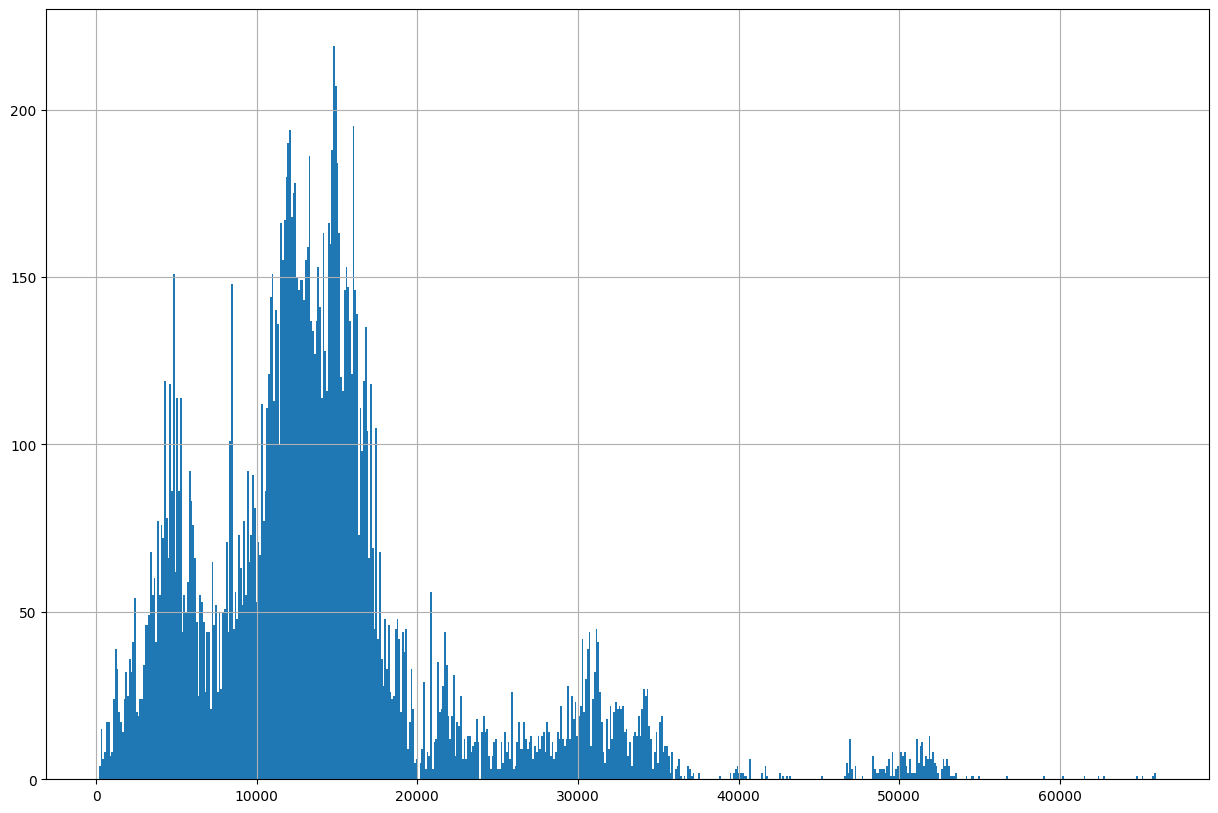

In [85]:
# Визуальная оценка распределения данных
data['city_сenters_nearest'].hist(bins=600, figsize=(15,10))

In [86]:
# Определение населенных пунктов с возможно, аномально большими значениями расстояния до центра населенного пункта
data.query('city_сenters_nearest > 38000')['locality_name'].unique()

array(['Ломоносов', 'Кронштадт', 'Петергоф', 'Зеленогорск',
       'посёлок Молодёжное', 'Красное Село', 'посёлок Репино',
       'посёлок Белоостров', 'Сестрорецк'], dtype=object)

In [87]:
# Определение населенных пунктов с предположительно нормальными значениями расстояния до центра населенного пункта
data.query('city_сenters_nearest < 20000')['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово'],
      dtype=object)

In [88]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('city_сenters_nearest')

Пропущенных значений - 5216 (23.06%)


In [92]:
data['city_сenters_nearest']

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
22610    34104.0
22611     4232.0
22612        NaN
22613        NaN
22614    10364.0
Name: city_сenters_nearest, Length: 22615, dtype: float64

<Axes: xlabel='city_сenters_nearest', ylabel='clean_locality_name_number'>

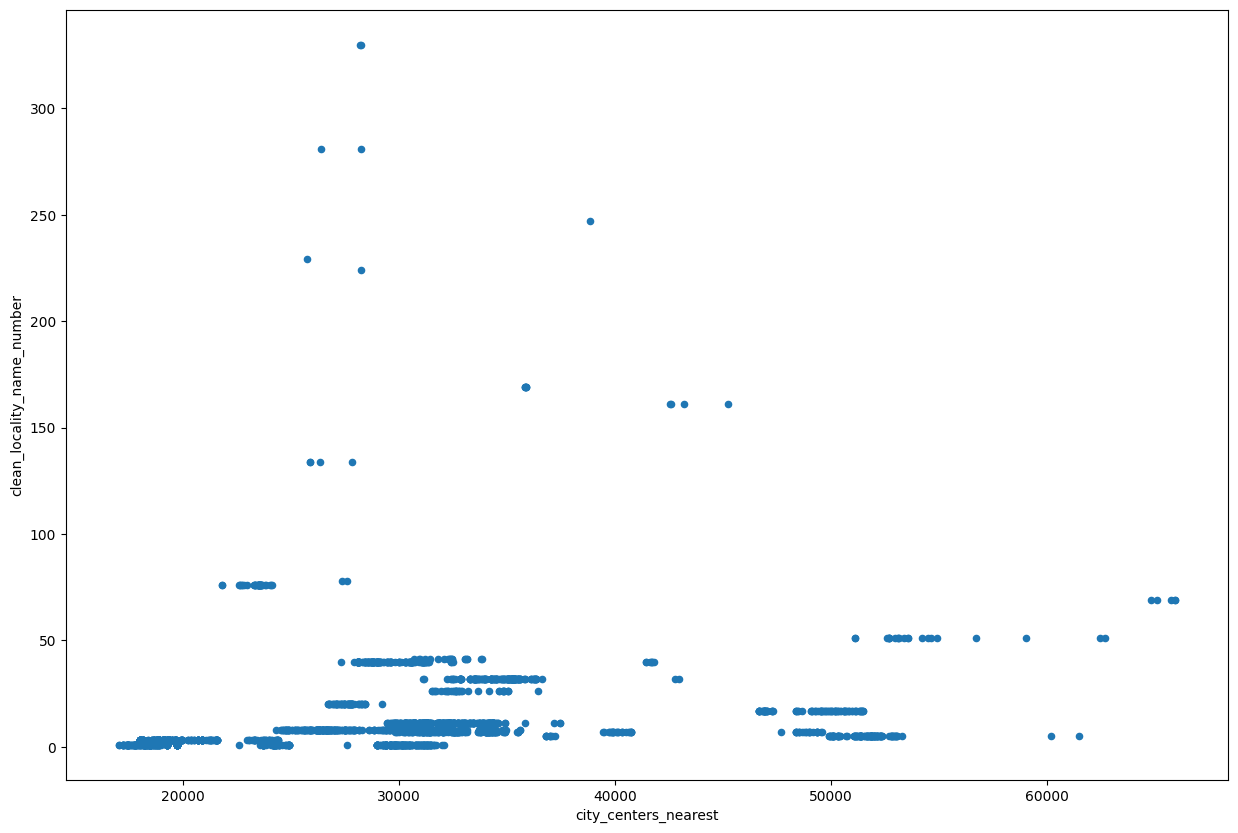

In [94]:
# Проверка гипотезы, что расстояние до центра Санкт-Петербурга в одном населенном пункте будет схожим
(
    data
    .query('clean_locality_name != "Санкт-Петербург"')
    .plot(x='city_сenters_nearest', y='clean_locality_name_number', kind='scatter', figsize=(15, 10))
)

<Axes: >

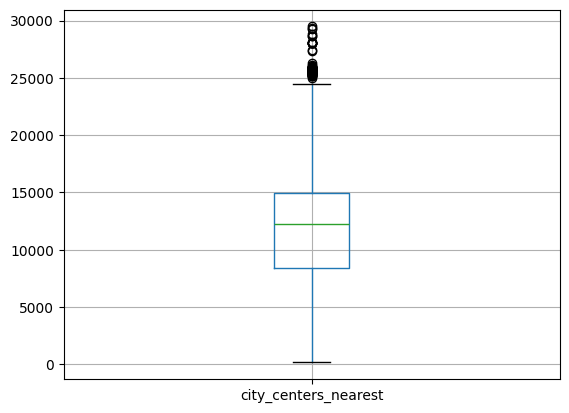

In [95]:
# Проверка гипотезы, что расстояние центра Санкт-Петербурга внутри Санкт-Петербурга будет иметь значительный размах
(
    data
    .query('clean_locality_name == "Санкт-Петербург"')
    .boxplot(column='city_сenters_nearest')
)

In [96]:
# Подсчет пропусков в Санкт-Петербурге
len(data.query('clean_locality_name == "Санкт-Петербург" and city_сenters_nearest.isnull()'))

55

In [97]:
# Функция для расчета медианного значения расстояния до центра Санкт-Петербурга для квартир из одного населенного пунтка
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана расстояния до центра Санкт-Петербурга
def get_city_centers_nearest_median(row):
    return data[
        (data['clean_locality_name'] == row['clean_locality_name']) &
        (data['city_сenters_nearest'].isnull() == False)
    ]['city_сenters_nearest'].median()

#### Заполнение пропусков и приведение к целочисленному типу столбца parks_around_3000

In [98]:
# Вывод основных статистических параметров столбца
data['parks_around_3000'].describe()

count    17400.000000
mean         0.605747
std          0.795391
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

In [99]:
# Оценка значений столбца
data['parks_around_3000'].value_counts()

parks_around_3000
0.0    9694
1.0    5464
2.0    1650
3.0     592
Name: count, dtype: int64

In [100]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('parks_around_3000')

Пропущенных значений - 5215 (23.06%)


In [101]:
# Проверка наличия информации о расстоянии до ближайшего парка для пропущенных значений
len(data.query('parks_around_3000.isnull() and ~parks_nearest.isnull()'))

0

In [102]:
# Заполнение оставшихся пропусков 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

# Проверка результатов заполнения
get_missing_values_proportion('parks_around_3000')

Пропущенных значений - 0 (0.00%)


In [103]:
# Приведение столбца к целочисленному типу
data['parks_around_3000'] = data['parks_around_3000'].astype('int')

# Проверка результатов приведения
data['parks_around_3000']

0        1
1        0
2        1
3        2
4        2
        ..
22610    1
22611    1
22612    0
22613    0
22614    2
Name: parks_around_3000, Length: 22615, dtype: int64

#### Заполнение пропусков в столбце parks_nearest

In [104]:
# Вывод основных статистических параметров столбца
data['parks_nearest'].describe()

count    7710.000000
mean      491.310246
std       341.512191
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [105]:
# Проверка наличия дробных значений
len(data.query('parks_nearest % 1 != 0'))

14905

<Axes: >

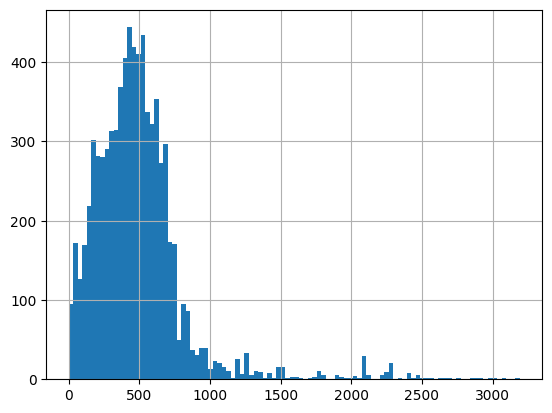

In [106]:
data['parks_nearest'].hist(bins=100)

In [107]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('parks_nearest')

Пропущенных значений - 14905 (65.91%)


In [108]:
# Проверка гипотезы о том, что количество пропусков в столбце parks_nearest равно количеству нулевых значений в столбце arks_around_3000
len(data.query('parks_around_3000 == 0'))

14909

#### Заполнение пропусков и приведение к целочисленному типу столбца ponds_around_3000

In [109]:
# Вывод основных статистических параметров столбца
data['ponds_around_3000'].describe()

count    17400.000000
mean         0.761379
std          0.936431
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

In [110]:
# Оценка значений столбца
data['ponds_around_3000'].value_counts()

ponds_around_3000
0.0    8782
1.0    5406
2.0    1794
3.0    1418
Name: count, dtype: int64

In [111]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('ponds_around_3000')

Пропущенных значений - 5215 (23.06%)


In [112]:
# Проверка наличия информации о расстоянии до ближайшего пруда для пропущенных значений
len(data.query('ponds_around_3000.isnull() and ~ponds_around_3000.isnull()'))

0

In [113]:
# Заполнение оставшихся пропусков 0
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

# Проверка результатов заполнения
get_missing_values_proportion('ponds_around_3000')

Пропущенных значений - 0 (0.00%)


In [114]:
# Приведение столбца к целочисленному типу
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')

# Проверка результатов приведения
data['ponds_around_3000']

0        2
1        0
2        2
3        3
4        1
        ..
22610    1
22611    3
22612    0
22613    0
22614    3
Name: ponds_around_3000, Length: 22615, dtype: int64

#### Заполнение пропусков в столбце ponds_nearest

In [115]:
# Вывод основных статистических параметров столбца
data['ponds_nearest'].describe()

count    8618.000000
mean      520.315851
std       277.466452
min        13.000000
25%       296.000000
50%       505.000000
75%       733.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [116]:
# Проверка наличия дробных значений
len(data.query('ponds_nearest % 1 != 0'))

13997

<Axes: >

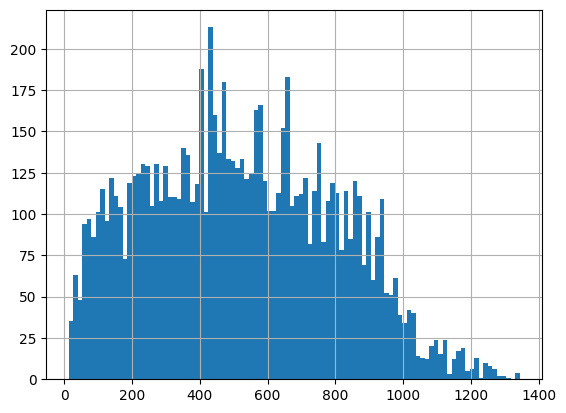

In [117]:
data['ponds_nearest'].hist(bins=100)

In [118]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('ponds_nearest')

Пропущенных значений - 13997 (61.89%)


In [119]:
# Проверка гипотезы о том, что количество пропусков в столбце ponds_nearest равно количеству нулевых значений в столбце arks_around_3000
len(data.query('ponds_around_3000 == 0'))

13997

#### Заполнение пропусков в столбце days_exposition

In [120]:
# Вывод основных статистических параметров столбца
data['days_exposition'].describe()

count    19556.000000
mean       180.937104
std        219.775466
min          1.000000
25%         45.000000
50%         95.500000
75%        231.250000
max       1580.000000
Name: days_exposition, dtype: float64

In [121]:
# Проверка наличия дробных значений с коррекцией двоичного представления чисел
len(data.query('days_exposition % 1 > 1e-10'))

0

<Axes: >

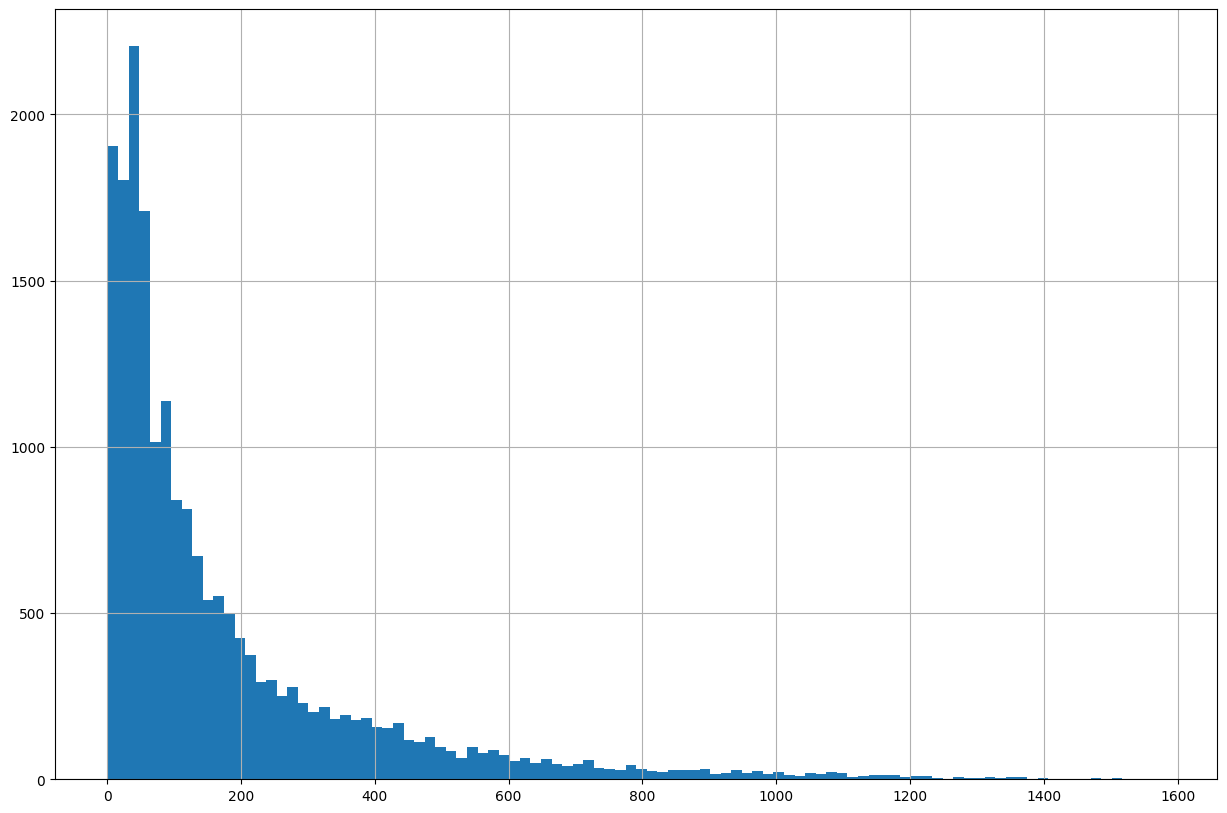

In [122]:
data['days_exposition'].hist(bins=100, figsize=(15, 10))

In [123]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('days_exposition')

Пропущенных значений - 3059 (13.53%)


#### Заполнение пропусков в столбце ceiling_height

<Axes: xlabel='last_price', ylabel='ceiling_height'>

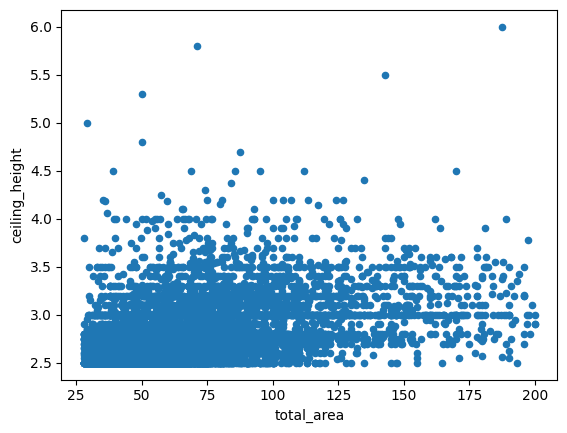

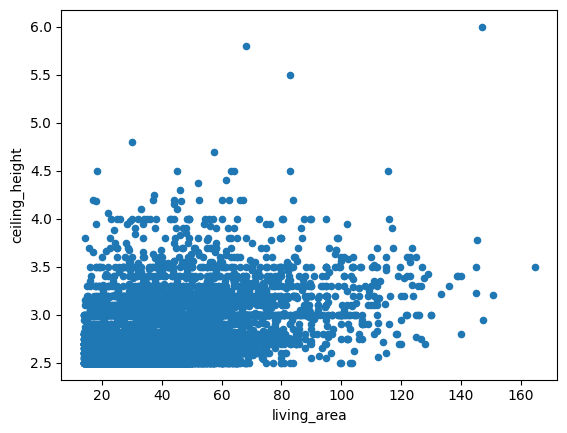

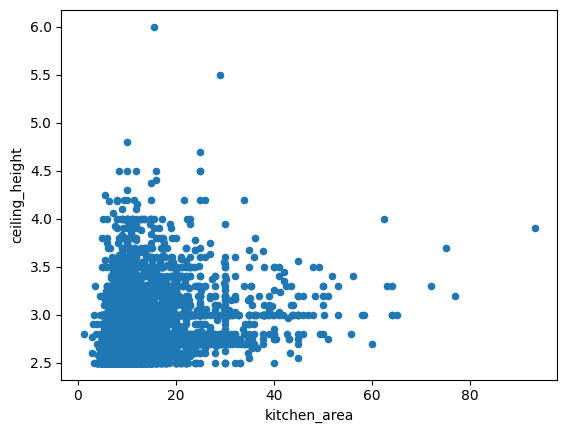

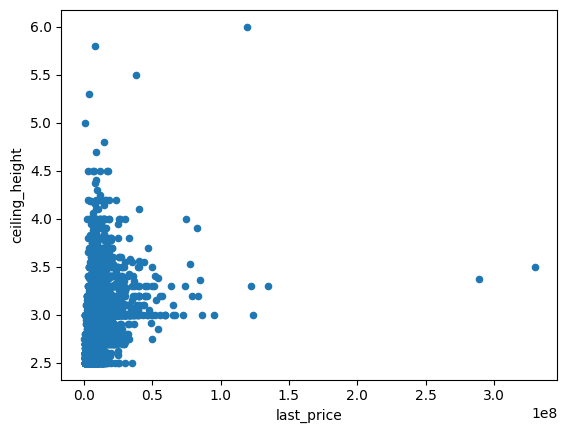

In [125]:
# Визуальная проверка корреляции значений столбца ceiling_height со столбцами, показывающими наибольшую степень корреляции
data.plot(x='total_area', y='ceiling_height', kind='scatter')
data.plot(x='living_area', y='ceiling_height', kind='scatter')
data.plot(x='kitchen_area', y='ceiling_height', kind='scatter')
data.plot(x='last_price', y='ceiling_height', kind='scatter')

<Axes: xlabel='ceiling_height', ylabel='clean_locality_name_number'>

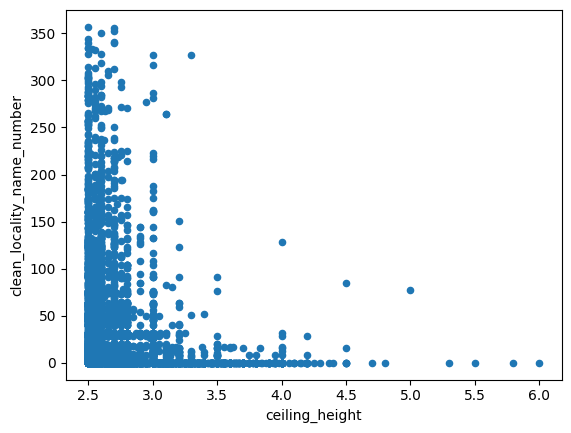

In [126]:
# Проверка гипотезы о том, что в одном населенном пунке одинаковая высота потолков
data.plot(x='ceiling_height', y='clean_locality_name_number', kind='scatter')

In [127]:
# Функция для расчета медианного значения высоты потолка для схожих квартир
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана высоты потолка
def get_ceiling_height_median(row):
    return data[
        (data.index != row.name) &
        (data['floors_total'] == row['floors_total']) &
        (data['clean_locality_name'] == row['clean_locality_name']) &
        ((data['total_area'] // 10) == (row['total_area'] // 10)) &
        ((data['city_сenters_nearest'] // 1000) == (row['city_сenters_nearest'] // 1000)) &
        (data['ceiling_height'].isnull() == False)
    ]['ceiling_height'].median()

np.float64(0.7040384833089753)

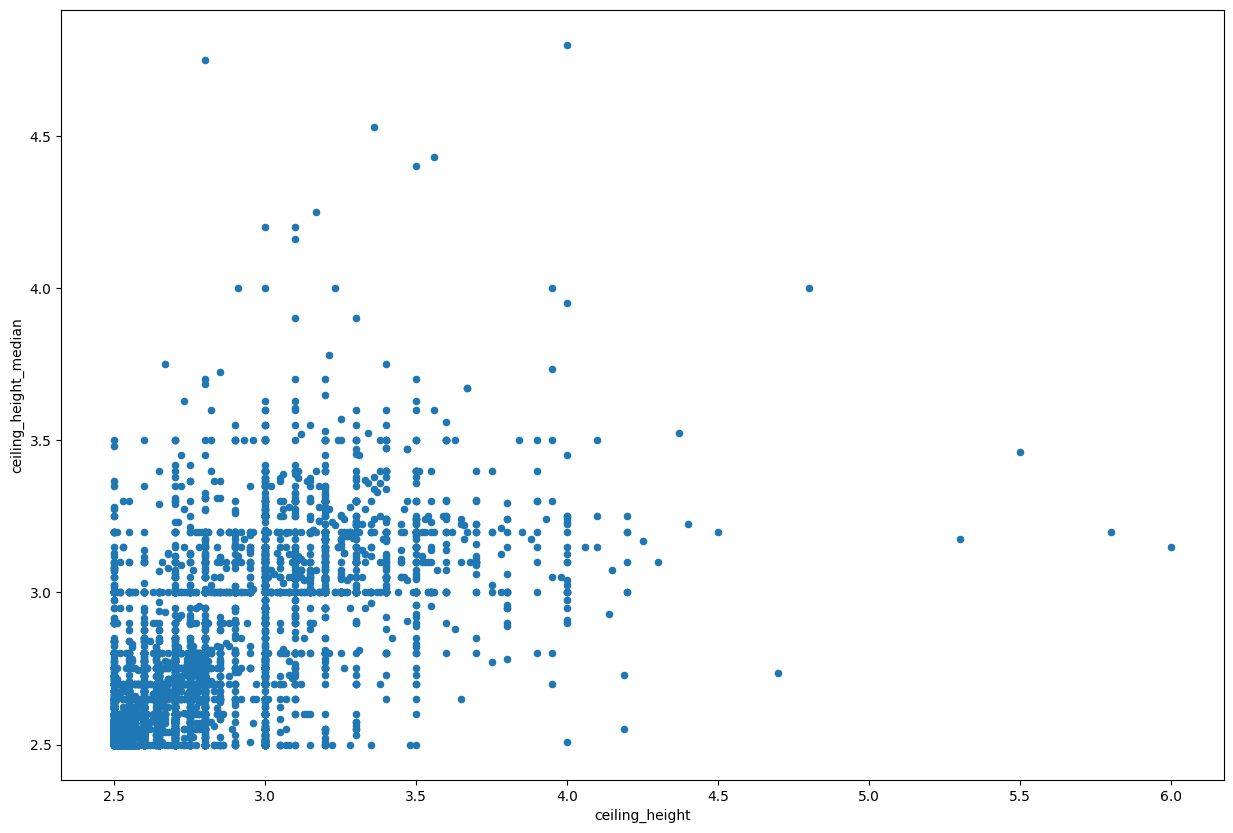

In [128]:
# Создание столбца для апробации функции расчета медианного значения
data.loc[data['ceiling_height'].isnull() == False, 'ceiling_height_median'] = data.apply(get_ceiling_height_median, axis=1)

# Проверка результатов апробации
data.plot(x='ceiling_height', y='ceiling_height_median', kind='scatter', figsize=(15, 10))
data['ceiling_height'].corr(data['ceiling_height_median'])

In [129]:
# Замена пропусков на медианные значения
data.loc[data['ceiling_height'].isnull(), 'ceiling_height'] = data[data['ceiling_height'].isnull()].apply(get_ceiling_height_median, axis=1)

In [130]:
# Проверка результатов замены
get_missing_values_proportion('ceiling_height')

Пропущенных значений - 3504 (15.49%)


#### Заполнение пропусков в столбцах living_area и kitchen_area

In [131]:
# Подсчет пропусков
get_missing_values_proportion('living_area')
get_missing_values_proportion('kitchen_area')

Пропущенных значений - 1779 (7.87%)
Пропущенных значений - 1883 (8.33%)


<Axes: xlabel='living_area', ylabel='rooms'>

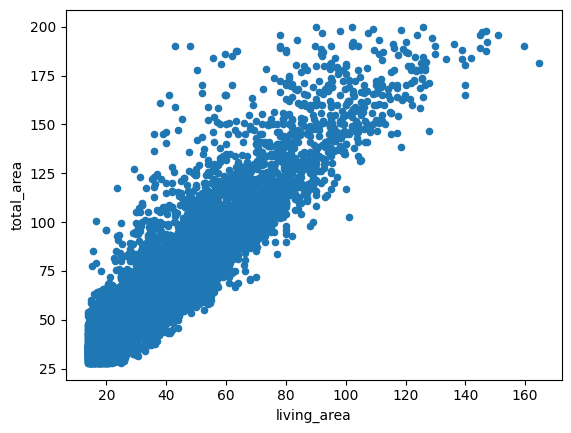

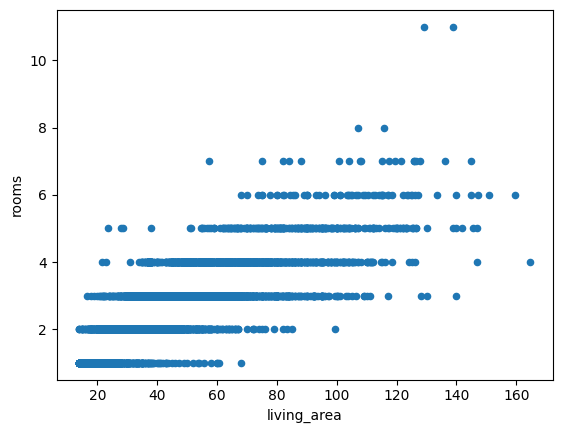

In [133]:
data.plot(x='living_area', y='total_area', kind='scatter')
data.plot(x='living_area', y='rooms', kind='scatter')

In [134]:
# Функция для расчета медианного значения жилой площади для схожих квартир
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана жилой площади
def get_living_area_median(row):
    return data[
        (data.index != row.name) &
        ((data['total_area'] // 5) == (row['total_area'] // 5)) &
        (data['rooms'] == row['rooms']) &
        (data['living_area'].isnull() == False)
    ]['living_area'].median()

np.float64(0.9541849803672667)

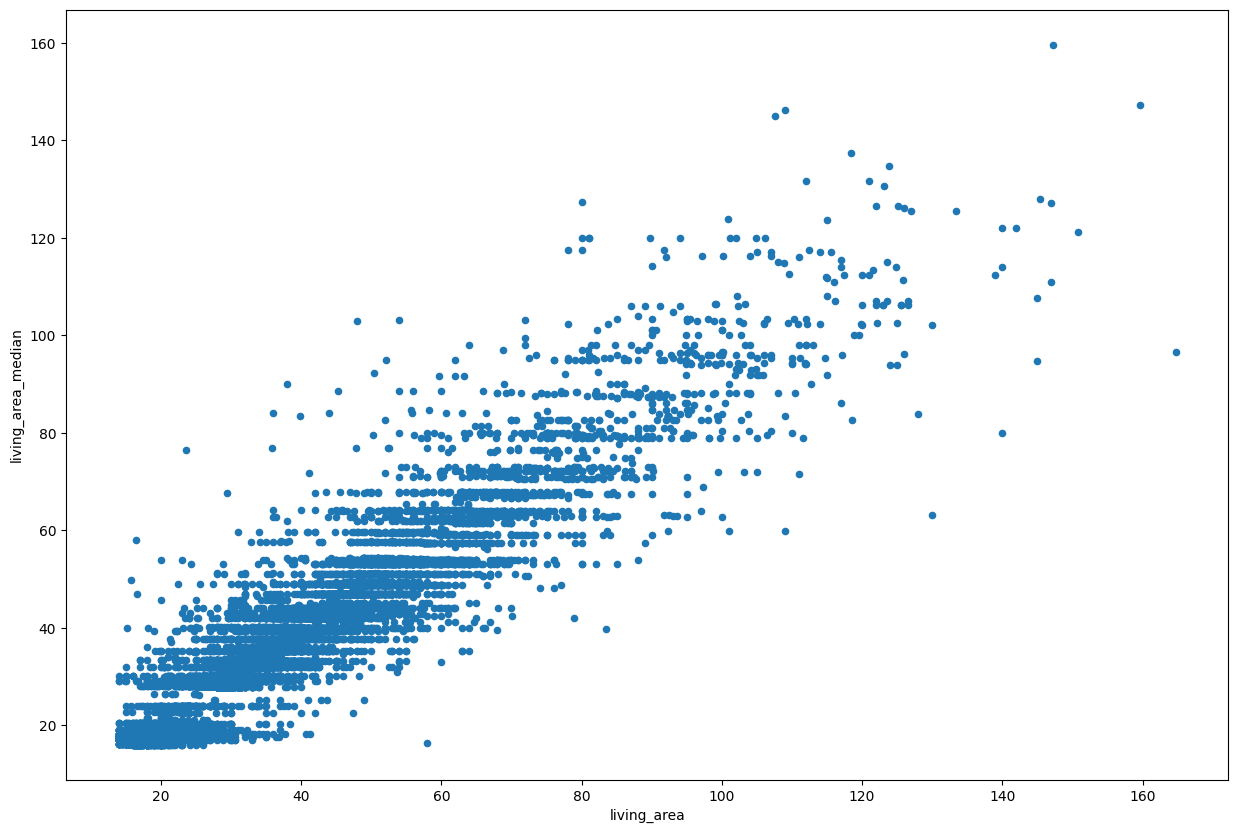

In [135]:
# Создание столбца для апробации функции расчета медианного значения
data.loc[data['living_area'].isnull() == False, 'living_area_median'] = data.apply(get_living_area_median, axis=1)

# Проверка результатов апробации
data.plot(x='living_area', y='living_area_median', kind='scatter', figsize=(15, 10))
data['living_area'].corr(data['living_area_median'])

In [136]:
# Замена пропусков на медианные значения
data.loc[data['living_area'].isnull(), 'living_area'] = data[data['living_area'].isnull()].apply(get_living_area_median, axis=1)

# Проверка результатов замены
get_missing_values_proportion('living_area')

Пропущенных значений - 9 (0.04%)


In [137]:
# Удаление записей с пропущенными значениями
data.dropna(subset=['living_area'], inplace=True)
data = data.reset_index(drop=True)

# Проверка результатов удаления
get_missing_values_proportion('living_area')

Пропущенных значений - 0 (0.00%)


<Axes: xlabel='kitchen_area', ylabel='living_area'>

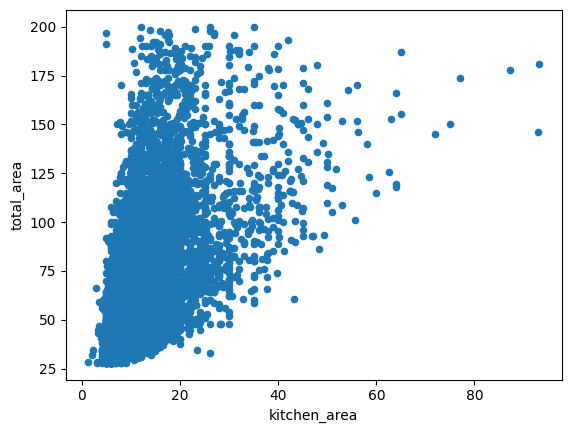

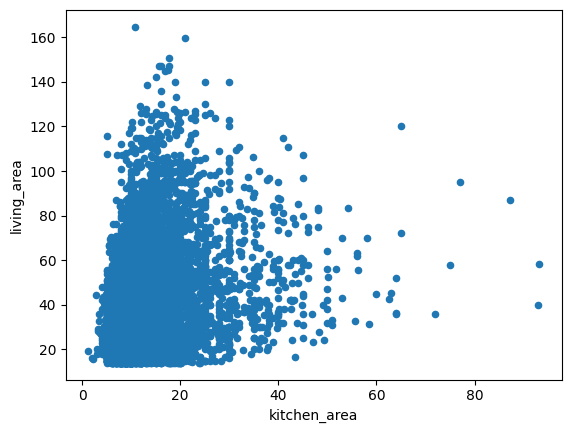

In [138]:
data.plot(x='kitchen_area', y='total_area', kind='scatter')
data.plot(x='kitchen_area', y='living_area', kind='scatter')

In [139]:
# Функция для расчета медианного значения площади кухни для схожих квартир
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана площади кухни
def get_kitchen_area_median(row):
    return data[
        (data.index != row.name) &
        ((data['total_area'] // 5) == (row['total_area'] // 5)) &
        ((data['living_area'] // 5) == (row['living_area'] // 5)) &
        (data['ceiling_height'] == row['ceiling_height']) &
        (data['kitchen_area'].isnull() == False)
    ]['kitchen_area'].median()

np.float64(0.7570861550486153)

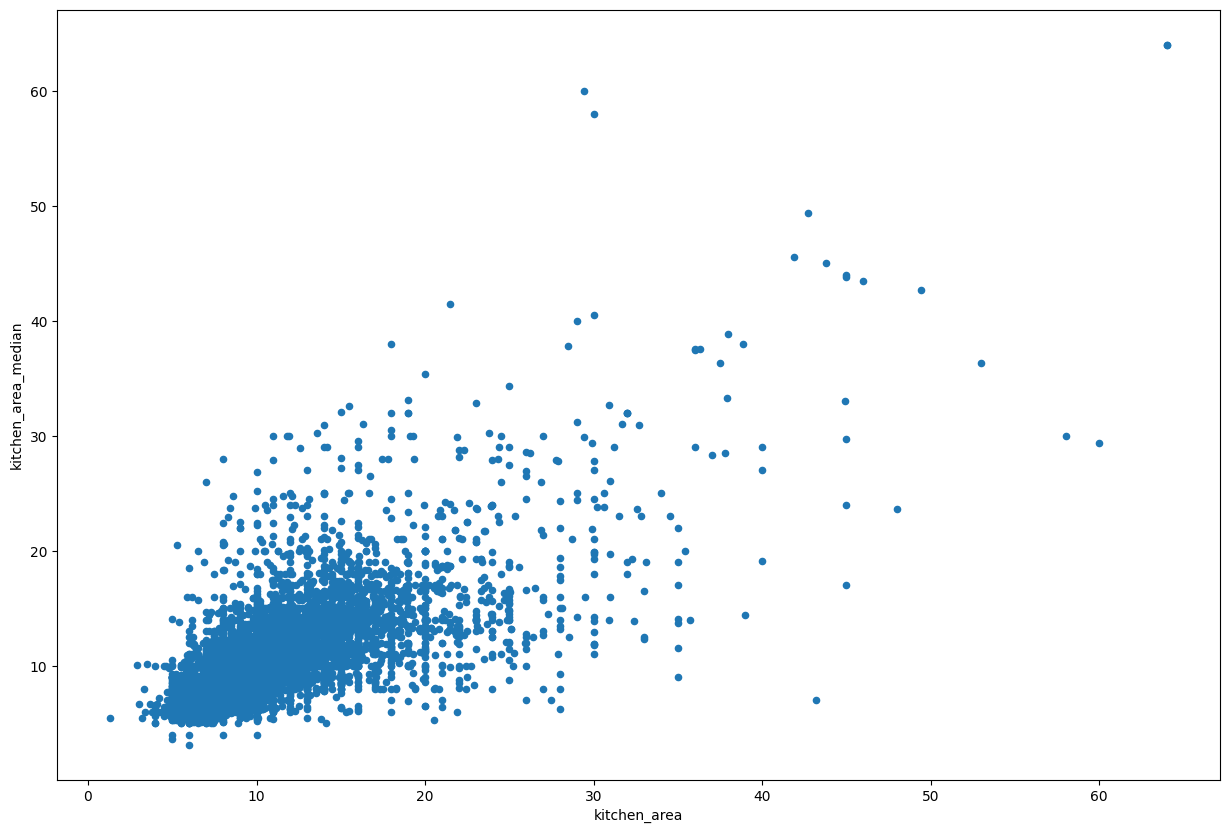

In [140]:
# Создание столбца для апробации функции расчета медианного значения
data.loc[data['kitchen_area'].isnull() == False, 'kitchen_area_median'] = data.apply(get_kitchen_area_median, axis=1)

# Проверка результатов апробации
data.plot(x='kitchen_area', y='kitchen_area_median', kind='scatter', figsize=(15, 10))
data['kitchen_area'].corr(data['kitchen_area_median'])

In [141]:
# Замена пропусков на медианные значения
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = data[data['kitchen_area'].isnull()].apply(get_kitchen_area_median, axis=1)

# Проверка результатов замены
get_missing_values_proportion('kitchen_area')

Пропущенных значений - 688 (3.04%)


In [142]:
# Удаление ненужных столбцов
data = data.drop(columns=['ceiling_height_median', 'living_area_median', 'kitchen_area_median'])

In [143]:
# Проверка результатов преодобработки данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22606 entries, 0 to 22605
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                22606 non-null  int64         
 1   last_price                  22606 non-null  int64         
 2   total_area                  22606 non-null  float64       
 3   first_day_exposition        22606 non-null  datetime64[ns]
 4   rooms                       22606 non-null  int64         
 5   ceiling_height              19103 non-null  float64       
 6   floors_total                22606 non-null  int64         
 7   living_area                 22606 non-null  float64       
 8   floor_                      22606 non-null  int64         
 9   apartment                   22606 non-null  bool          
 10  studio                      22606 non-null  bool          
 11  open_plan                   22606 non-null  bool      

**Выводы**

 - Переименовано 4 столбца для их соответствия общей стилистики нейминга.
 - Проведена проверка столбца `total_images` на пропуски и аномалии - таковых не выявлено.
 - У столбца `last_price` изменен тип на целочисленный с целью экономии памяти
 - В столбце `total_area` были найдены аномально маленькие значения - менее 28 $м^2$. По нормативам площадь квартиры должна составлять не менее 28 $м^2$ (http://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php). В связи с этим было принято решение удалить аномальные значения, которые составляют незначительную часть выборки.
 - Столбец `first_day_exposition` приведен к типу `datetime`.
 - В столбце `room` было обнаружено незначительное количество (65) записей со значением столбца 0. Было обнаружено, что эти квартиры имеют маленькую площадь. Был сделан вывод, что, скорее всего, это маленькие квартиры с 1 комнатой. В связи с этим значение 0 в столбце было заменено на 1.
 - В столбце `floors_total` было обнаружено незначительное количество пропусков (0.33%). Эти записи были удалены ввиду их малого количества. Столбец был приведен к целочисленному типу с целью экономии памяти.
 - В столбце `apartment` было обнаружено значительное количество пропусков (88.25%). В связи с тем, что количество апартаментов, как и студий и квартир со свободной планировкой очень мало, было решено заполнить пропуски `False`. Столбец был приведен к типу `bool` с целью экономии памяти.
 - Проведена проверка столбцов `studio` и `open_plan` на пропуски - таковых не выявлено.
 - В столбце `locality_name` было обнаружено незначительное количество пропусков (0.21%). Эти записи были удалены ввиду их малого количества.  - На основе столбца `locality_name` были созданы следующие столбцы:
     - `clean_locality_name`, содержащий очищенные от дубликатов названия населенных пунктов;
     - `clean_locality_type`, содержащий категоризированные типы населенных пунктов;
     - `clean_locality_type_number`, содержащий цифровое представление столбца `clean_locality_type`. Оно необходимо для упрощения построения графиков;
     - `clean_locality_name_number`, содержащий цифровое представление столбца `clean_locality_name`. Оно необходимо для упрощения построения графиков.
 - Проведена проверка столбца `floors` на пропуски и аномалии - таковых не выявлено.
 - В столбце `balcony` было обнаружено значительное количество пропусков (48.69%). В связи с тем, что во многих квартирах может не быть балконов, было решено заполнить пропуски 0. Столбец был приведен к типу `int` с целью экономии памяти.
 - В столбце `airports_nearest` было обнаружено значительное количество пропусков (22.95%), а также 1 запись с аномальным значением - 0 м до аэропорта. Было выявлено, что в расстояние до аэропорта в одном населенном пункте (за исключением Санкт-Петербурга, так как он имеет большую площадь) схожее, поэтому часть пропусков было заменено на медианное значение расстояния в населенном пункте. Но в большинстве населенных пунктов (292) вообще не фигурирует ни одной записи о расстоянии до аэропорта. В связи с этим было заполнено лишь 0.02% данных.
 - В столбце `city_center_nearest` было обнаружено значительное количество пропусков (22.85%). Было выявлено, что расстояние измеряется не до центра населенного пункта, а до центра Санкт-Петербурга. Также было выявлено, что в расстояние до центра в одном населенном пункте (за исключением Санкт-Петербурга, так как он имеет большую площадь) схожее, поэтому часть пропусков было заменено на медианное значение расстояния в населенном пунке. Но в большинстве населенных пунктов вообще не фигурирует ни одной записи о расстоянии до центра. В связи с этим было заполнено лишь `0.03%` данных. Остальные пропуски было решено заполнить `-1`, чтобы можно было отличить пропуски от данных и привести к целочисленному типу. Хоть столбец и является важным для одной из целей исследование, отсутствие какой-либо корреляции с другими столбцами, не позволяет заполнить пропуски.
 - В столбце `praks_around_3000` было обнаружено значительное количество пропусков (22.85%). Также было выявлено, что в столбце `parks_nearest`:
     - отсутствуют данные о парках далее 3 км;
     - отсутствуют данные для записей, где есть пропуски в столбце `praks_around_3000`;
     - количество пропусков составляет 65.60% и равно сумме пропусков и нулевых значений в столбце `praks_around_3000`.
    
    В связи с этим было принято решение заполнить пропуски в столбце `praks_around_3000` "0", а в столбце `parks_nearest` "-1", так как, скорее всего, пропуски означают отсуствие прудов в радиусе 3 км.
 - В столбцах `ponds_around_3000` и `ponds_nearest` ситуация повторилась, за исключением того, что данные столбца `ponds_nearest` имеют максимальное значение около 1350 м. В связи с этим, возможно, дано не верное определение столбца `ponds_around_3000`, и они оба несут информацию о пруда в радиусе 1.5. Но данную информацию необходимо уточнять у поставщика данных.
   - В столбце `days_exposition` было обнаружено значительное количество пропусков (13.62%). В связи с тем, что пропуски в столбце не подлежат восстановлению на основе каких-либо других данных, было решено заполнить пропуски `-1`, чтобы можно было отличить пропуски от данных и привести к целочисленному типу. Столбец был приведен к типу `int` с целью экономии памяти.
 - В столбце `ceiling_height` было обнаружено незначительное количество аномалий (102) - высота потолка ниже 2.5 м и выше 5 м. Значения более 25 м было решено разделить на 10, так как их было чуть больше других, что может свидетельствовать о том, что клиент забыл поставить точку в дробном числе. Остальные аномалии были удалены в виду их малого количества. Также в столбце было обнаружено значительное количество пропусков (38.58%). Было выявлено, что медиана высота потолка в схожих домах коррелирует на уровне 0.71. Гипотеза строилась на основе того, что квартиры в одном населенном пунке, со схожим расстоянием до цента, одинаковым количеством этажей и схожей площадью - это квартиры в одном или похожих по типу застройки домах, где высота потолка будет схожа. Пропуски были заполнены медианными значениями. После заполнения в столбце осталось 16% пропусков, которые, хоть и влияют на цель исследования, но не могут быть заполнены.
 - В столбце `living_area` были найдены аномально маленькие значения - менее 28 $м^2$. По нормативам жилая площадь квартиры должна составлять не менее 14 $м^2$ [ссылка на норматив](http://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php). В связи с этим было принято решение удалить аномальные значения, которые составляют незначительную часть выборки (262 шт). Также в столбце было обнаружено значительное количество пропусков (7.91%). Было выявлено, что жилая площадь очень сильно коррелирует с общей площадью квартиры и количеством комнат (коэффициент корреляции Пирсона - 0.94 и 0.85, соответственно). На основе этого пропуски были заполнены медианным значением в схожих по этим двум критериям квартирах (полученные для заполненных значениях медианы в ходе тестирования коррелировали с реальными на уровне 0.95). Оставшиеся пропуски составили незначительные 0.1% и были удалены.
 - В столбце `kitchen_area` было обнаружено значительное количество пропусков (8.37%). Было выявлено, что площадь кухни определенным образом коррелирует с общей площадью квартиры, жилой площадью и высотой потолка (коэффициент корреляции Пирсона - 0.43, 0.44 и 0.62, соответственно). На основе этого пропуски были заполнены медианным значением в схожих по этим критериям квартирах (полученные для заполненных значениях медианы в ходе тестирования коррелировали с реальными на уровне 0.72). Оставшиеся пропуски составили 3.1%.
 - В большинстве столбцов пропуски были успешно заполнены, незначительное количество данных удалено. В реальной ситуации заполнение пропусков должно быть согласовано с поставщиком данных. Многие пропуски удастся после этого полностью восстановить. Также видно, что многие пропуски - результат ошибок в алгоритмах, а не следствие действия пользователя. Например, расстояние до центра города или аэропорта явно вычисляется какой-либо системой, а не вручную указывается пользователем.

## Шаг 3. Посчитайте и добавьте в таблицу

### Цена квадратного метра

In [144]:
# Расчет цены квадратного метра
data['m2_price'] = data['last_price'] / data['total_area']

# Проверка расчета
data['m2_price'].head()

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: m2_price, dtype: float64

### День недели, месяц и год публикации объявления

In [145]:
# Расчет дня недели публикации объявления
data['exposition_day_of_week'] = data['first_day_exposition'].dt.dayofweek

# Проверка расчета
data.loc[:4, ['first_day_exposition', 'exposition_day_of_week']]

,first_day_exposition,exposition_day_of_week
0,2019-03-07,3
1,2018-12-04,1
2,2015-08-20,3
3,2015-07-24,4
4,2018-06-19,1


In [146]:
# Расчет месяца публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# Проверка расчета
data.loc[:4, ['first_day_exposition', 'exposition_month']]

,first_day_exposition,exposition_month
0,2019-03-07,3
1,2018-12-04,12
2,2015-08-20,8
3,2015-07-24,7
4,2018-06-19,6


In [147]:
# Расчет года публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

# Проверка расчета
data.loc[:4, ['first_day_exposition', 'exposition_year']]

,first_day_exposition,exposition_year
0,2019-03-07,2019
1,2018-12-04,2018
2,2015-08-20,2015
3,2015-07-24,2015
4,2018-06-19,2018


### Этаж квартиры (варианты — первый, последний, другой)

In [148]:
# Проверка количества домов с одним этажем
len(data.query('floors_total == 1'))

23

In [149]:
# Функция для определения типа этажа
# row - (Series) Строка данных
# возвращает - (String) Тип этажа
def get_floor_category(row):
    if row['floor_'] == 1:
        if row['floor_'] == row['floors_total']:
            return 'другой'

        return 'первый'
    if row['floor_'] == row['floors_total']:
        return 'последний'

    return 'другой'

In [150]:
# Расчет типа этажа квартиры
data['floor_type'] = data.apply(get_floor_category, axis=1)

# Проверка расчета
data.loc[:4, ['floor_', 'floors_total', 'floor_type']]

,floor_,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой


In [151]:
# Проверка расчета для последних этажей
data.query('floor_ == floors_total')['floor_type'].head()

11    последний
12    последний
22    последний
35    последний
42    последний
Name: floor_type, dtype: object

In [152]:
# Проверка расчета для домов с одним этажем
data.query('floors_total == 1')['floor_type'].head()

2928    другой
4181    другой
5060    другой
5440    другой
5524    другой
Name: floor_type, dtype: object

### Cоотношение жилой и общей площади

In [153]:
# Расчет соотношения жилой и общей площади
data['living_total_area_ratio'] = data['living_area'] / data['total_area']

# Проверка расчета
data['living_total_area_ratio'].head()

0    0.472222
1    0.460396
2    0.612500
3    0.550629
4    0.320000
Name: living_total_area_ratio, dtype: float64

### Отношение площади кухни к общей

In [154]:
# Расчет отношения площади кухни к общей
data['kitchen_total_area_ratio'] = data['kitchen_area'] / data['total_area']

# Проверка расчета
data['kitchen_total_area_ratio'].head()

0    0.231481
1    0.272277
2    0.148214
3         NaN
4    0.410000
Name: kitchen_total_area_ratio, dtype: float64

### Выводы (шаг 3)

Выполнены все необходимые расчеты.

Для квартир в домах с одним этажем указан тип этажа "другой".

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Анализ площади, цены, числа комнат и высоты потолков

#### Изучение столбца total_area

In [155]:
# Вывод основных статистических параметров столбца
data['total_area'].describe()

count    22606.00000
mean        58.95416
std         26.36350
min         28.00000
25%         41.00000
50%         52.50000
75%         69.70000
max        200.00000
Name: total_area, dtype: float64

<Axes: >

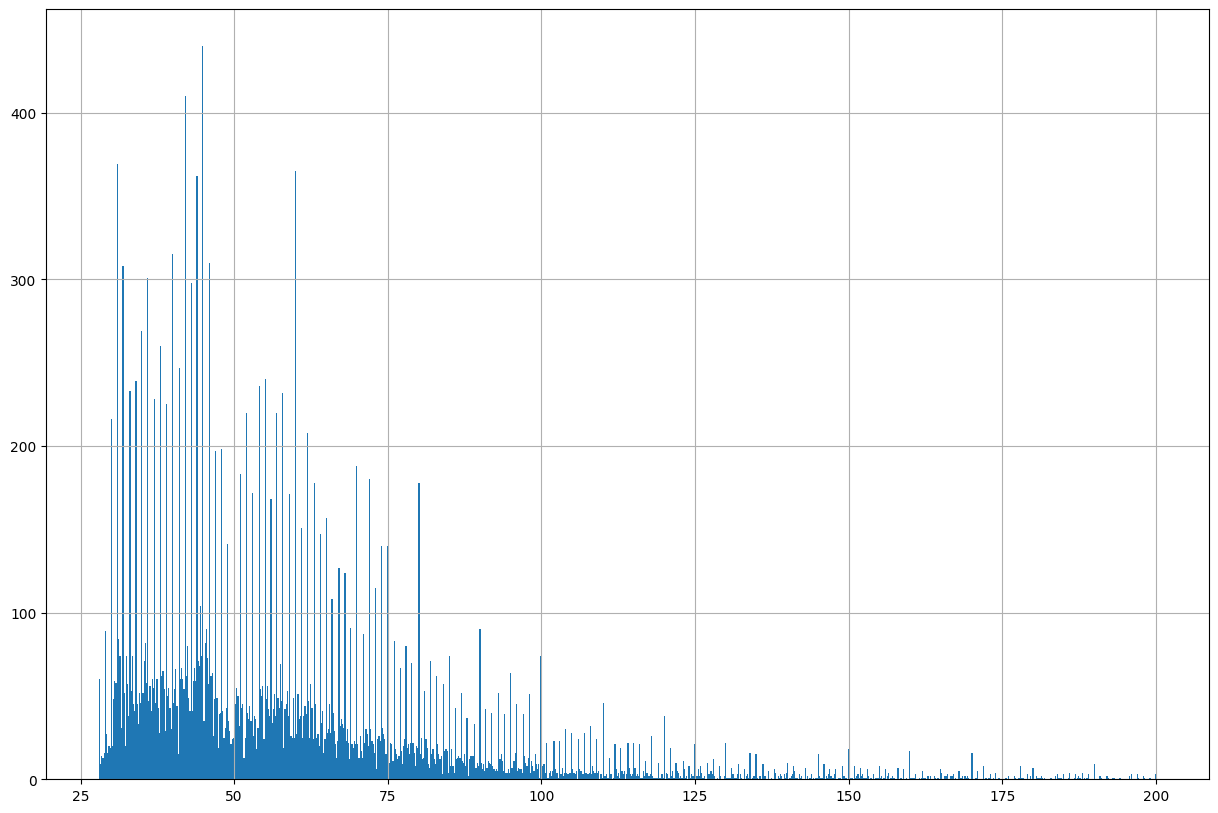

In [156]:
# Вывод гистограммы столбца
data['total_area'].hist(bins=900, figsize=(15, 10))

<Axes: >

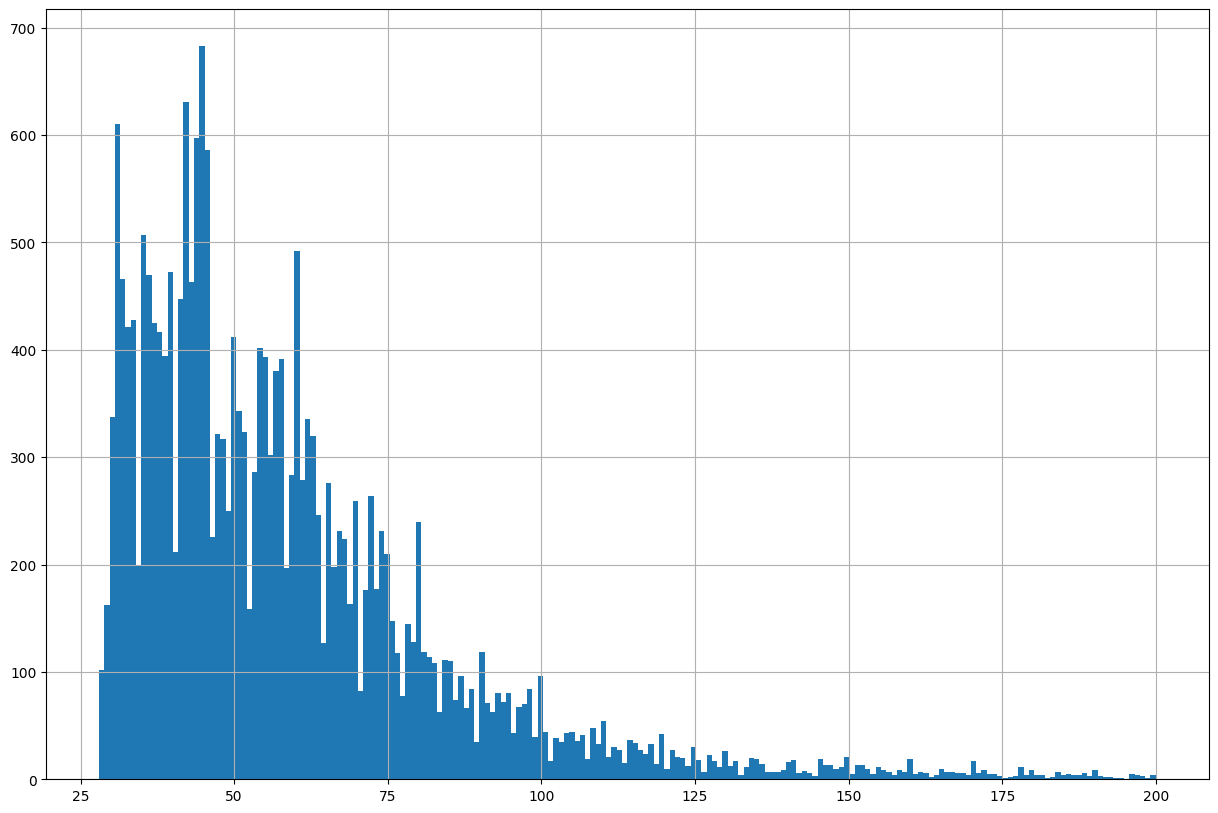

In [157]:
# Вывод гистограммы основной части данных столбца
data.query('total_area <= 200')['total_area'].hist(bins=200, figsize=(15, 10))

<Axes: >

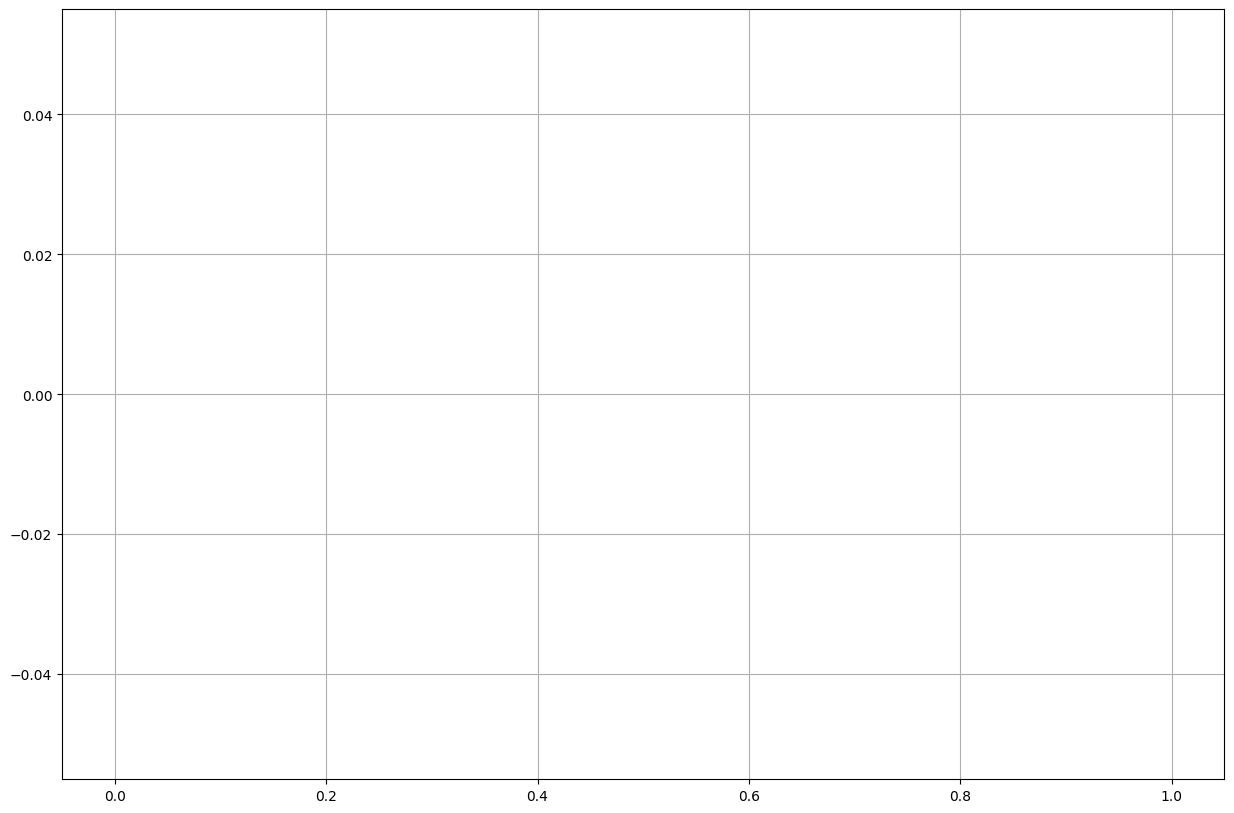

In [158]:
# Вывод гистограммы "хвоста" данных столбца
data.query('total_area > 200')['total_area'].hist(bins=200, figsize=(15, 10))

Основную долю рынка занимают квартиры с площадью от 30 до 50 квадратных метров (т.е., предположительно однокомнтаные и двухкомнатные квартиры). Количество квартир с площадью более 60 квадратных метров резко снижается. Самая большая площадь квартиры - 900 кв. метров. Квартир с очень маленькой площадью (до 25 кв. метров) тоже немного.

#### Изучение столбца living_area

In [159]:
# Вывод основных статистических параметров столбца
data['living_area'].describe()

count    22606.000000
mean        33.806826
std         17.313911
min         14.000000
25%         19.000000
50%         30.100000
75%         42.300000
max        164.700000
Name: living_area, dtype: float64

<Axes: >

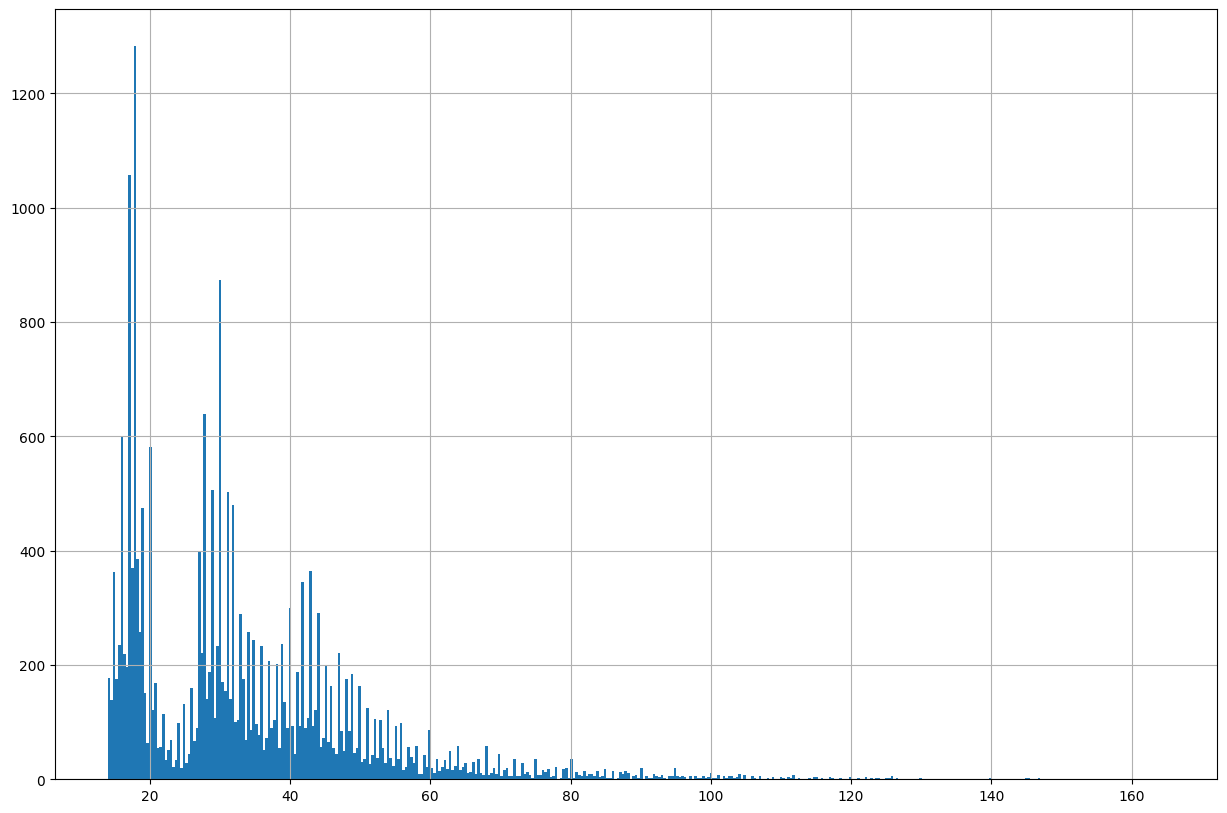

In [160]:
# Вывод гистограммы столбца
data['living_area'].hist(bins=409, figsize=(15, 10))

<Axes: >

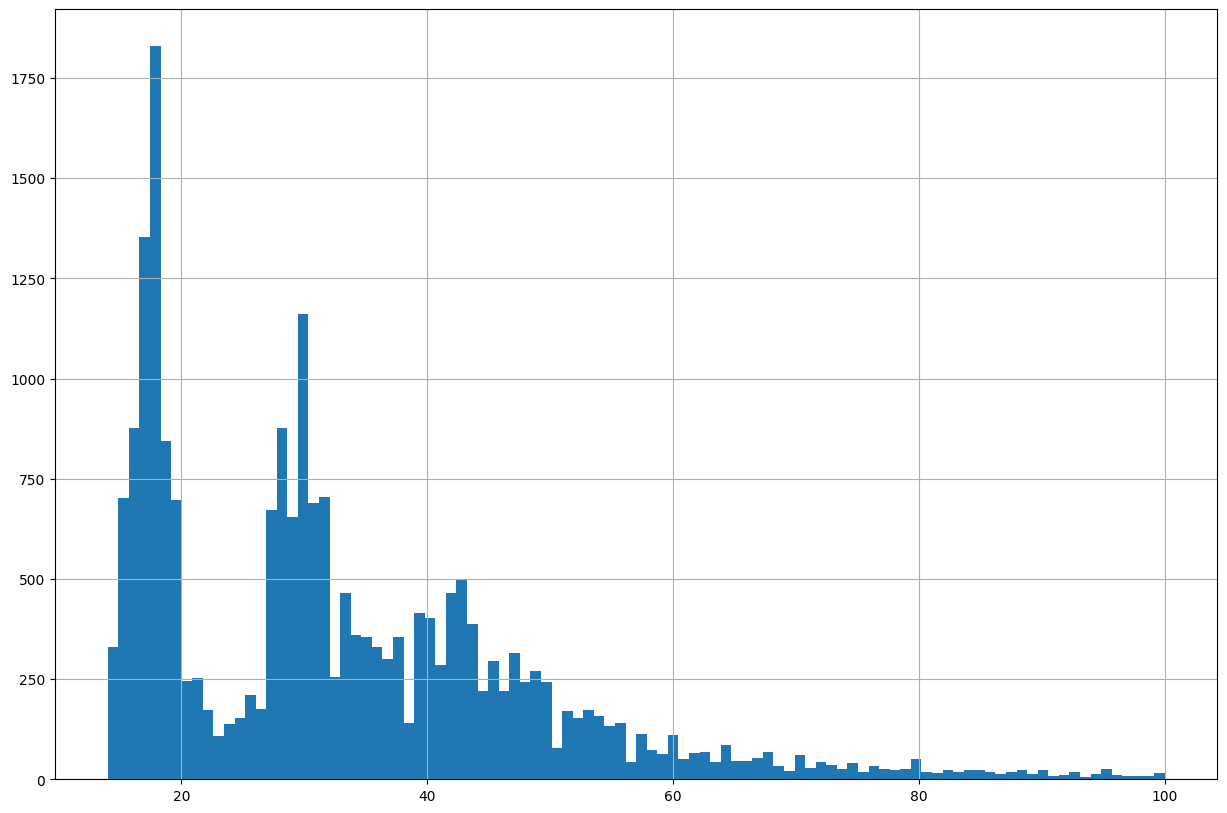

In [161]:
# Вывод гистограммы основной части данных столбца
data.query('living_area <= 100')['living_area'].hist(bins=100, figsize=(15, 10))

<Axes: >

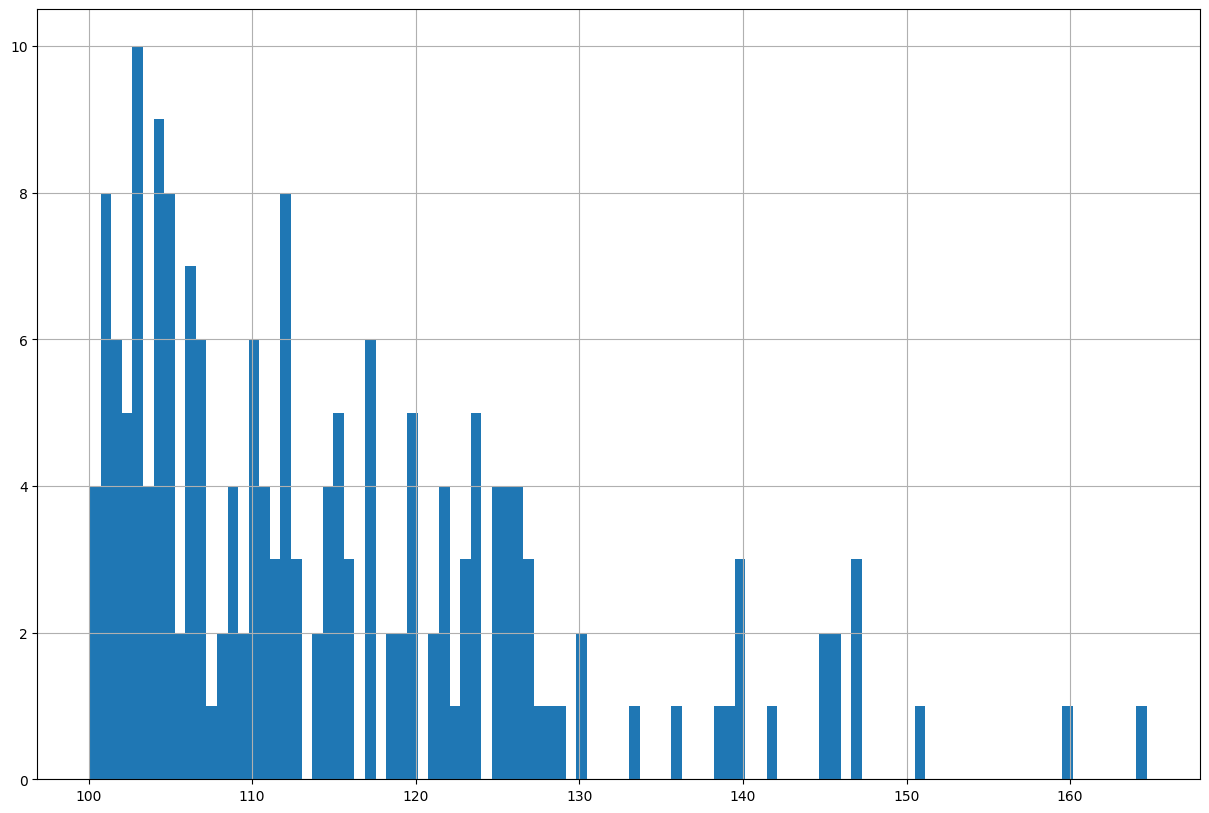

In [162]:
# Вывод гистограммы "хвоста" данных столбца
data.query('living_area > 100')['living_area'].hist(bins=100, figsize=(15, 10))

#### Изучение столбца kitchen_area

In [163]:
# Вывод основных статистических параметров столбца
data['kitchen_area'].describe()

count    21918.000000
mean        10.312765
std          5.261789
min          1.300000
25%          7.000000
50%          9.000000
75%         11.700000
max         93.200000
Name: kitchen_area, dtype: float64

<Axes: >

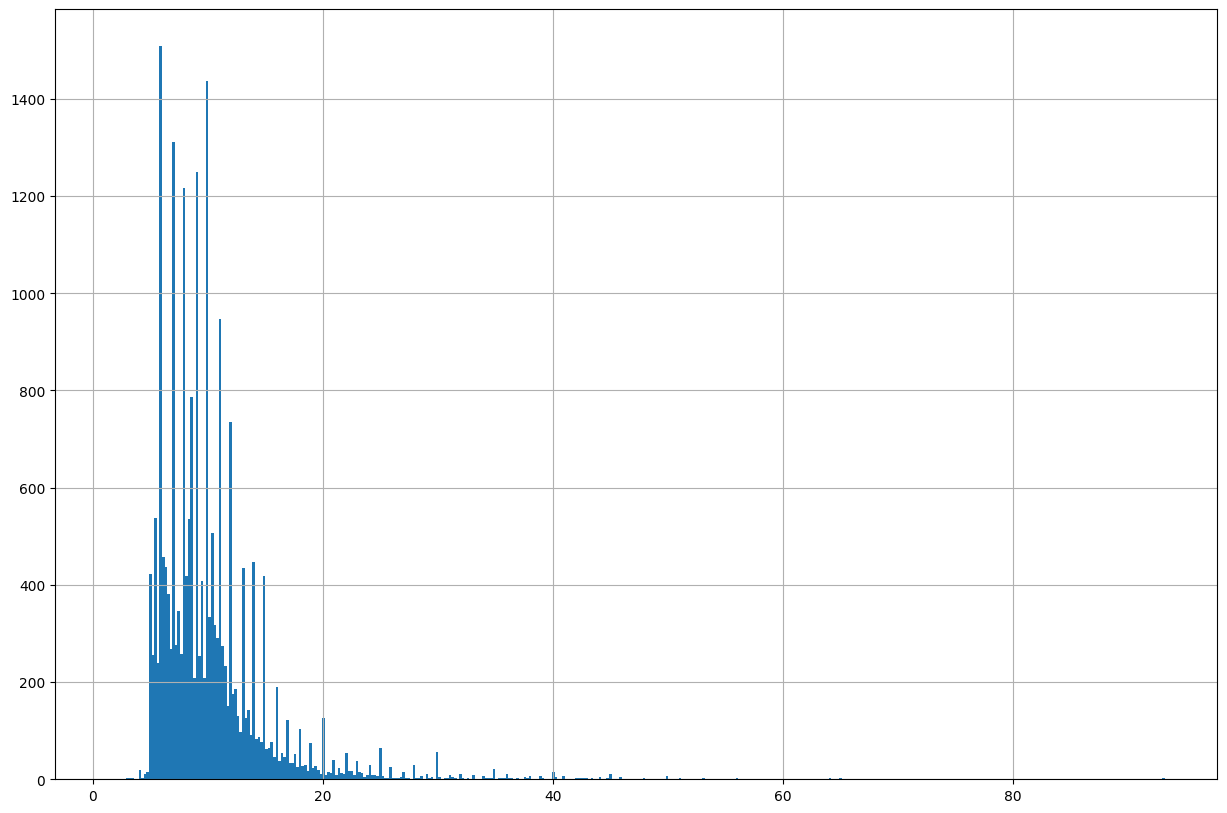

In [164]:
# Вывод гистограммы столбца
data['kitchen_area'].hist(bins=409, figsize=(15, 10))

<Axes: >

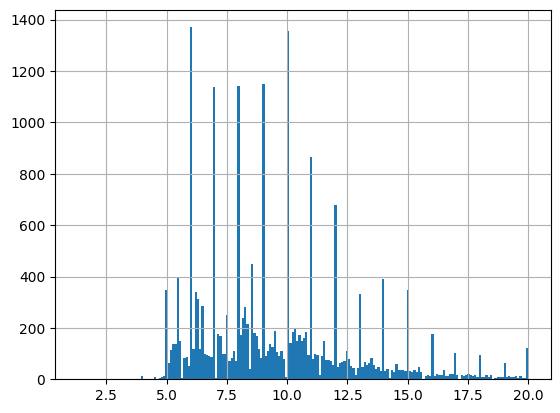

In [165]:
# Вывод гистограммы основной части данных столбца
data.query('kitchen_area <= 20')['kitchen_area'].hist(bins=200)

<Axes: >

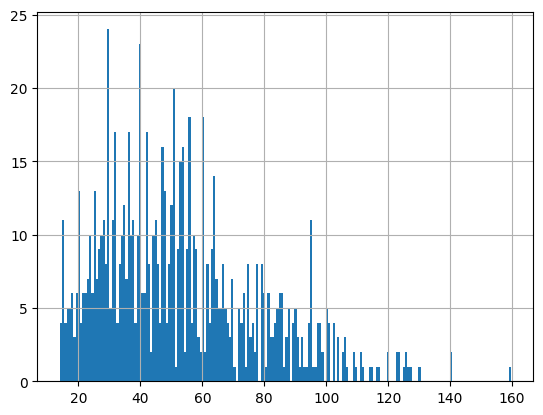

In [166]:
# Вывод гистограммы "хвоста" данных столбца
data.query('kitchen_area > 20')['living_area'].hist(bins=200)

#### Изучение столбца last_price

In [167]:
# Вывод основных статистических параметров столбца
data['last_price'].describe()

count    2.260600e+04
mean     6.103202e+06
std      6.299010e+06
min      1.219000e+04
25%      3.499999e+06
50%      4.680000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

<Axes: >

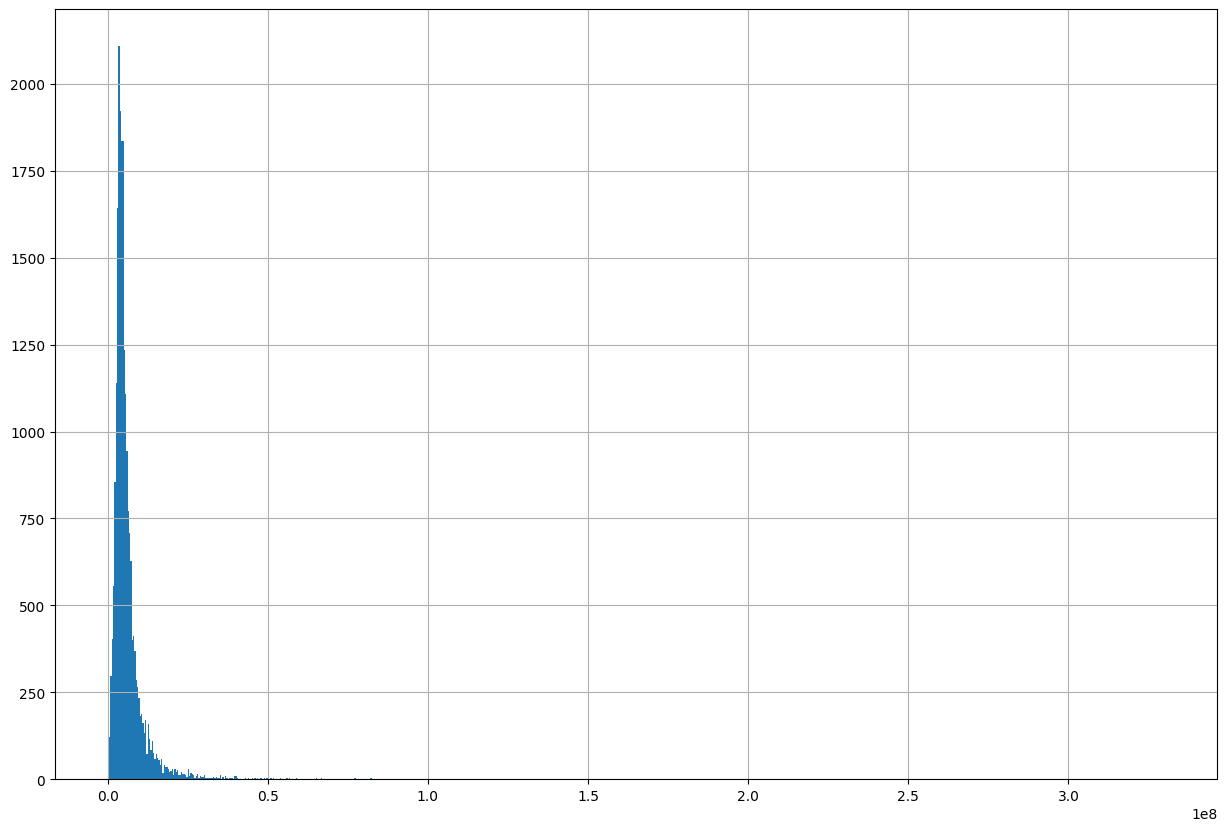

In [168]:
# Вывод гистограммы столбца
data['last_price'].hist(bins=793, figsize=(15, 10))

<Axes: >

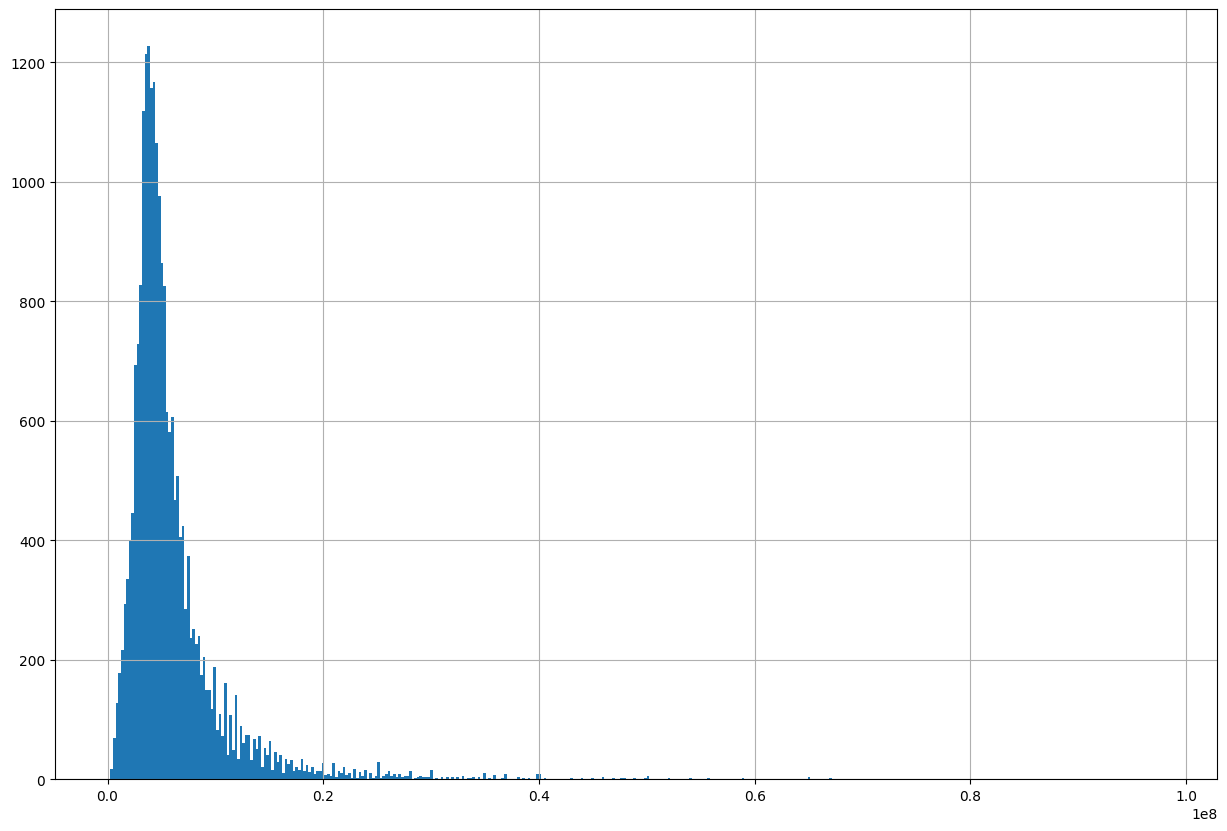

In [169]:
# Вывод гистограммы приближенно основной части данных столбца
data.query('last_price <= 1e8')['last_price'].hist(bins=400, figsize=(15, 10))

<Axes: >

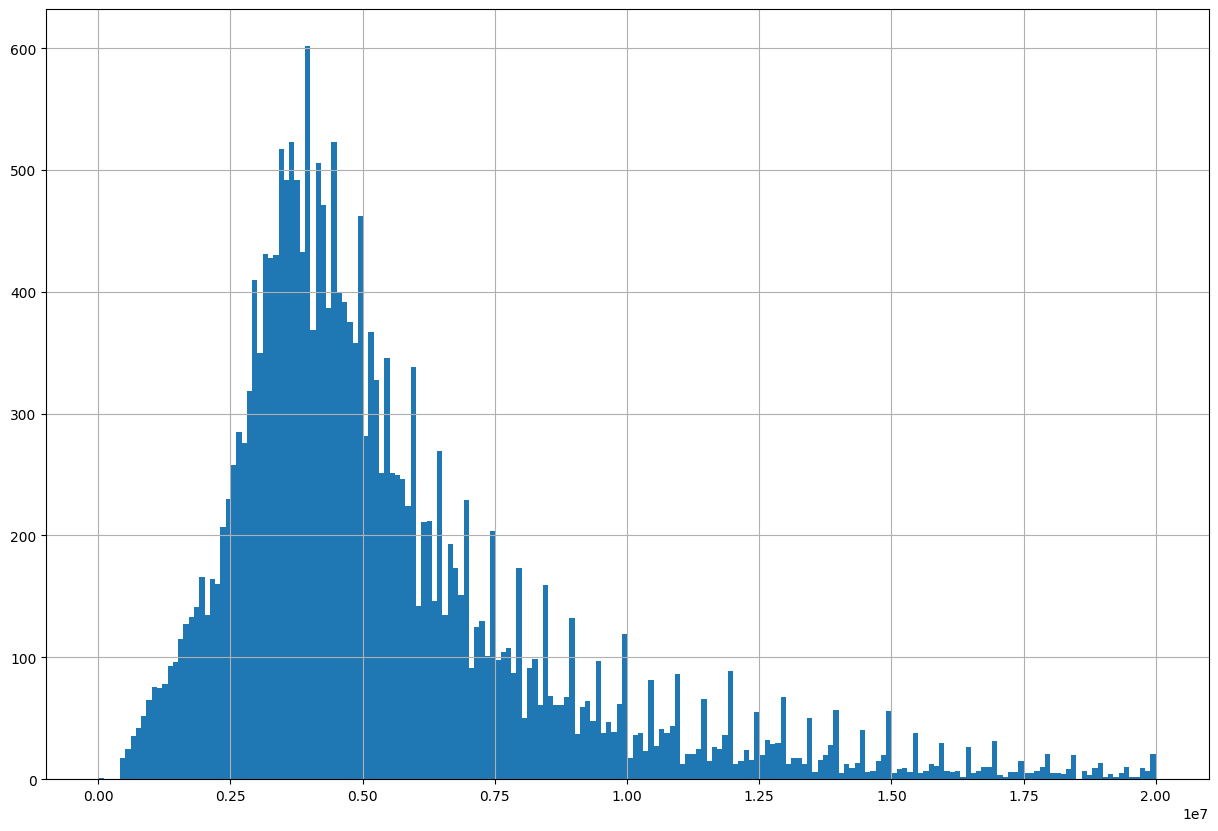

In [170]:
# Вывод гистограммы основной части данных столбца
data.query('last_price <= 0.2e8')['last_price'].hist(bins=200, figsize=(15, 10))

In [171]:
# Проверка обнаруженной аномалии
data.query('last_price <= 0.004e8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clean_locality_name,clean_locality_type,clean_locality_type_number,clean_locality_name_number,m2_price,exposition_day_of_week,exposition_month,exposition_year,floor_type,living_total_area_ratio,kitchen_total_area_ratio
8374,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0,Санкт-Петербург,undefined,0,0,111.834862,2,3,2019,последний,0.293578,0.37156


In [172]:
# Очистка данных от аномалии
data = data.query('last_price > 0.004e8')

# Проверка результатов очистки
len(data.query('last_price <= 0.004e8'))

0

<Axes: >

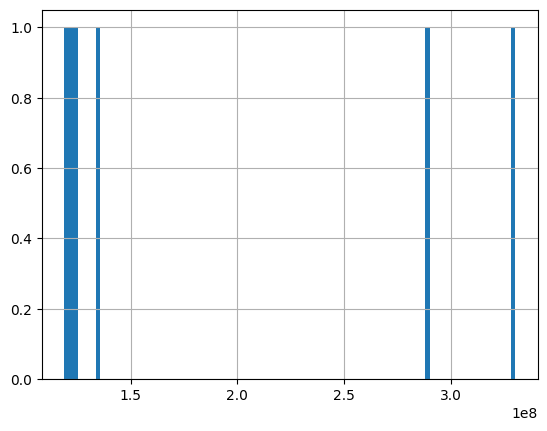

In [173]:
# Вывод гистограммы "хвоста" данных столбца
data.query('last_price > 1e8')['last_price'].hist(bins=100)

<Axes: >

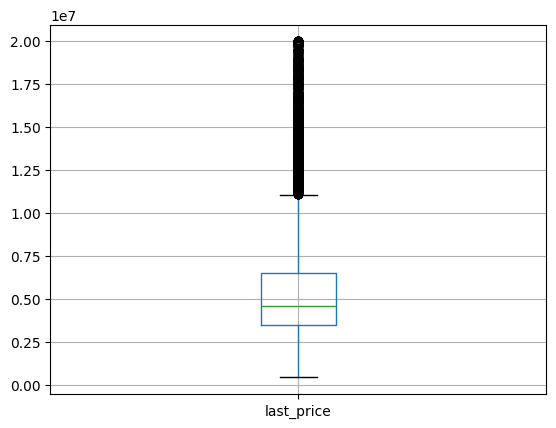

In [174]:
data.query('last_price <= 0.2e8').boxplot(column='last_price')

Количество квартир с ценой примерно до 3,5-3,9 млн. рублей равномерно растет, достигая пика. После этого значения количество квартир с ценой выше пиковой также равномерно снижается. Здесь выделяется квартира с максимальной стоимостью в 763 млн. рублей

#### Изучение столбца rooms

In [175]:
# Вывод основных статистических параметров столбца
data['rooms'].describe()

count    22605.000000
mean         2.070914
std          0.980687
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

<Axes: >

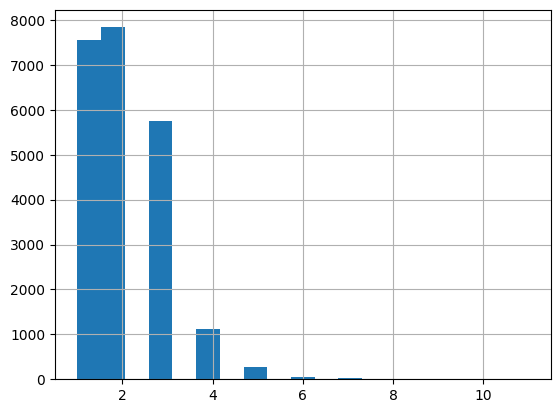

In [176]:
# Вывод гистограммы столбца
data['rooms'].hist(bins=19)

<Axes: >

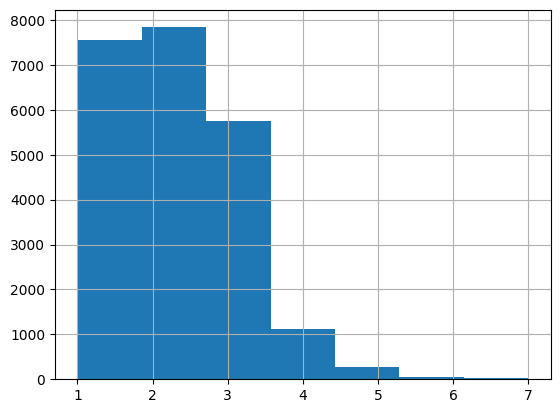

In [177]:
# Вывод гистограммы основной части данных столбца
data.query('rooms <= 7')['rooms'].hist(bins=7)

<Axes: >

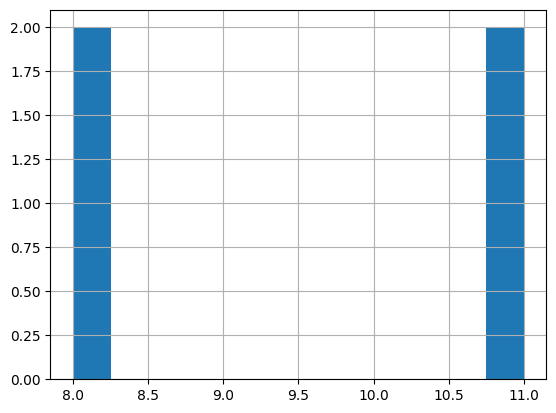

In [178]:
# Вывод гистограммы "хвоста" данных столбца
data.query('rooms > 7')['rooms'].hist(bins=12)

Основную долю объявлений составляют одно- и двухкомнатные квартиры. Трехкомнатных квартир  меньше. Четырехкомнатных квартир тоже немало - чуть более 1000 объявлений. Остальные квартиры представлены крайне редко.

#### Изучение столбца ceiling_height

In [179]:
# Вывод основных статистических параметров столбца
data['ceiling_height'].describe()

count    19102.000000
mean         2.716133
std          0.251508
min          2.500000
25%          2.540000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

<Axes: >

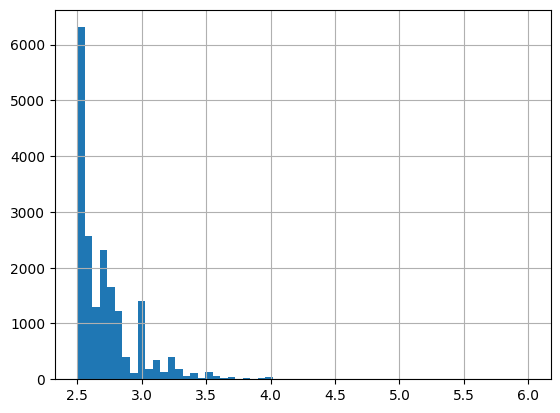

In [180]:
# Вывод гистограммы столбца
data['ceiling_height'].hist(bins=60)

<Axes: >

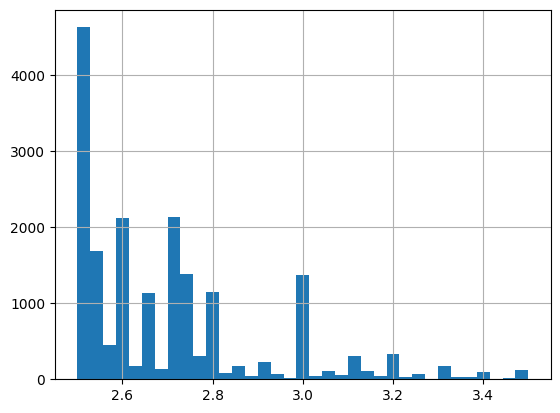

In [181]:
# Вывод гистограммы основной части данных столбца
data.query('ceiling_height <= 3.5')['ceiling_height'].hist(bins=35)

<Axes: >

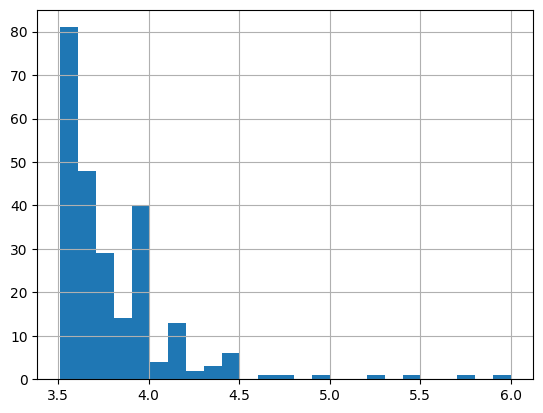

In [182]:
# Вывод гистограммы "хвоста" данных столбца
data.query('ceiling_height > 3.5')['ceiling_height'].hist(bins=25)

В основном высота потолков составляет от 2,4 до 2,8 метра.

#### Изучение столбца floor

In [183]:
data['floor_'].describe()

count    22605.000000
mean         5.837823
std          4.827283
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor_, dtype: float64

array([[<Axes: title={'center': 'floor_'}>]], dtype=object)

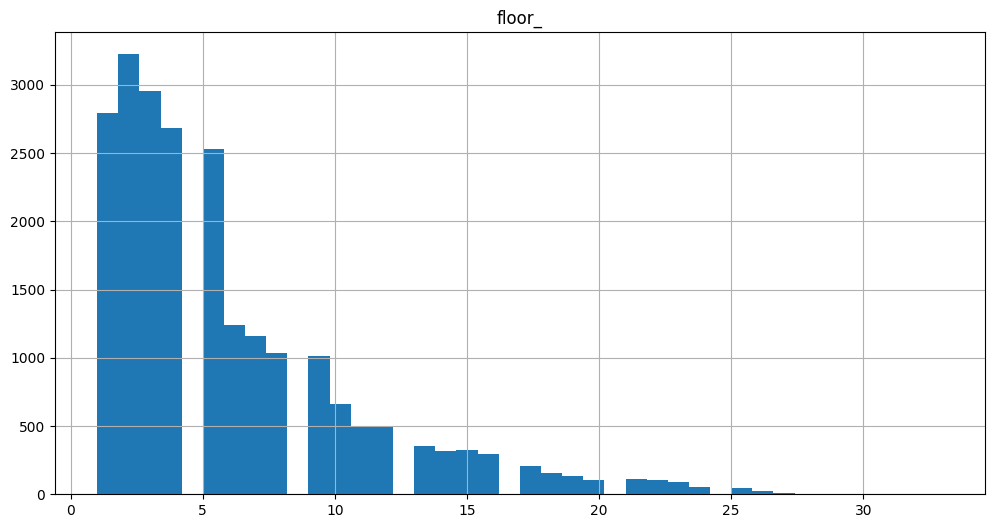

In [184]:
data.hist('floor_', bins=40, figsize=(12,6))

 Квартиры, указанные в объявлениях, в основном находятся на этажах с 1 по 5. Предположительно это связано с тем, что много объявлений о продаже квартир выставлено в пятиэтажных домах. Понятно, что в домах с большей этажностью квартиры тоже продаются на этажах с 1 по 5.

#### Изучение столбца floors_total

In [185]:
data['floors_total'].describe()

count    22605.000000
mean        10.617297
std          6.535395
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

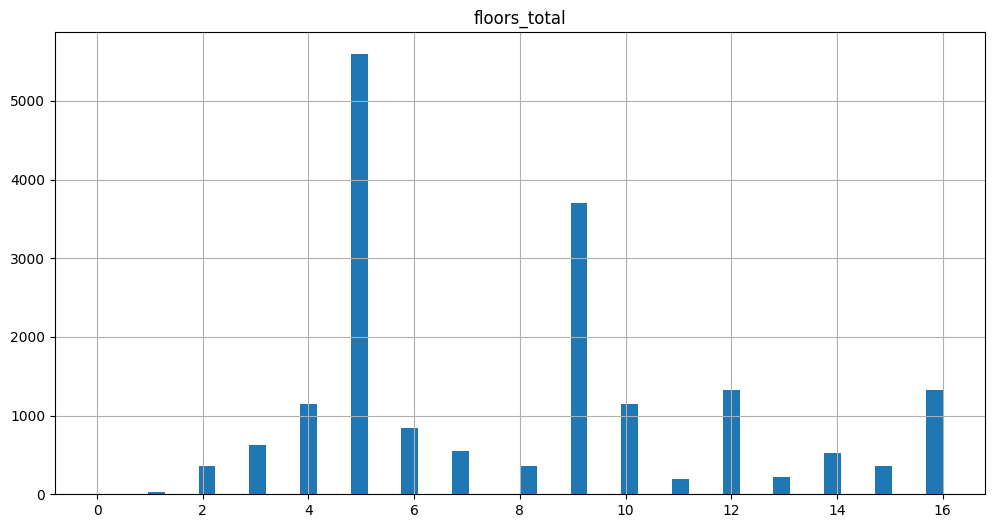

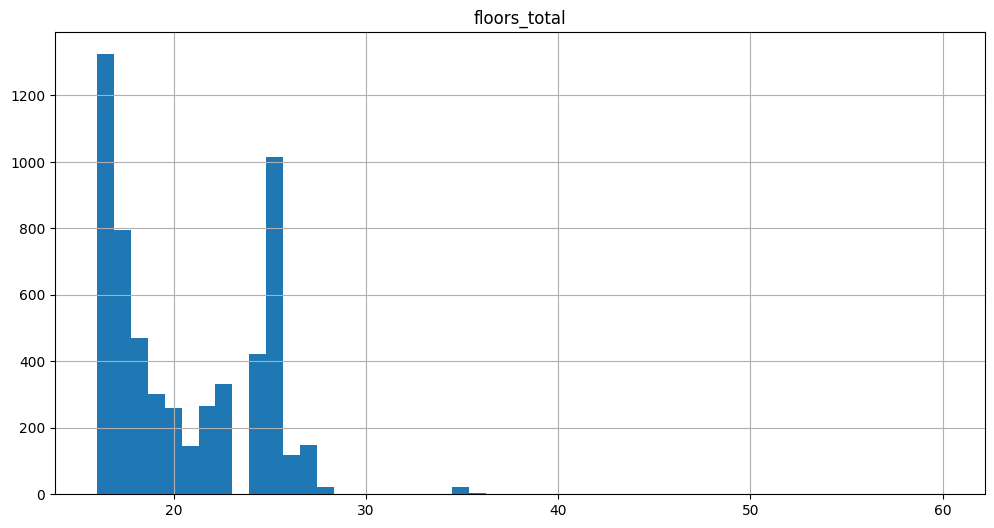

In [186]:
data.hist('floors_total',bins=50, range=(0,16), figsize=(12,6))
data.hist('floors_total',bins=50, range=(16,60), figsize=(12,6))

Пятиэтажных домов действительно гораздо больше в объявлениях, чем всех остальных - практически 6000. Далее следуют девятиэтажные дома - их примерно 3800. Остальные дома представлены менее широко.

#### Изучение столбца cityCenters_nearest

In [187]:
data['city_сenters_nearest'].describe()

count    17392.000000
mean     14274.404841
std       8609.137835
min        181.000000
25%       9425.000000
50%      13145.000000
75%      16293.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

array([[<Axes: title={'center': 'city_сenters_nearest'}>]], dtype=object)

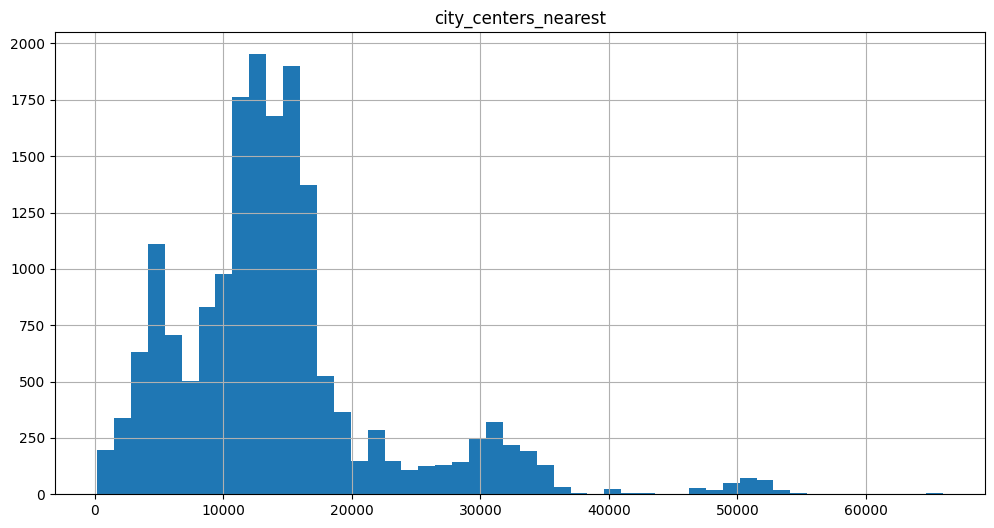

In [188]:
data.hist('city_сenters_nearest', bins=50, figsize=(12,6))

Несколько пиков разной степени выраженности:

около 5000 метров;
от 11000 до 16000 метров;
около 30000 метров;
около 50000 метров.
Первый пик может быть вызван тем, что много объявлений размещено в небольших городах, где расстояние до центра города будет невелико.

Второй пик типичен для крупных городов (в нашем случае - Санкт-Петербург). Здесь основные продажи приходятся на квартиры, которые расположены не на очень большом расстоянии до центра города.

Третий и четвертый пики типичны также для больших городов (это типичные спальные районы, расположенные на очень большом расстоянии до центра города).

#### Изучение столбца airports_nearest

In [189]:
data['airports_nearest'].describe()

count    17378.000000
mean     28854.626395
std      12650.687759
min          0.000000
25%      18539.000000
50%      26882.500000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

array([[<Axes: title={'center': 'airports_nearest'}>]], dtype=object)

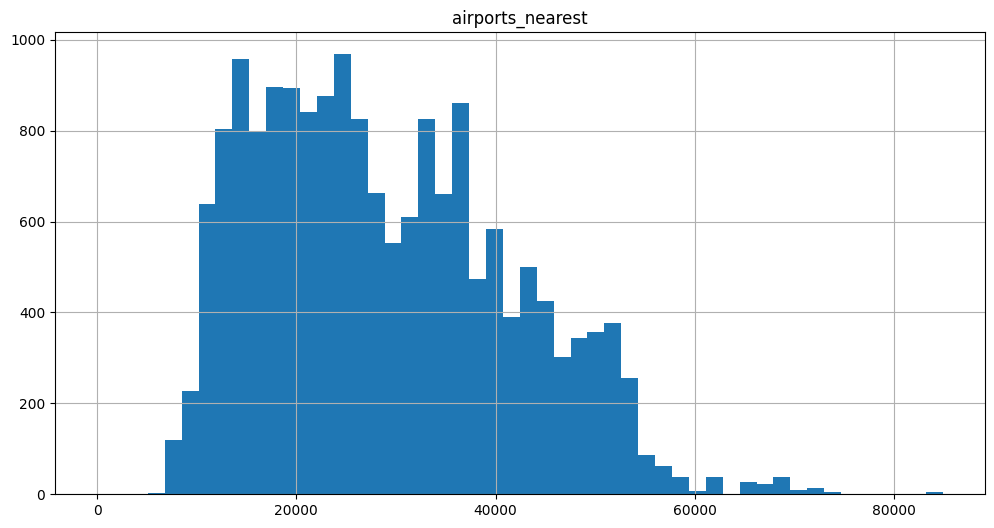

In [190]:
data.hist('airports_nearest', bins=50, figsize=(12,6))

В основном квартиры продаются в домах, расположенных на расстоянии от 11000 до 37000 метров от ближайшего аэропорта. Однако есть пик на 51000 метров. Эта картина адекватно описывает реальное расположение аэропорта вблизи городов. Во-первых, аэропорт должен находиться на адекватном расстоянии от крупного населенного пункта (Санкт-Петербурга). По данным Яндекса, расстояние по прямой от центра Петербурга до аэропорта Пулково - 62 км. Во-вторых, вокруг аэропорта может быть много небольших населенных пунктов, расстояние до которых вполне может быть менее 40 км

#### Изучение столбца parks_nearest

In [191]:
data['parks_nearest'].describe()

count    7707.000000
mean      491.268587
std       341.557590
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

array([[<Axes: title={'center': 'parks_nearest'}>]], dtype=object)

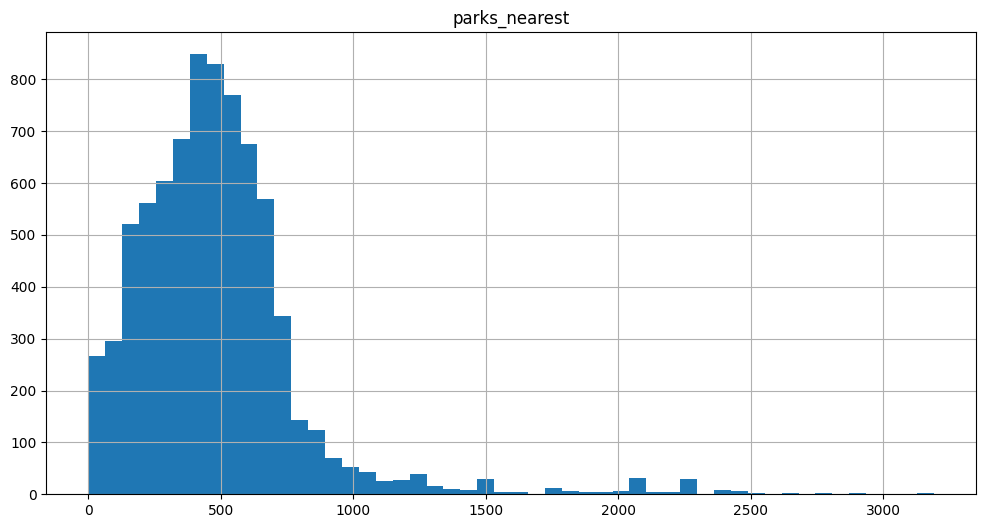

In [192]:
data.hist('parks_nearest', bins=50, figsize=(12,6))

Ближайшие парки, в основном, расположены в пределах 800 метров от дома.

#### Изучение параметров "exposition_day_of_week" и "exposition_month".

array([[<Axes: title={'center': 'exposition_day_of_week'}>]], dtype=object)

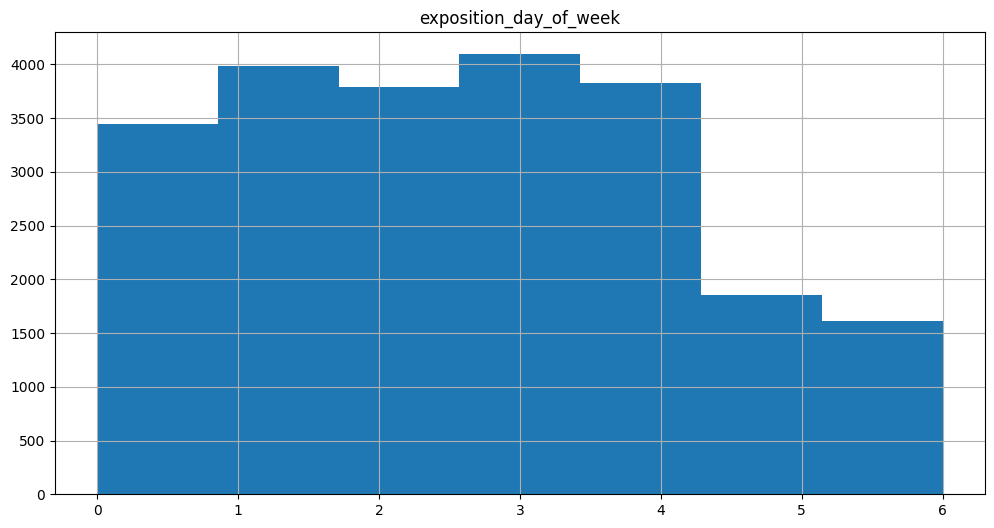

In [193]:
data.hist('exposition_day_of_week', bins=7, figsize=(12,6))

array([[<Axes: title={'center': 'exposition_month'}>]], dtype=object)

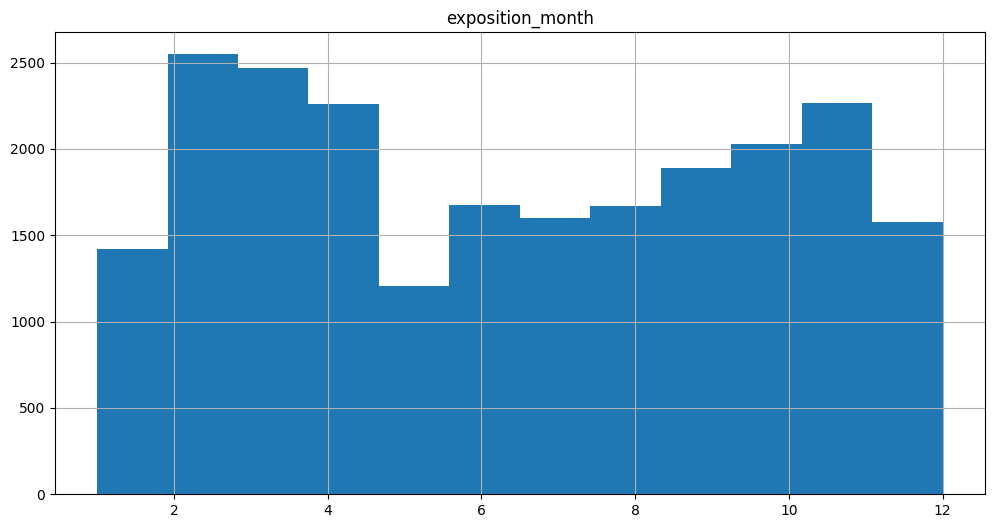

In [194]:
data.hist('exposition_month', bins=12, figsize=(12,6))

В  будние дни размещение обьявлений шло чаще приерно в два раза
В январе, мае и декабре размещались реже, чем в другие месяцы (связано с праздниками?). Пик размещений приходится на февраль. Летом объявления размещаются в среднем одинаково, а в сентябре начинается рост, который достигает пика в ноябре.

In [195]:
#функция, определяющая категорию этажа:
def floors_category(row):
    if row['floor_'] == 1:
        return 'первый'
    elif row['floor_'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#применяем метод apply и функцию floors_category к созданному столбцу floor_group:
data['floor_group'] = data.apply(floors_category, axis=1)  


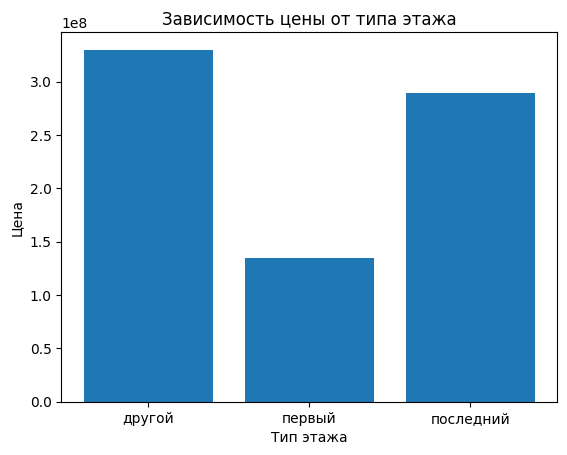

In [196]:
plt.bar(data['floor_group'], data['last_price'])
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.title('Зависимость цены от типа этажа')
plt.show()

### Анализ времени продажи квартиры

In [197]:
# Вывод основных статистических параметров столбца
data['days_exposition'].describe()

count    19547.000000
mean       180.912007
std        219.710047
min          1.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<Axes: >

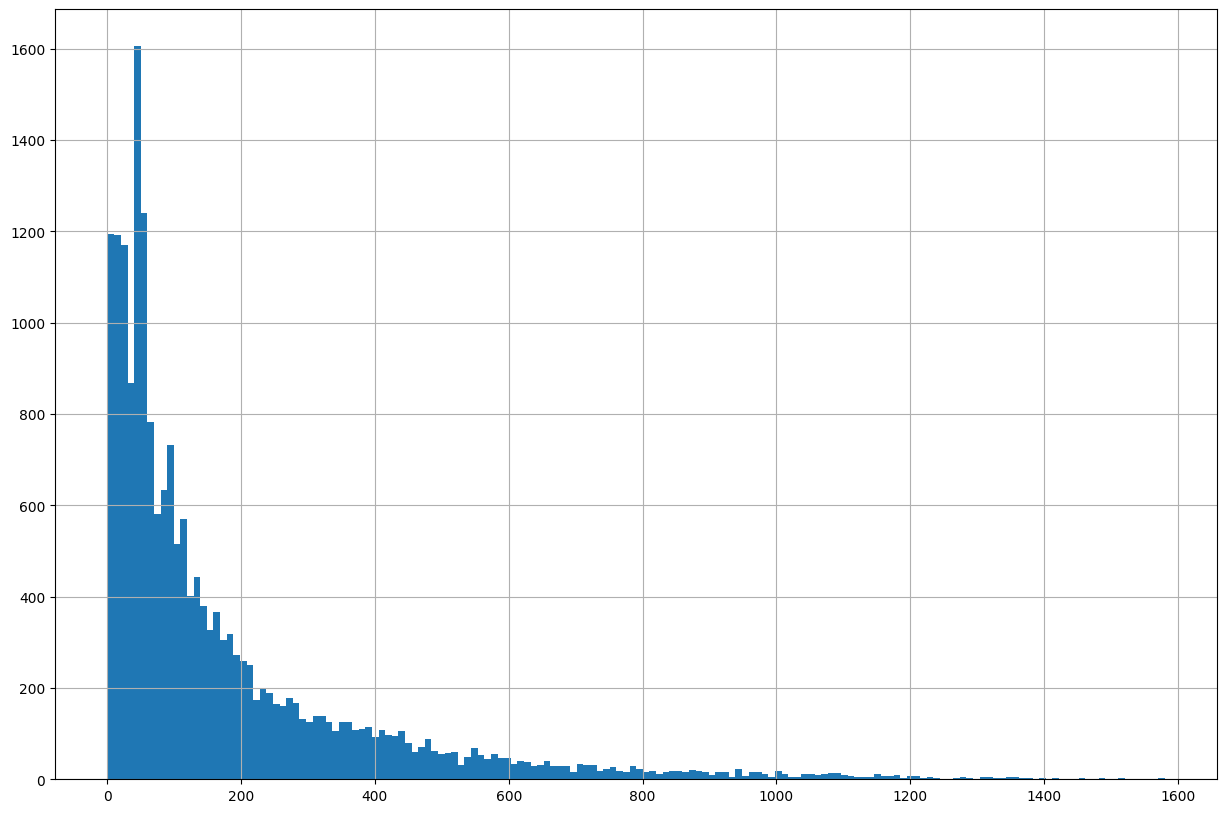

In [198]:
# Вывод гистограммы столбца
data['days_exposition'].hist(bins=160, figsize=(15, 10))

<Axes: >

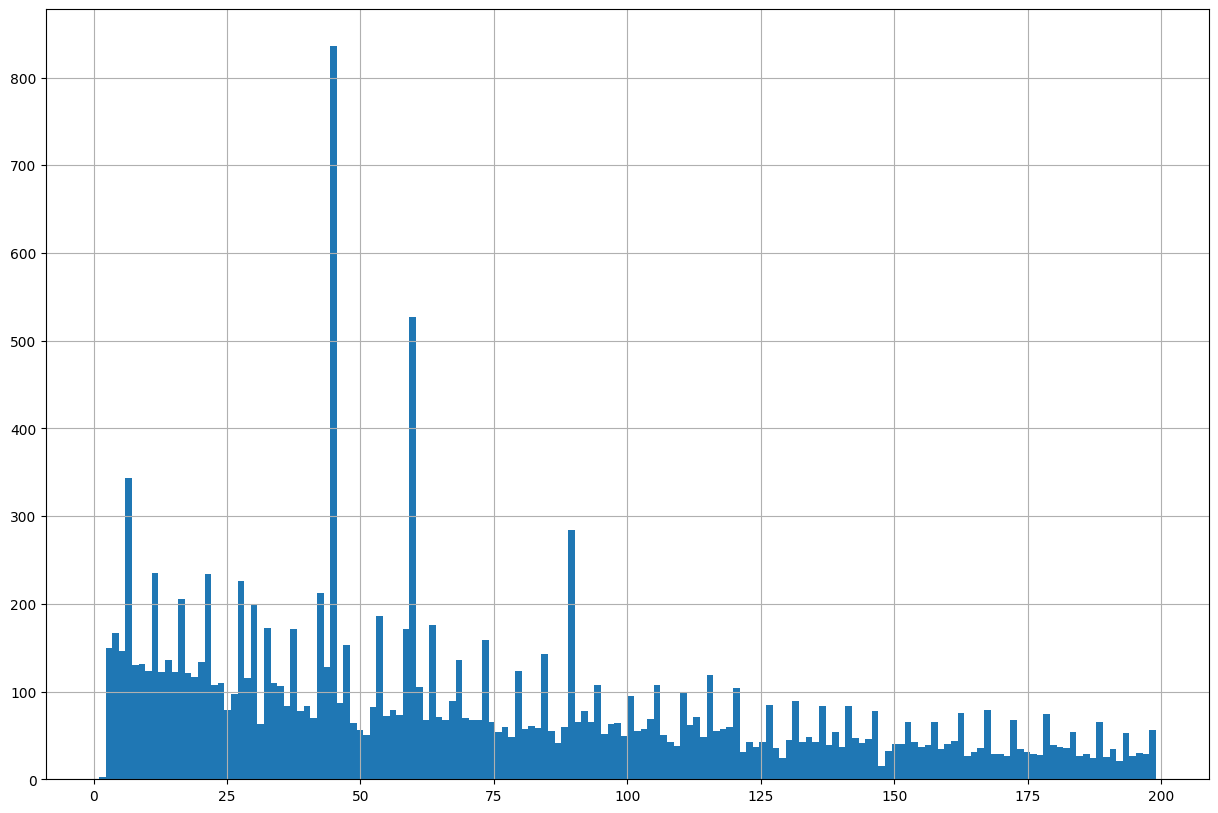

In [199]:
# Вывод гистограммы основной части данных столбца
data.query('days_exposition < 200')['days_exposition'].hist(bins=160, figsize=(15, 10))

<Axes: >

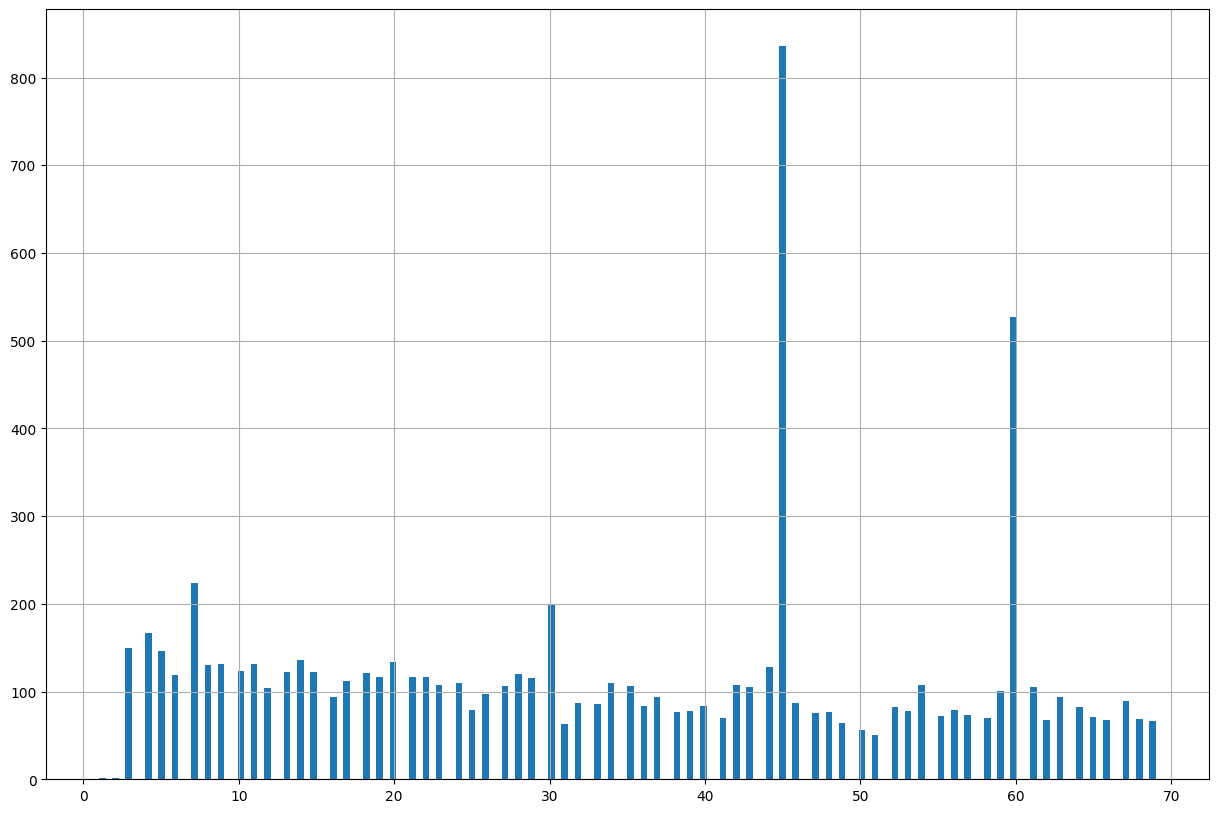

In [200]:
# Вывод гистограммы для подробного исследования всплесков
data.query('days_exposition < 70')['days_exposition'].hist(bins=160, figsize=(15, 10))

In [201]:
# Вывод среднего и медианы
print('Среднее - {:.1f}'.format(data['days_exposition'].mean()))
print('Медиана - {:.0f}'.format(data['days_exposition'].median()))

Среднее - 180.9
Медиана - 96


<Axes: >

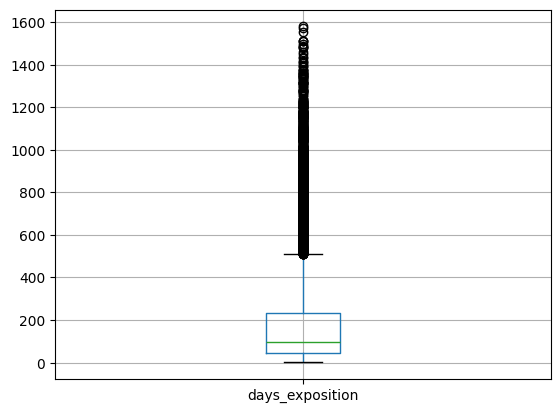

In [202]:
# Вывод диаграммы размаха столбца
data.boxplot(column='days_exposition')

Продажа в среднем занимает 3 месяца, если квартира продалась быстрее,это можно считать быстрой продажей, нелобычно долгая продажа более трёх месяцев

# Удаление редких и выбивающихся значений

In [203]:
# Функция для получения столбца без аномалий (outliers)
# column_name - (String) Название столбца
# возвращает - (DataFrame) Датафрейм с удаленными аномалиями
def delete_outliers(column_name):
    iqr = 1.5 * (data[column_name].quantile(.75) - data[column_name].quantile(.25))

    maximum = data[column_name].quantile(.75) + iqr
    minimum = data[column_name].quantile(.25) - iqr

    return data[(minimum <= data[column_name]) & (data[column_name] <= maximum)][column_name]

In [204]:
def count_outliers(column_name):
    iqr = 1.5 * (data[column_name].quantile(.75) - data[column_name].quantile(.25))

    maximum = data[column_name].quantile(.75) + iqr
    print('Максимум -', maximum)

    minimum = data[column_name].quantile(.25) - iqr
    print('Минимум -', minimum)

    outliers = len(data.query(column_name + ' < @minimum or ' + column_name + ' > @maximum'))

    print('Количество аутлаеров - {} ({:.2%})'.format(outliers, outliers / len(data.query('~' + column_name + '.isnull()'))))

#### Столбец total_images

In [205]:
# Вывод основных статистических параметров столбца
data['total_images'].describe()

count    22605.000000
mean         9.909356
std          5.674452
min          0.000000
25%          6.000000
50%         10.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

<Axes: >

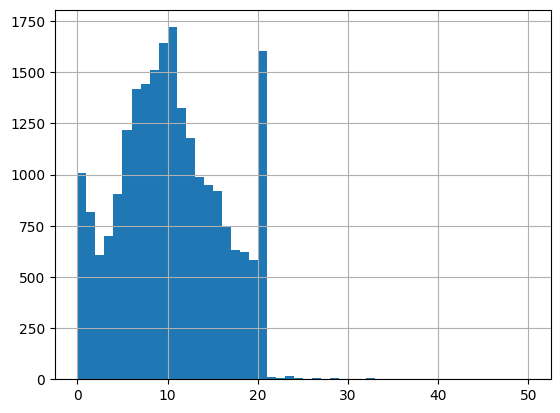

In [206]:
# Визуальная оценка распределения данных
data['total_images'].hist(bins=50)

<Axes: >

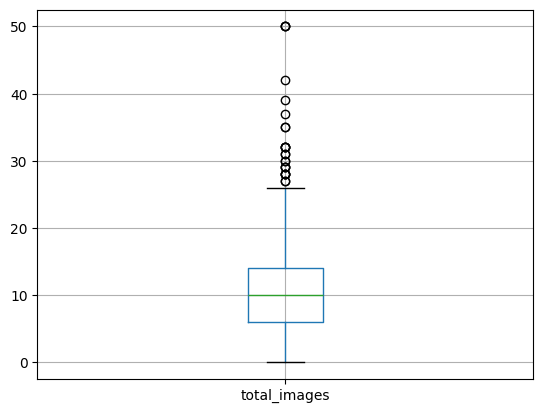

In [207]:
# Визуальная проверка наличия аномалий
data.boxplot(column='total_images')

In [208]:
# Оценка количества аутлаеров
count_outliers('total_images')

Максимум - 26.0
Минимум - -6.0
Количество аутлаеров - 25 (0.11%)


In [209]:
delete_outliers('total_images')

0        20
1         7
2        10
3         0
4         2
         ..
22601     9
22602     9
22603    14
22604    18
22605    13
Name: total_images, Length: 22580, dtype: int64

#### Столбец last_price

In [210]:
# Вывод основных статистических параметров столбца
data['last_price'].describe()

count    2.260500e+04
mean     6.103472e+06
std      6.299019e+06
min      4.300000e+05
25%      3.500000e+06
50%      4.680000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

<Axes: >

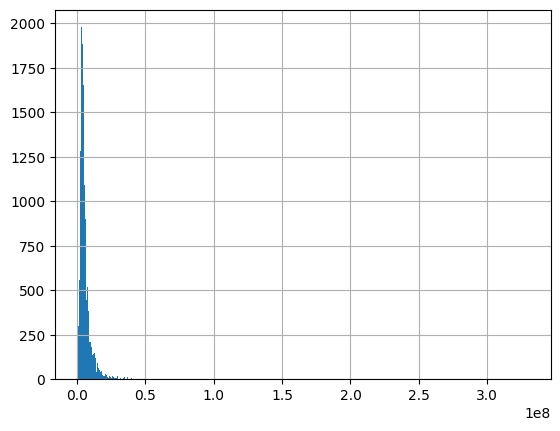

In [211]:
# Визуальная оценка распределения данных
data['last_price'].hist(bins=800)

<Axes: >

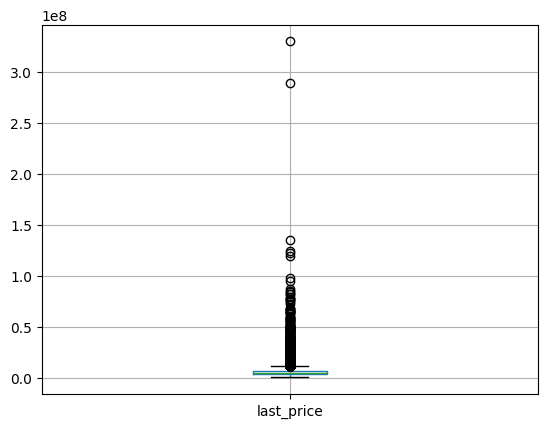

In [212]:
# Визуальная проверка наличия аномалий
data.boxplot(column='last_price')

In [213]:
# Оценка количества аутлаеров
count_outliers('last_price')

Максимум - 11625000.0
Минимум - -1375000.0
Количество аутлаеров - 1865 (8.25%)


#### Столбец total_area

In [214]:
# Вывод основных статистических параметров столбца
data['total_area'].describe()

count    22605.000000
mean        58.951946
std         26.361981
min         28.000000
25%         41.000000
50%         52.500000
75%         69.700000
max        200.000000
Name: total_area, dtype: float64

<Axes: >

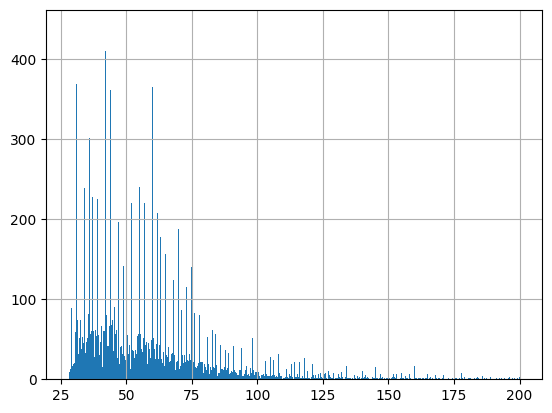

In [215]:
# Визуальная оценка распределения данных
data['total_area'].hist(bins=900)

<Axes: >

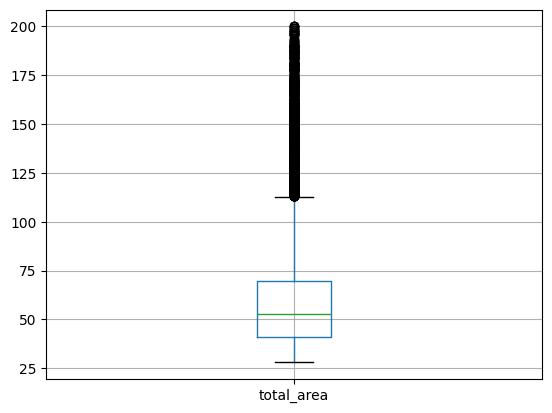

In [216]:
# Визуальная проверка наличия аномалий
data.boxplot(column='total_area')

In [217]:
# Оценка количества аутлаеров
count_outliers('total_area')

Максимум - 112.75
Минимум - -2.0500000000000043
Количество аутлаеров - 1069 (4.73%)


#### Столбец rooms

In [218]:
# Вывод основных статистических параметров столбца
data['rooms'].describe()

count    22605.000000
mean         2.070914
std          0.980687
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

<Axes: >

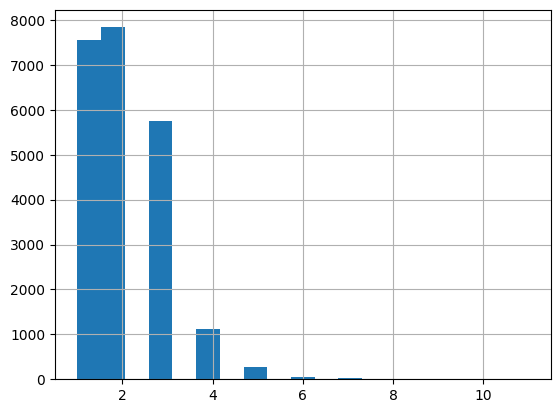

In [219]:
# Визуальная оценка распределения данных
data['rooms'].hist(bins=19)

<Axes: >

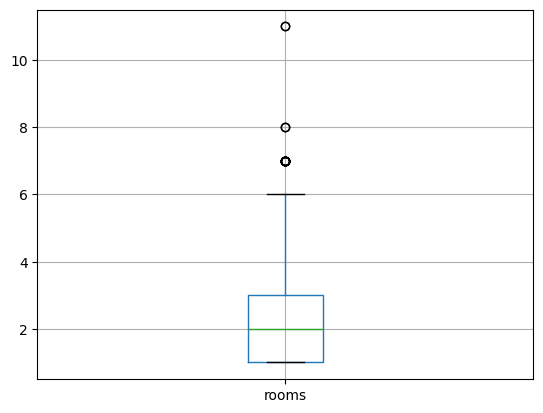

In [220]:
# Визуальная проверка наличия аномалий
data.boxplot(column='rooms')

In [221]:
# Оценка количества аутлаеров
count_outliers('rooms')

Максимум - 6.0
Минимум - -2.0
Количество аутлаеров - 23 (0.10%)


<Axes: >

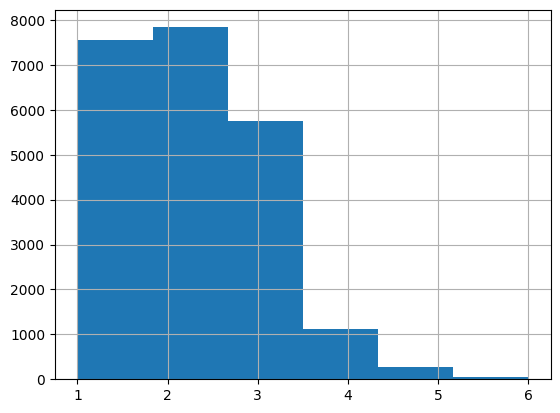

In [222]:
# Удаление аутлаеров
data['rooms'] = delete_outliers('rooms')

# Проверка результатов удаления
data['rooms'].hist(bins=6)

#### Столбец ceiling_height

In [223]:
# Вывод основных статистических параметров столбца
data['ceiling_height'].describe()

count    19102.000000
mean         2.716133
std          0.251508
min          2.500000
25%          2.540000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

<Axes: >

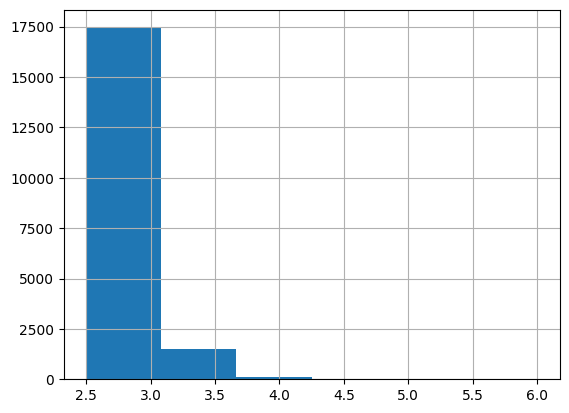

In [224]:
# Визуальная оценка распределения данных
data['ceiling_height'].hist(bins=6)

<Axes: >

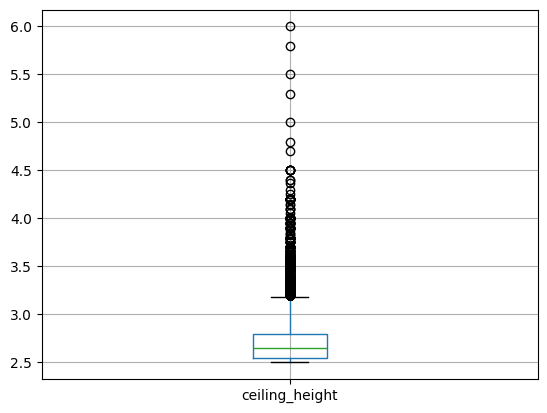

In [225]:
# Визуальная проверка наличия аномалий
data.boxplot(column='ceiling_height')

In [226]:
# Оценка количества аутлаеров
count_outliers('ceiling_height')

Максимум - 3.1899999999999995
Минимум - 2.1500000000000004
Количество аутлаеров - 1157 (6.06%)


#### Столбец floors_total

In [227]:
# Вывод основных статистических параметров столбца
data['floors_total'].describe()

count    22605.000000
mean        10.617297
std          6.535395
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

<Axes: >

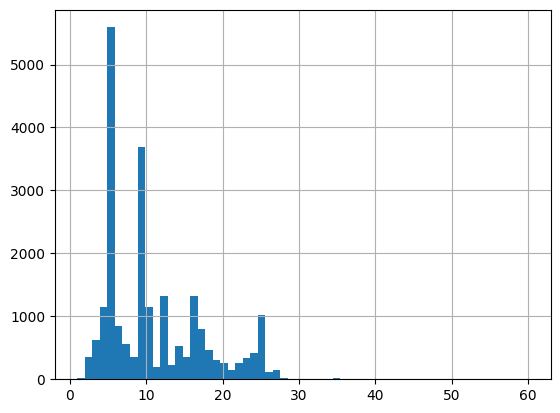

In [228]:
# Визуальная оценка распределения данных
data['floors_total'].hist(bins=60)

<Axes: >

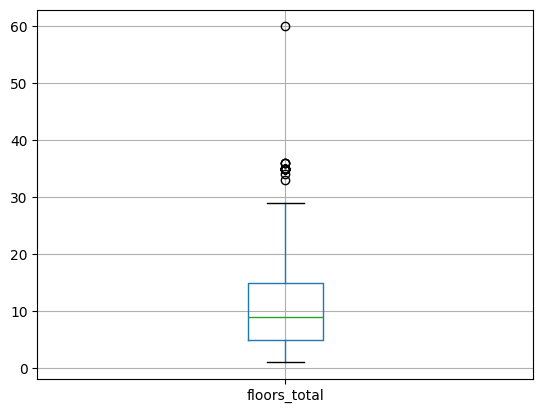

In [229]:
# Визуальная проверка наличия аномалий
data.boxplot(column='floors_total')

In [230]:
# Оценка количества аутлаеров
count_outliers('floors_total')

Максимум - 30.0
Минимум - -10.0
Количество аутлаеров - 28 (0.12%)


<Axes: >

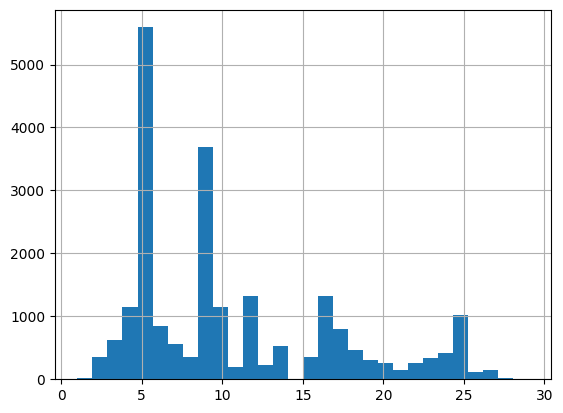

In [231]:
# Удаление аутлаеров
data['floors_total'] = delete_outliers('floors_total')

# Проверка результатов удаления
data['floors_total'].hist(bins=30)

#### Столбец living_area

In [232]:
# Вывод основных статистических параметров столбца
data['living_area'].describe()

count    22605.000000
mean        33.806906
std         17.314290
min         14.000000
25%         19.000000
50%         30.100000
75%         42.300000
max        164.700000
Name: living_area, dtype: float64

<Axes: >

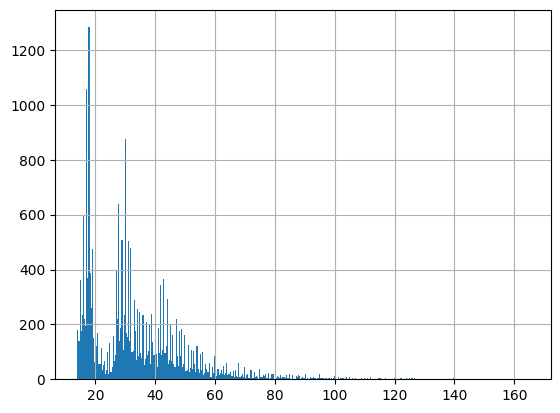

In [233]:
# Визуальная оценка распределения данных
data['living_area'].hist(bins=409)

<Axes: >

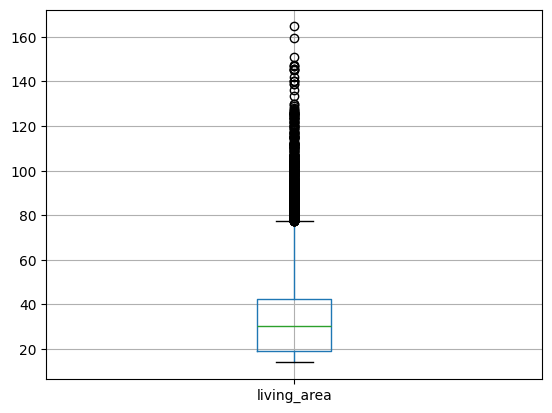

In [234]:
# Визуальная проверка наличия аномалий
data.boxplot(column='living_area')

In [235]:
# Оценка количества аутлаеров
count_outliers('living_area')

Максимум - 77.25
Минимум - -15.949999999999996
Количество аутлаеров - 644 (2.85%)


#### Столбец kitchen_area


In [236]:
# Вывод основных статистических параметров столбца
data['kitchen_area'].describe()

count    21917.000000
mean        10.311388
std          5.257956
min          1.300000
25%          7.000000
50%          9.000000
75%         11.700000
max         93.200000
Name: kitchen_area, dtype: float64

<Axes: >

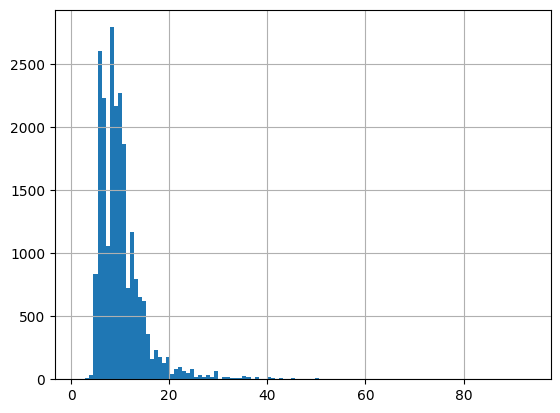

In [237]:
# Визуальная оценка распределения данных
data['kitchen_area'].hist(bins=112)

<Axes: >

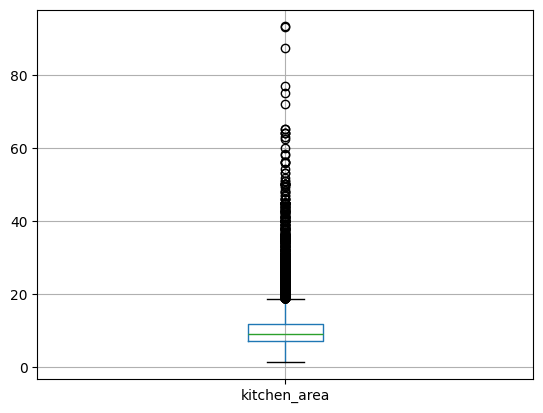

In [238]:
# Визуальная проверка наличия аномалий
data.boxplot(column='kitchen_area')

In [239]:
# Оценка количества аутлаеров
count_outliers('kitchen_area')

Максимум - 18.75
Минимум - -0.049999999999998934
Количество аутлаеров - 1144 (5.22%)


#### Столбец balcony

In [240]:
# Вывод основных статистических параметров столбца
data['balcony'].describe()

count    22605.000000
mean         0.595842
std          0.963582
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

<Axes: >

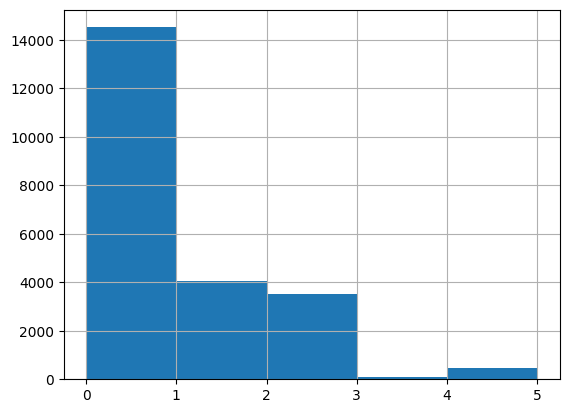

In [241]:
# Визуальная оценка распределения данных
data['balcony'].hist(bins=5)

<Axes: >

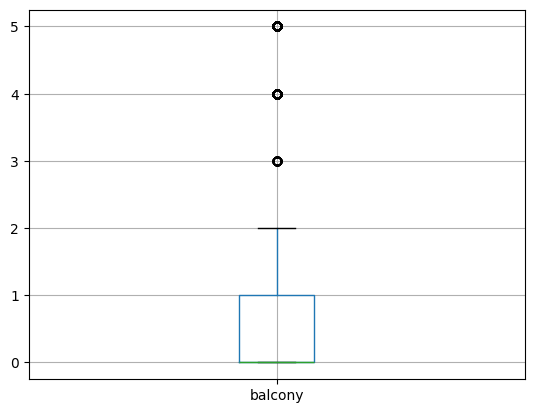

In [242]:
# Визуальная проверка наличия аномалий
data.boxplot(column='balcony')

In [243]:
# Оценка количества аутлаеров
count_outliers('balcony')

Максимум - 2.5
Минимум - -1.5
Количество аутлаеров - 552 (2.44%)


#### Столбец airports_nearest

In [244]:
# Вывод основных статистических параметров столбца
data['airports_nearest'].describe()

count    17378.000000
mean     28854.626395
std      12650.687759
min          0.000000
25%      18539.000000
50%      26882.500000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<Axes: >

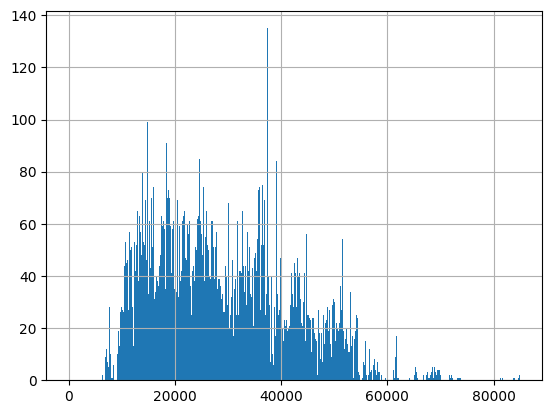

In [245]:
# Визуальная оценка распределения данных
data['airports_nearest'].hist(bins=800)

<Axes: >

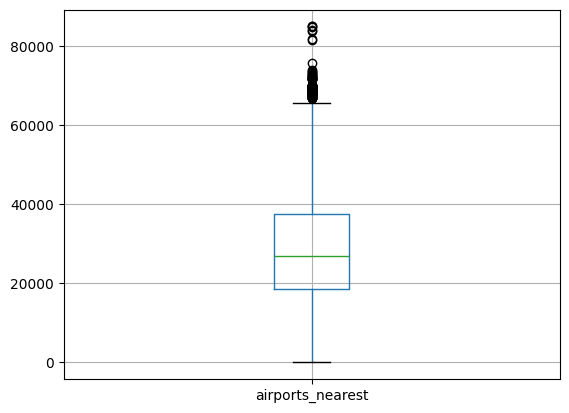

In [246]:
# Визуальная проверка наличия аномалий
data.boxplot(column='airports_nearest')

In [247]:
# Оценка количества аутлаеров
count_outliers('airports_nearest')

Максимум - 65709.0
Минимум - -9763.0
Количество аутлаеров - 95 (0.55%)


<Axes: >

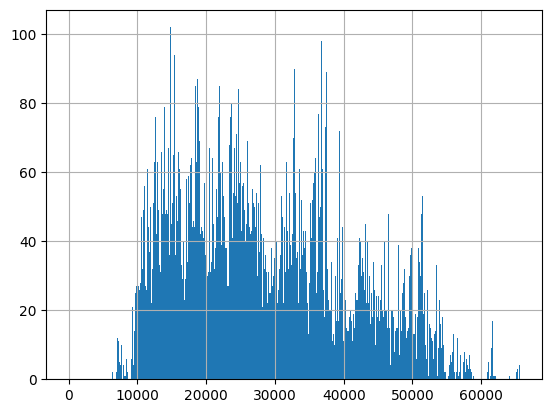

In [248]:
# Удаление аутлаеров
data['airports_nearest'] = delete_outliers('airports_nearest')

# Проверка результатов удаления
data.query('airports_nearest != -1')['airports_nearest'].hist(bins=650)

#### Столбец city_сenters_nearest

In [249]:
# Вывод основных статистических параметров столбца
data['city_сenters_nearest'].describe()

count    17392.000000
mean     14274.404841
std       8609.137835
min        181.000000
25%       9425.000000
50%      13145.000000
75%      16293.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

<Axes: >

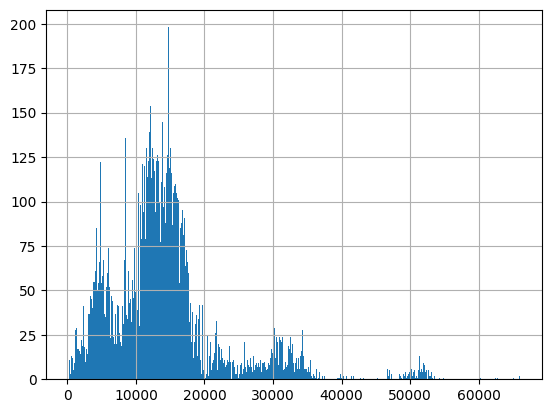

In [250]:
# Визуальная оценка распределения данных
data['city_сenters_nearest'].hist(bins=800)

<Axes: >

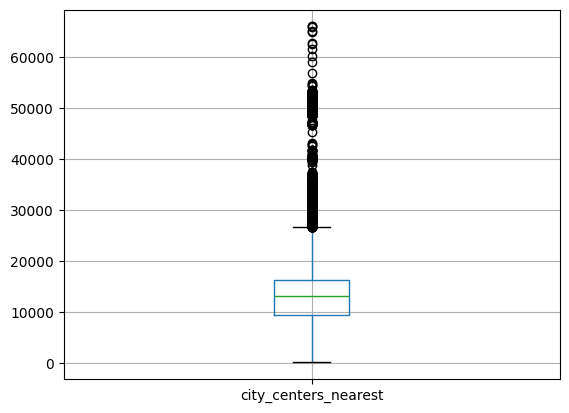

In [251]:
# Визуальная проверка наличия аномалий
data.boxplot(column='city_сenters_nearest')

In [252]:
# Оценка количества аутлаеров
count_outliers('city_сenters_nearest')

Максимум - 26595.0
Минимум - -877.0
Количество аутлаеров - 1715 (9.86%)


#### Столбец days_exposition

In [253]:
# Вывод основных статистических параметров столбца
data['days_exposition'].describe()

count    19547.000000
mean       180.912007
std        219.710047
min          1.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<Axes: >

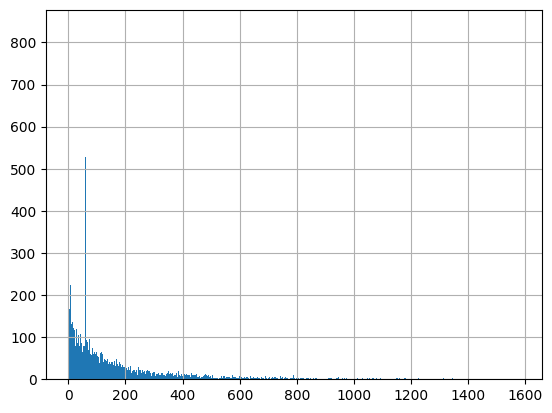

In [254]:
# Визуальная оценка распределения данных
data['days_exposition'].hist(bins=1580)

<Axes: >

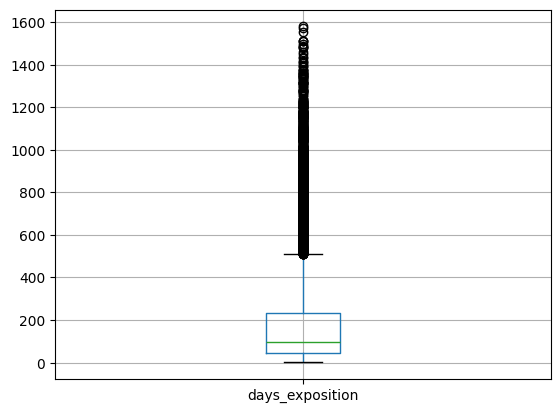

In [255]:
# Визуальная проверка наличия аномалий
data.query('days_exposition != -1').boxplot(column='days_exposition')

In [258]:
# Оценка количества аутлаеров
count_outliers('days_exposition')

Максимум - 510.0
Минимум - -234.0
Количество аутлаеров - 1598 (8.18%)


<Axes: xlabel='days_exposition', ylabel='exposition_year'>

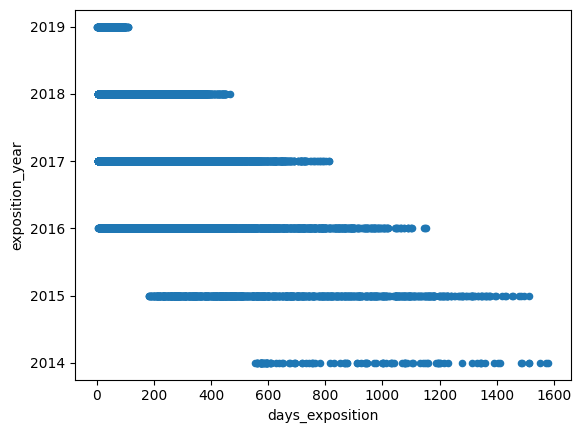

In [259]:
# Оценка степени корреляции длительности размешения объявления и года выставления объявления
data.plot(x='days_exposition', y='exposition_year', kind='scatter')

<Axes: xlabel='days_exposition', ylabel='first_day_exposition'>

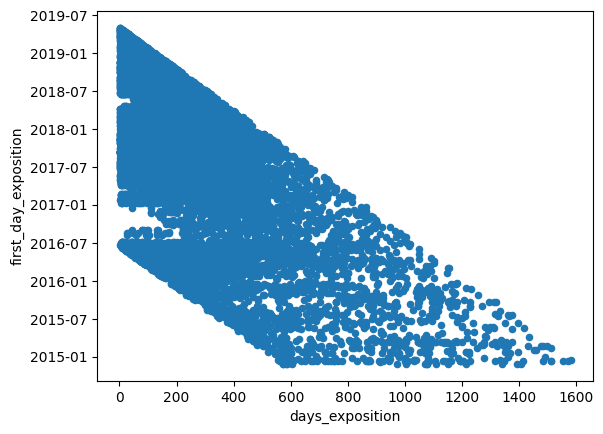

In [260]:
# Оценка степени корреляции длительности размешения объявления и даты выставления объявления
data.plot(x='days_exposition', y='first_day_exposition', kind='scatter')

#### Столбец m2_price

In [261]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clean_locality_name,clean_locality_type,clean_locality_type_number,clean_locality_name_number,m2_price,exposition_day_of_week,exposition_month,exposition_year,floor_type,living_total_area_ratio,kitchen_total_area_ratio,floor_group
0,20,13000000,108.0,2019-03-07,3.0,2.7,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,undefined,0,0,120370.37037,3,3,2019,другой,0.472222,0.231481,другой


In [262]:
# Вывод основных статистических параметров столбца
data['m2_price'].describe()

count    2.260500e+04
mean     9.817956e+04
std      4.584419e+04
min      7.962963e+03
25%      7.619048e+04
50%      9.459459e+04
75%      1.135593e+05
max      1.736842e+06
Name: m2_price, dtype: float64

<Axes: >

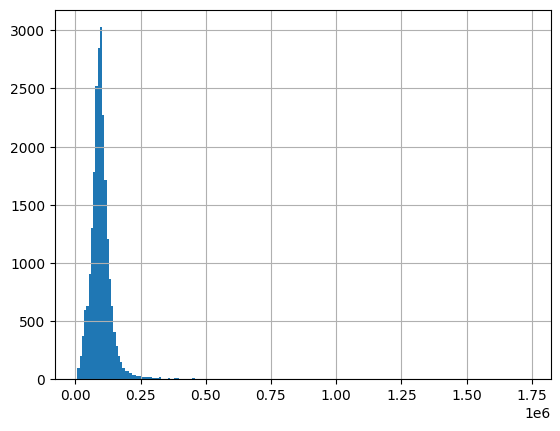

In [263]:
# Визуальная оценка распределения данных
data['m2_price'].hist(bins=200)

<Axes: >

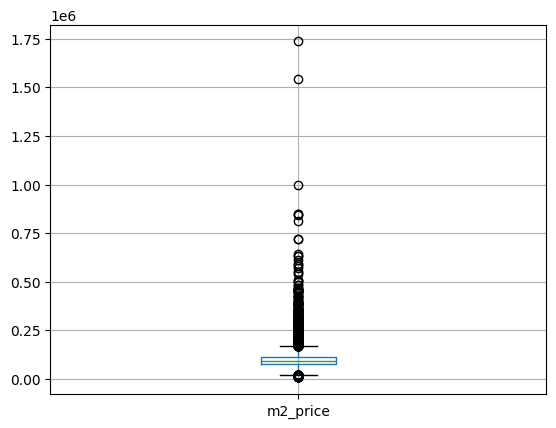

In [264]:
# Визуальная проверка наличия аномалий
data.boxplot(column='m2_price')

In [265]:
# Оценка количества аутлаеров
count_outliers('m2_price')

Максимум - 169612.5907990315
Минимум - 20137.207425342996
Количество аутлаеров - 990 (4.38%)


#### Столбец living_total_area_ratio

In [266]:
# Вывод основных статистических параметров столбца
data['living_total_area_ratio'].describe()

count    22605.000000
mean         0.565142
std          0.099542
min          0.162860
25%          0.498507
50%          0.566667
75%          0.635135
max          0.983447
Name: living_total_area_ratio, dtype: float64

<Axes: >

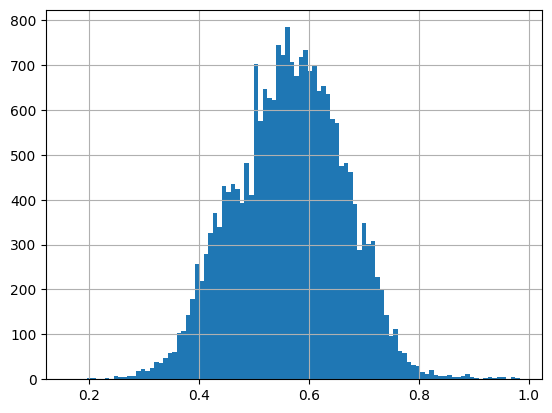

In [267]:
# Визуальная оценка распределения данных
data['living_total_area_ratio'].hist(bins=100)

<Axes: >

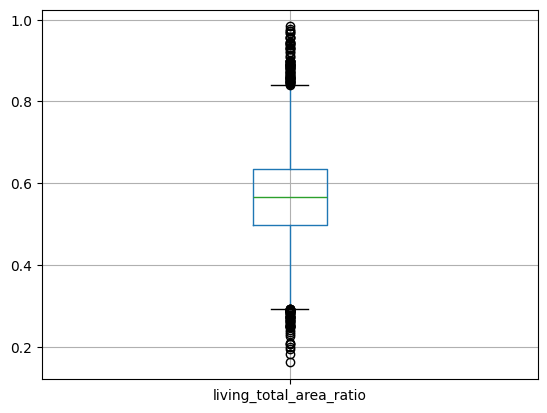

In [268]:
# Визуальная проверка наличия аномалий
data.boxplot(column='living_total_area_ratio')

In [269]:
# Оценка количества аутлаеров
count_outliers('living_total_area_ratio')

Максимум - 0.840076643807987
Минимум - 0.2935659540137152
Количество аутлаеров - 142 (0.63%)


#### Столбец kitchen_total_area_ratio

In [270]:
# Вывод основных статистических параметров столбца
data['kitchen_total_area_ratio'].describe()

count    21917.000000
mean         0.185833
std          0.068693
min          0.025381
25%          0.134146
50%          0.171875
75%          0.229947
max          0.787879
Name: kitchen_total_area_ratio, dtype: float64

<Axes: >

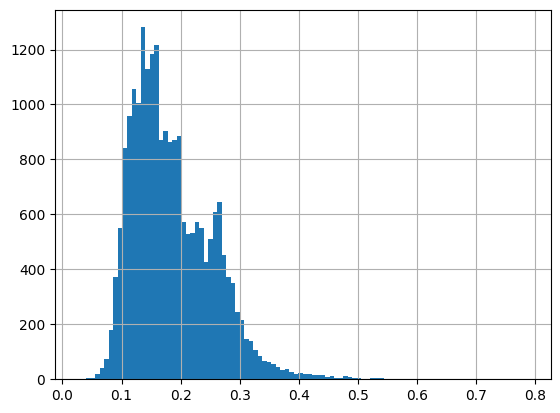

In [271]:
# Визуальная оценка распределения данных
data['kitchen_total_area_ratio'].hist(bins=100)

<Axes: >

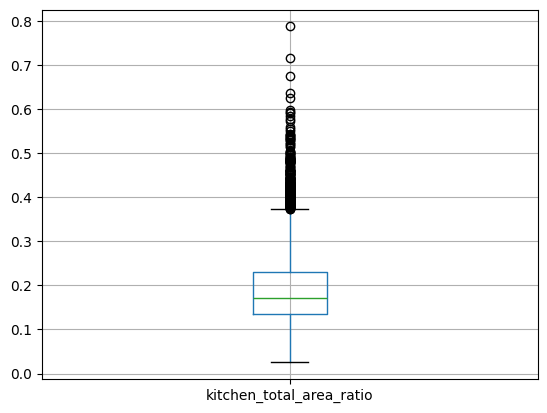

In [272]:
# Визуальная проверка наличия аномалий
data.boxplot(column='kitchen_total_area_ratio')

In [273]:
# Оценка количества аутлаеров
count_outliers('kitchen_total_area_ratio')

Максимум - 0.37364679796530587
Минимум - -0.00955393243772007
Количество аутлаеров - 291 (1.33%)


# Исследование цены квартир

In [274]:
# компактная табличка )
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_', 'exposition_day_of_week', 'exposition_month', 'exposition_year' ]].corr()

,last_price,total_area,living_area,kitchen_area,rooms,floor_,exposition_day_of_week,exposition_month,exposition_year
last_price,1.000000,0.657486,0.548356,0.527110,0.370063,0.048686,-0.014018,0.001493,-0.035042
total_area,0.657486,1.000000,0.927371,0.576573,0.780376,-0.012019,-0.017057,0.008080,-0.082549
living_area,0.548356,0.927371,1.000000,0.340938,0.873499,-0.099648,-0.013395,0.001128,-0.070593
kitchen_area,0.527110,0.576573,0.340938,1.000000,0.200204,0.151698,-0.013824,0.004853,-0.052613
rooms,0.370063,0.780376,0.873499,0.200204,1.000000,-0.147726,-0.007437,-0.001212,-0.048553
floor_,0.048686,-0.012019,-0.099648,0.151698,-0.147726,1.000000,0.012167,0.020218,0.005155
exposition_day_of_week,-0.014018,-0.017057,-0.013395,-0.013824,-0.007437,0.012167,1.000000,0.011741,-0.001455
exposition_month,0.001493,0.008080,0.001128,0.004853,-0.001212,0.020218,0.011741,1.000000,-0.274731
exposition_year,-0.035042,-0.082549,-0.070593,-0.052613,-0.048553,0.005155,-0.001455,-0.274731,1.000000


#### корреляция цена/общая площадь, цена/жилая площадь, цена/площадь кухни

<Axes: xlabel='total_area', ylabel='last_price'>

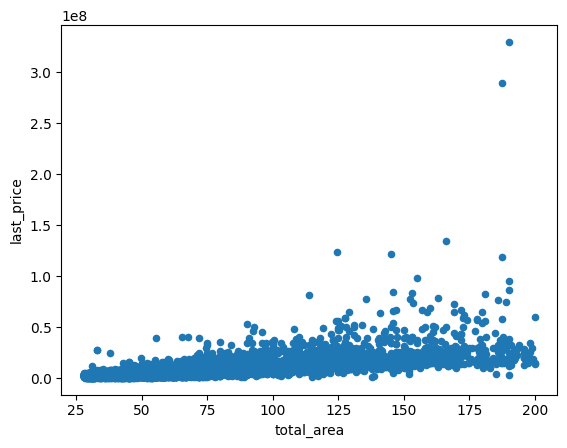

In [275]:
# Оценка корреляции цены квартиры с ее общей площадью
data.plot(x='total_area', y='last_price', kind='scatter')

<Axes: xlabel='living_area', ylabel='last_price'>

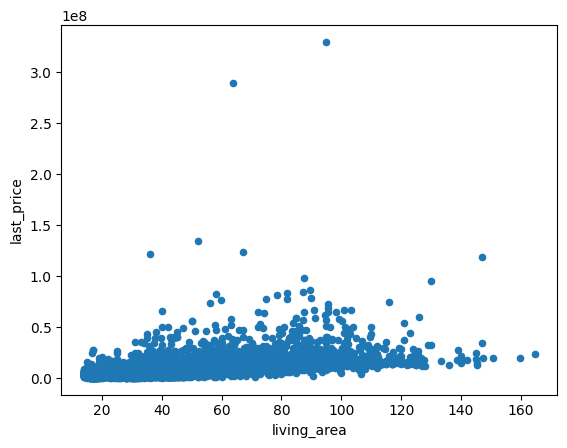

In [276]:
data.plot(x='living_area', y='last_price', kind='scatter')

<Axes: xlabel='kitchen_area', ylabel='last_price'>

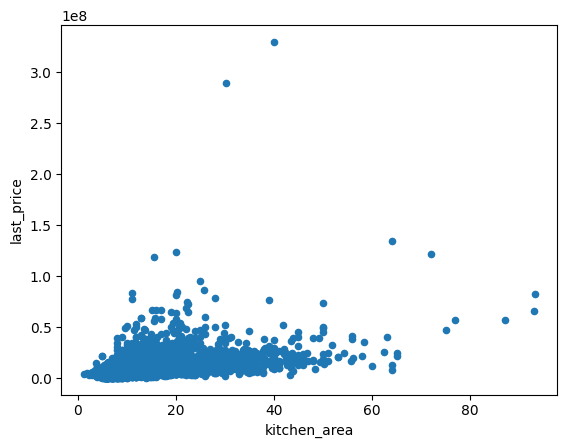

In [277]:
data.plot(x='kitchen_area', y='last_price', kind='scatter')

Цены растут с ростом метража квартир, как их общей площади, так и отдельно взятых площадей жилой и кухонной

#### корреляция цена/количество комнат

<Axes: xlabel='rooms', ylabel='last_price'>

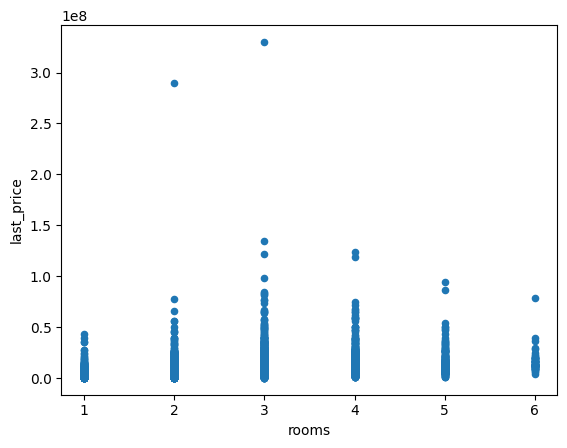

In [278]:
# Оценка корреляции цены квартиры с количеством комнат в ней
data.plot(x='rooms', y='last_price', kind='scatter')

#### корреляция цена/тип этажа

<Axes: xlabel='floor_type', ylabel='last_price'>

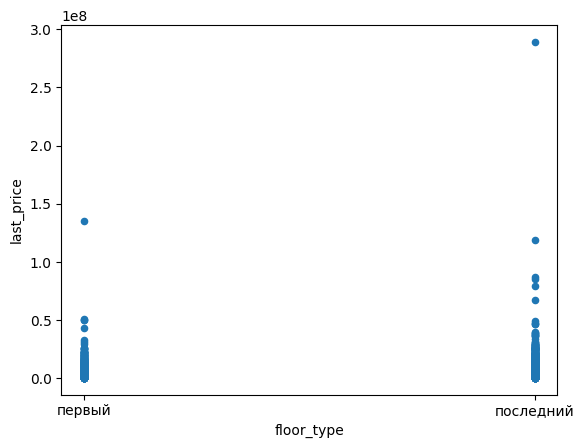

In [279]:
# Оценка корреляции цены квартиры с типом ее этажа (первый или последний)
data.query('floor_type != "другой"').plot(x='floor_type', y='last_price', kind='scatter')

In [280]:
# Определение уникальных типов этажей
unique_types = list(data['floor_type'].unique())

# Функция для получения цифрового представления типа этажа
# type - (string) Тип этажа
# возвращает - (string) Цифровое представления типа этажа
def get_floot_type_number(type):
    return unique_types.index(type)

In [281]:
# Создание столбца с цифровым представлением типа этажа
data['floor_type_number'] = data['floor_type'].apply(get_floot_type_number)

# Проверка результатов создания
data.groupby('floor_type')['floor_type_number'].value_counts()

floor_type  floor_type_number
другой      0                    16658
первый      1                     2771
последний   2                     3176
Name: count, dtype: int64

<Axes: xlabel='floor_type_number', ylabel='last_price'>

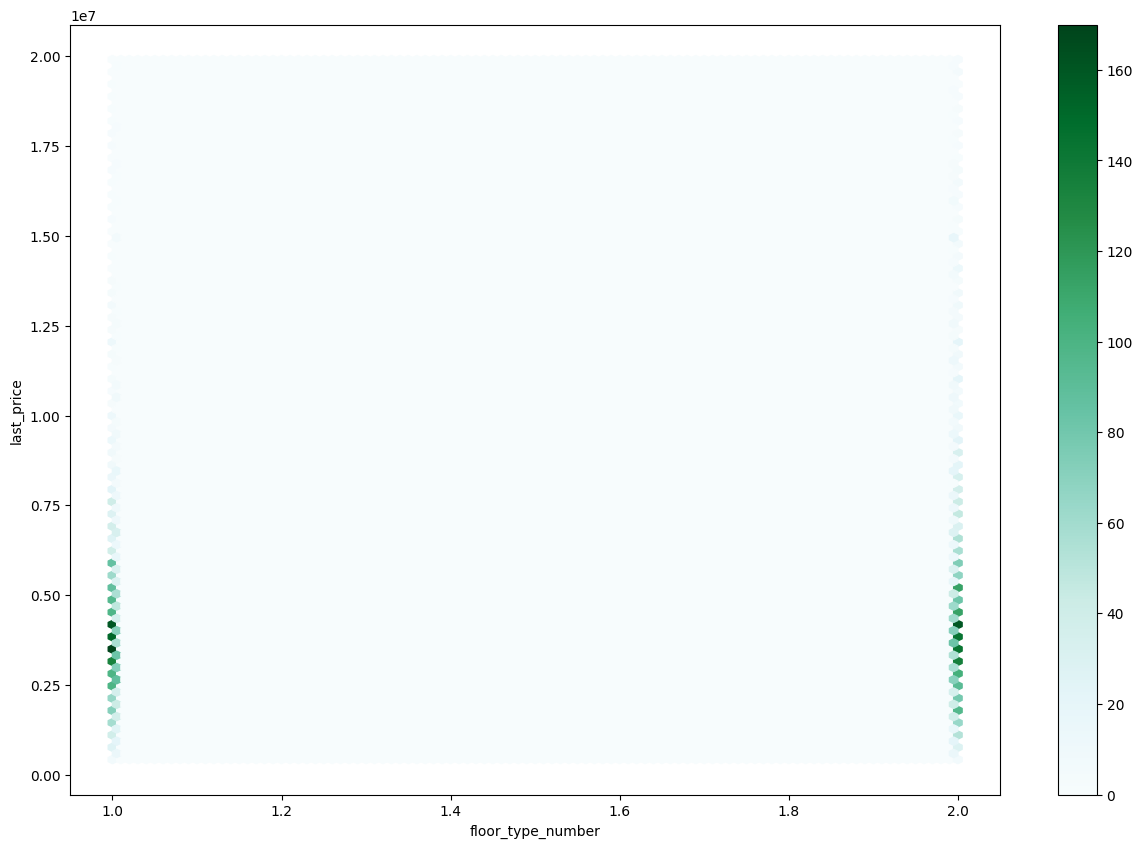

In [282]:
# Оценка распределения цены квартиры для двух типов этажей
data.query('floor_type_number != 0 and last_price < 0.2e8').plot(x='floor_type_number', y='last_price', kind='hexbin', sharex=False, figsize=(15, 10))

In [283]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clean_locality_name,clean_locality_type,clean_locality_type_number,clean_locality_name_number,m2_price,exposition_day_of_week,exposition_month,exposition_year,floor_type,living_total_area_ratio,kitchen_total_area_ratio,floor_group,floor_type_number
0,20,13000000,108.0,2019-03-07,3.0,2.7,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург,undefined,0,0,120370.37037,3,3,2019,другой,0.472222,0.231481,другой,0


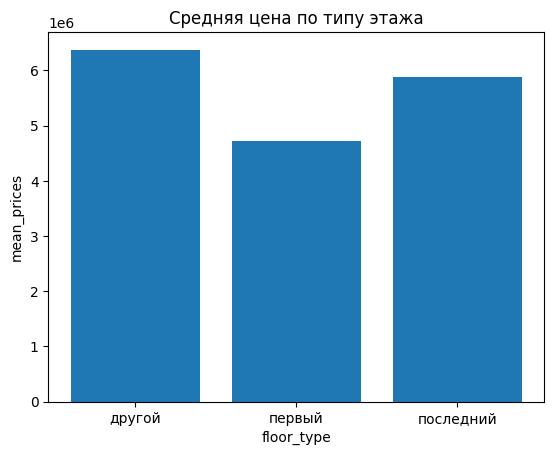

In [284]:
mean_prices = data.groupby('floor_type')['last_price'].mean()
plt.bar(mean_prices.index, mean_prices.values)

plt.xlabel('floor_type')
plt.ylabel('mean_prices')
plt.title('Средняя цена по типу этажа')

plt.show()

На первых этажах цены ниже

#### корреляция цена/удаленность от центра города

<Axes: xlabel='city_сenters_nearest', ylabel='last_price'>

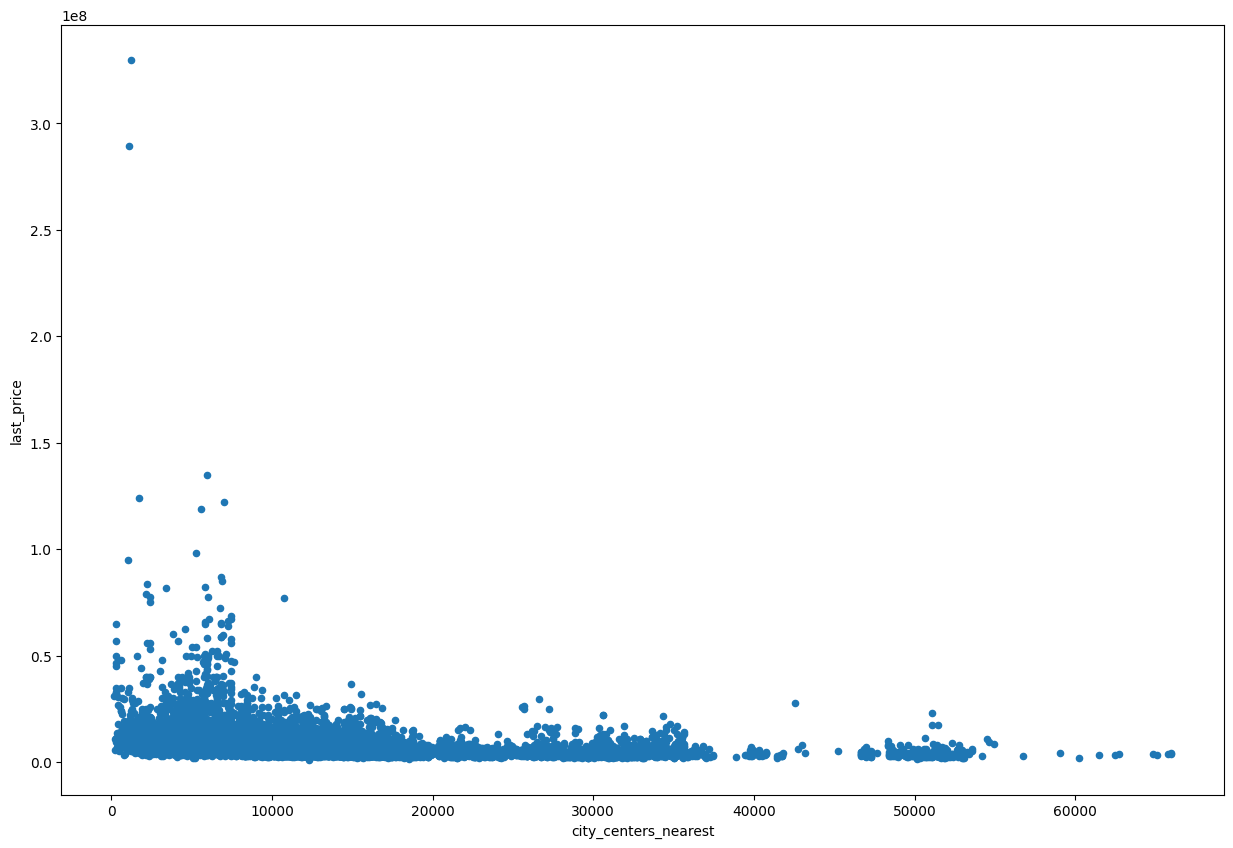

In [285]:
# Оценка корреляции цены квартиры с ее удаленностью от центра
data.plot(x='city_сenters_nearest', y='last_price', kind='scatter', figsize=(15, 10))

#### корреляция цена/день недели публикации объявления

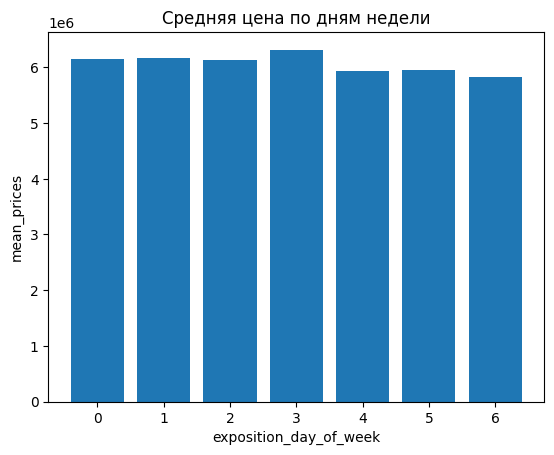

In [286]:
mean_prices = data.groupby('exposition_day_of_week')['last_price'].mean()
plt.bar(mean_prices.index, mean_prices.values)

plt.xlabel('exposition_day_of_week')
plt.ylabel('mean_prices')
plt.title('Средняя цена по дням недели')

plt.show()

#### корреляция цена/месяц публикации

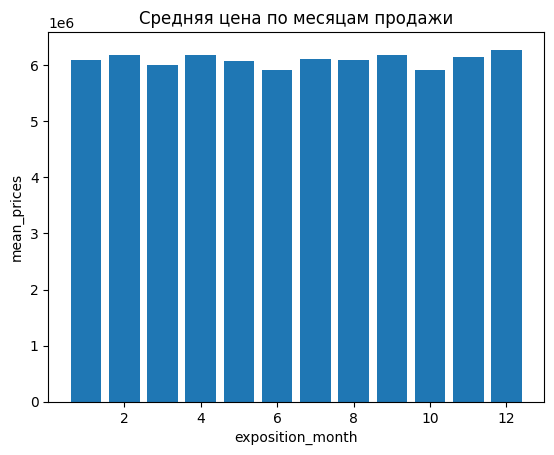

In [287]:
mean_prices = data.groupby('exposition_month')['last_price'].mean()
plt.bar(mean_prices.index, mean_prices.values)

plt.xlabel('exposition_month')
plt.ylabel('mean_prices')
plt.title('Средняя цена по месяцам продажи')

plt.show()

Распределение равномерное, стоимость была выше в апреле, сентябре и декабре

#### корреляция цена/год публикации

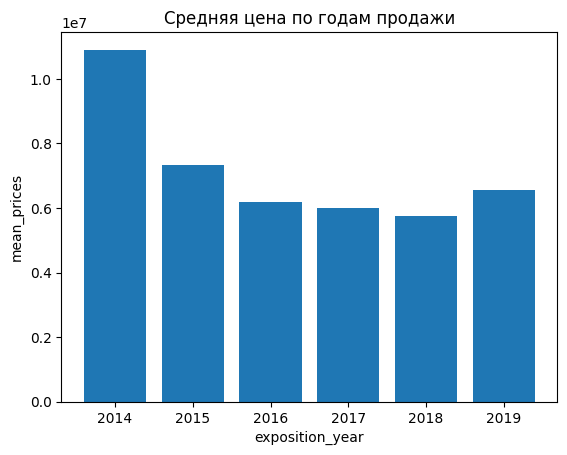

In [288]:
mean_prices = data.groupby('exposition_year')['last_price'].mean()
plt.bar(mean_prices.index, mean_prices.values)

plt.xlabel('exposition_year')
plt.ylabel('mean_prices')
plt.title('Средняя цена по годам продажи')

plt.show()

Средняя цена сначала уменьшалась, далее с 2018 года начала подниматься

In [289]:
#выборка
top_10 = data['locality_name'].value_counts().head(10)

#сбросим индекс, оставив его столбцом, переименуем столбцы (заранее обозначим столбец, где будет среднее значение 1 кв.м.)
top_10 = top_10.reset_index().rename(columns = {'locality_name':'mean','index':'locality_name'})
top_10

,mean,count
0,Санкт-Петербург,15057
1,посёлок Мурино,446
2,посёлок Шушары,418
3,Всеволожск,382
4,Пушкин,358
5,Колпино,332
6,Гатчина,305
7,посёлок Парголово,303
8,деревня Кудрово,266
9,Выборг,229


In [291]:
#список для сохранения значений средней стоимости 1 кв.м.
top_mean = []  

#цикл для расчета средних значений стоимости 1 кв.м. городов в топе и добавления 
#значений в список top_mean :
for name in top_10['locality_name']:
    top_mean.append(round(data.query('locality_name == @name')['m2_price'].mean()))
    
#значения списка top_mean внесем в столбец mean датафрейма top_10
top_10['mean'] = top_mean
display(top_10)

KeyError: 'locality_name'

In [ ]:
#города с макимальной и минимальной стоимостью квартиры за м2
top_10.query('mean == mean.min() or mean == mean.max()')

### Центр города и стоимость километра

In [ ]:
data_center_spb = data.loc[data['locality_name']=='Санкт-Петербург',['last_price', 'city_сenters_nearest']].reset_index(drop=True)
data_center_spb.head(10)

In [ ]:
final_data_spb = data_center_spb.pivot_table(index='city_сenters_nearest', values='last_price', aggfunc='mean')
final_data_spb['last_price_mln'] = final_data_spb['last_price']/1000000
final_data_spb

In [ ]:
final_data_spb['last_price_mln'].plot(grid=True)

стоимость обьекта растет по мере приближения его к центру города

### Выводы (шаг 4)

__Анализ площади, цены, числа комнат и высоты потолков__


Столбцы с общей, жилой и площадью кухни имеют практически Пуассоновское распределение. Это нормально, так как ожидаемо, что будет больше всего квартир с маленькой площадью, а с увеличением площади количество квартир будет уменьшатся. На гистограмме жилой площади отчетливо видны одно- и двухкомнатные квартиры, также можно увидеть трехкомнатные. Но гистограммах столбцов с общей площадью и площадью кухни также прослеживаются эти категории, но значительно мне выраженно.

Анализ цены квартир показал, что цены имеют практически нормальное распределение в области до 100 млн. и некоторый хвост, который растягивается вплоть до 800 млн. Это ожидаемое, так как существует огромный сегмент обычных квартир и небольшой сегмент элитного жилья. Также была обнаружена аномалия с ценой квартиры 12 тыс., которая явно не соответствует рынку. Аномалия была удалена.

Количество комнат имеет практически Пуассоновское распределение. Ожидаемо, что большинство квартир будет иметь от 1 до 3 комнат, а также существование элитного жилья.

Высота потолка имеет распределение, напоминающее Пуассоновское, но с выраженными всплесками в области 2.7 м и 3 м. Скорее всего, это объясняется типовой застройкой.

__Анализ времени продажи квартиры__

Время продажи квартиры имеет практически Пуассоновское распределение. Среднее и медиана равны 157.2 и 74, соответственно. Видно, что их значения очень отличаются. На гистограмме видны всплески около 45, 60 и 90 дней. Возможно, это обусловлено некими ограничениями сервиса, которые снимают объявление через 1.5, 2 или 3 месяца (возможно, в зависимости от тарифа), если его не продлить. Но данную гипотезу необходимо проверять у поставщика данных. Исходя из Пуассоновского распределения данных, достаточно трудно сделать вывод о сроках продажи квартиры, но исходя из диаграммы размах и статистических данных можно утверждать, что:
- в среднем квартиры продаются от 1.5 до 8 месяцев, наиболее часто около 3-4 месяцев;
- если квартиру удалось продать менее чем за 1.5 месяца - это очень хорошо;
- если квартиру не удается продать более года - это необычно долго.

__Удаление редких и выбивающихся значений__

В столбцах __total_images__, __rooms__, __floors_total__ и __airports_nearest__ были обнаружены выбивающиеся за рамки 1.5IRQ (усы диаграммы размаха) значения. Их доля от общего числа составлял менее 1%, поэтому они были удалены. Скорее всего, это аномалии, но, лучше уточнить данную информацию у поставщика данных.

Также подобные значения были обнаружены в столбцах __last_price__, __total_area__, __ceiling_height__, __living_area__, __kitchen_area__, __balcony__, __city_center_nearest__, __days_exposition__, __m2_price__, __living_total_area_ratio__ и __kitchen_total_area_ratio__. Они не были удалены по следующим причинам:
- __last_price__, __total_area__, __ceiling_height__, __living_area__, __kitchen_area__, __balcony__, __m2_price__, __kitchen_total_area_ration__ - распределение столбцов не является нормальным, а количество выбивающихся значений в этих столбцах достаточно велико (3-10%). Это объясняются наличием на рынке большого сильно различающихся квартир, которые сами по себе не являются аномалиями и их удаление повлечет потерю качества данных;
- __city_center_nearest__ - наличие аномалий объясняется некоторым количеством населенных пунктов удаленных от центра Санкт-Петербурга, которые по сути не являются аномалиями;
- __days_exposition__ - аномалии в данных объясняются кризисом 2014 года. Судя по данным, квартиры какое-то время практически не покупали. Со временем ситуация нормализовалась;
- __living_total_area_ratio__ - количество аномалий очень мало, а у столбца наблюдается нормальное распределение. Так как усы диаграммы размаха захватывают на все данные нормального распределения, аномалиями признаны нормальные данные.

__Исследование цены квартир__

Наибольшим образом на цену квартиры влияют ее площадь (в том числе, жилая площадь и площадь кухни - эти значения тесно связаны с общей площадью квартиры) и высота потолков в квартире. При увеличении площади квартиры цена на нее растет, но не прямо пропорционально.

От числа комнат в квартире зависит ее максимальная цена - чем больше комнат, тем она выше. Та же ситуация наблюдается с зависимостью от этажа квартиры (первого или последнего) - максимальная цена квартиры на последнем этаже больше.

Также наблюдается зависимость, что у квартир более далеких от центра максимальная цена уменьшается.

От дня недели и месяца, в которые было подано объявление, цена квартиры не зависит. А из-за кризиса 2014 года максимальная цена на квартиры выросла, начиная с 2015 года.

Населенные пункты с наибольшим числом объявлений - Санкт-Петербург, поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, Гатчина, поселок Парголово, деревня Кудровои и Выборг. Средняя стоимость $м^2$ для каждого из населенных пунктов приведена выше в тетради. Средняя цена $м^2$ для всех этих пунктов - 83 тыс. Наибольшая стоимость $м^2$ в Зеленогорске - 117.5 тыс., наименьшая - в деревне Старополье - 11 тыс.

__Определение центра города__

По графику зависимости цены от удаленности от центра в Санкт-Петербурге видно, что центром города можно считать площадь, в радиусе 10 км от центра.


__Анализ квартир в центре города__

В среднем, площадь квартир в центре города на 20 $м^2$ больше, чем у всех квартир. Из гистограммы распределения видно, что с ростом площади квартиры, количество квартир не в центре города стремится к 0. Особенно это проявляется после площади 100 $м^2$.

Минимальная цена в центре города значительно выше - 1.8 млн в центре против 430 тыс. в общем. Средняя же цена отличается в 1.78 раз (в центре - 11.7 млн, в общем - 6.6 млн). Из гистограммы распределения видно, что с ростом цены на квартиру, количество квартир не в центре города стремится к 0. Особенно это проявляется для квартир стоимостью более 10 млн.

Распределение количества комнат в центре города несколько отличается об общего - в центре города больше трехкомнатных квартир, чем однокомнатных, а в общем - наоборот. Из гистограммы распределения видно, что с ростом цены на квартиру, количество квартир не в центре города стремится к 0 - практически все пятикомнатные и все шестикомнатные квартиры находятся в центре.

В среднем, высота потолка в центре не значительно отличается от всех квартир. Распределение квартир с высотой потолка менее 3 м в центре схоже с общим распределением, но начиная с 2.8 м практически все квартиры (кроме 3 м) находятся в центре.

Сравнение зависимости цены квартир от различных параметров показало, что разницы между всеми квартирами и квартирами в центре города с этой точки зрения нет.

## Шаг 5. Общий вывод

К основным выводам, которые можно сделать после проведенной работы, можно отнести:
- В среднем квартиры продаются от 3-4 месяца, но гистограмма распределения продаж очень растянута и не стоит очень сильно ориентироваться на эту цифру;
- Наибольшим образом на цену квартиры влияют ее площадь (в том числе, жилая площадь и площадь кухни) и высота потолков в квартире. При увеличении площади квартиры цена на нее растет, но не прямо пропорционально;
- Максимальная цена зависит от количества комнат в квартире и ее удаленности от центра прям и обратно пропорционально, соответственно;
- В центре города (радиус около 10 км) цены на квартиры резко увеличиваются;
- Характер зависимости цены от различных параметров для квартир в центре и всех квартир не отличается.